### Importing libraries and overview of the dataset

In [2]:
#Import all the necessary packages
import os
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [92]:
os.getcwd()

'/content'

In [95]:
ad = pd.read_excel("Clustering+Clean+Ads_Data.xlsx")

In [ ]:
ad.head(10)


Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0   2020-9-17-4       Format4          120        600    72000  Inter220   
1   2020-9-6-10       Format4          120        600    72000  Inter225   
2   2020-9-5-12       Format4          120        600    72000  Inter220   
3    2020-9-8-1       Format4          120        600    72000  Inter223   
4   2020-10-7-4       Format4          120        600    72000  Inter228   
5  2020-11-24-7       Format4          120        600    72000  Inter226   
6    2020-9-8-8       Format4          120        600    72000  Inter227   
7  2020-11-20-1       Format4          120        600    72000  Inter220   
8  2020-11-17-4       Format4          120        600    72000  Inter220   
9  2020-11-16-6       Format4          120        600    72000  Inter226   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0      Web      Mobile    Video                    164               24   
1    Video      Mobile    Video                    235               49   
2      Web      Mobile    Video                    112               14   
3      Web      Mobile  Display                     33                5   
4    Video      Mobile  Display                    183               38   
5      Web      Mobile    Video                     23               20   
6      App      Mobile  Display                    104               28   
7      Web      Mobile    Video                      5                5   
8      Web      Mobile  Display                      4                3   
9      Web      Mobile  Display                     15               14   

   Impressions  Clicks  Spend   Fee  Revenue     CTR    CPM   CPC  
0           24       2   0.09  0.35     0.06  0.0833   3.73  0.04  
1           43       4   0.12  0.35     0.08  0.0930   2.88  0.03  
2           12       4   0.13  0.35     0.08  0.3333  10.72  0.03  
3            5       2   0.13  0.35     0.08  0.4000  25.18  0.06  
4           37       1   0.12  0.35     0.08  0.0270   3.23  0.12  
5           20       2   0.12  0.35     0.08  0.1000   5.79  0.06  
6           27       5   0.14  0.35     0.09  0.1852   5.37  0.03  
7            5       1   0.14  0.35     0.09  0.2000  27.54  0.14  
8            3       2   0.19  0.35     0.12  0.6667  62.64  0.09  
9           13       4   0.21  0.35     0.14  0.3077  16.17  0.05

In [ ]:
ad.tail(10)

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23056  2020-10-18-22       Format2          728         90    65520  Inter229   
23057   2020-10-19-6       Format2          728         90    65520  inter230   
23058   2020-10-19-3       Format2          728         90    65520  inter230   
23059  2020-10-19-11       Format2          728         90    65520  Inter227   
23060  2020-10-19-10       Format2          728         90    65520  Inter227   
23061   2020-10-19-7       Format2          728         90    65520  Inter227   
23062   2020-10-19-4       Format2          728         90    65520  Inter227   
23063   2020-10-19-8       Format2          728         90    65520  Inter228   
23064   2020-10-19-2       Format2          728         90    65520  Inter229   
23065   2020-10-19-5       Format2          728         90    65520  inter230   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
23056    Video     Desktop    Video               16839345          9313772   
23057    Video      Mobile  Display                3064121          1810233   
23058    Video      Mobile  Display                3036890          1772798   
23059      App      Mobile  Display               15415271          8827453   
23060      App      Mobile  Display               13785203          7860571   
23061      App      Mobile  Display                5581955          3348913   
23062      App      Mobile    Video                2300540          1277048   
23063    Video      Mobile  Display                8759718          5164973   
23064    Video     Desktop    Video                4191008          2536212   
23065    Video      Mobile  Display                2161945          1190686   

       Impressions  Clicks     Spend   Fee     Revenue  CTR  CPM  CPC  
23056      8952773   15108  12200.57  0.25   9150.4275  NaN  NaN  NaN  
23057      1717191    2438   3995.90  0.33   2677.2530  NaN  NaN  NaN  
23058      1674198    1838   2680.10  0.35   1742.0650  NaN  NaN  NaN  
23059      8507614   18094  15684.53  0.23  12077.0881  NaN  NaN  NaN  
23060      7576453   15881  14383.62  0.25  10787.7150  NaN  NaN  NaN  
23061      3207483    5465   7556.83  0.27   5516.4859  NaN  NaN  NaN  
23062      1198730    1245   2075.29  0.35   1348.9385  NaN  NaN  NaN  
23063      4976358    9837  10975.07  0.25   8231.3025  NaN  NaN  NaN  
23064      2409517    2835   3902.89  0.33   2614.9363  NaN  NaN  NaN  
23065      1118056    1236   2184.68  0.35   1420.0420  NaN  NaN  NaN

Part 1: Clustering: Define the problem and perform Exploratory Data Analysis
Problem definition - Check shape, Data types, statistical summary - Univariate analysis - Bivariate analysis - Key meaningful observations on individual variables and the relationship between variables


**Checking the data**


In [ ]:
ad.shape

(23066, 19)

In [ ]:
ad.dtypes

Timestamp                 object
InventoryType             object
Ad - Length                int64
Ad- Width                  int64
Ad Size                    int64
Ad Type                   object
Platform                  object
Device Type               object
Format                    object
Available_Impressions      int64
Matched_Queries            int64
Impressions                int64
Clicks                     int64
Spend                    float64
Fee                      float64
Revenue                  float64
CTR                      float64
CPM                      float64
CPC                      float64
dtype: object

In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [ ]:
ad.describe().T

count          mean           std         min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.0000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.0000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.0000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.0000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.0000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.0000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.0000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.0000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.2100   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.0000   
CTR                    18330.0  7.366054e-02  7.515992e-02      0.0001   
CPM                    18330.0  7.672045e+00  6.481391e+00      0.0000   
CPC                    18330.0  3.510606e-01  3.433338e-01      0.0000   

                                25%           50%           75%          max  
Ad - Length              120.000000     300.00000  7.200000e+02       728.00  
Ad- Width                250.000000     300.00000  6.000000e+02       600.00  
Ad Size                72000.000000   72000.00000  8.400000e+04    216000.00  
Available_Impressions  33672.250000  483771.00000  2.527712e+06  27592861.00  
Matched_Queries        18282.500000  258087.50000  1.180700e+06  14702025.00  
Impressions             7990.500000  225290.00000  1.112428e+06  14194774.00  
Clicks                   710.000000    4425.00000  1.279375e+04    143049.00  
Spend                     85.180000    1425.12500  3.121400e+03     26931.87  
Fee                        0.330000       0.35000  3.500000e-01         0.35  
Revenue                   55.365375     926.33500  2.091338e+03     21276.18  
CTR                        0.002600       0.08255  1.300000e-01         1.00  
CPM                        1.710000       7.66000  1.251000e+01        81.56  
CPC                        0.090000       0.16000  5.700000e-01         7.26

In [ ]:
# Are there any duplicates?

dups=ad.duplicated()
print('Number of duplicate rows= %d' % (dups.sum()))
ad[dups]

Number of duplicate rows= 0


Empty DataFrame
Columns: [Timestamp, InventoryType, Ad - Length, Ad- Width, Ad Size, Ad Type, Platform, Device Type, Format, Available_Impressions, Matched_Queries, Impressions, Clicks, Spend, Fee, Revenue, CTR, CPM, CPC]
Index: []

**Observations:**

 - There are 23066 observations and 19 columns in the data.
 - There are few missing values which will be traeted in the following steps.
 - There are no duplicate values in dataframe.

**Univariate Analysis**


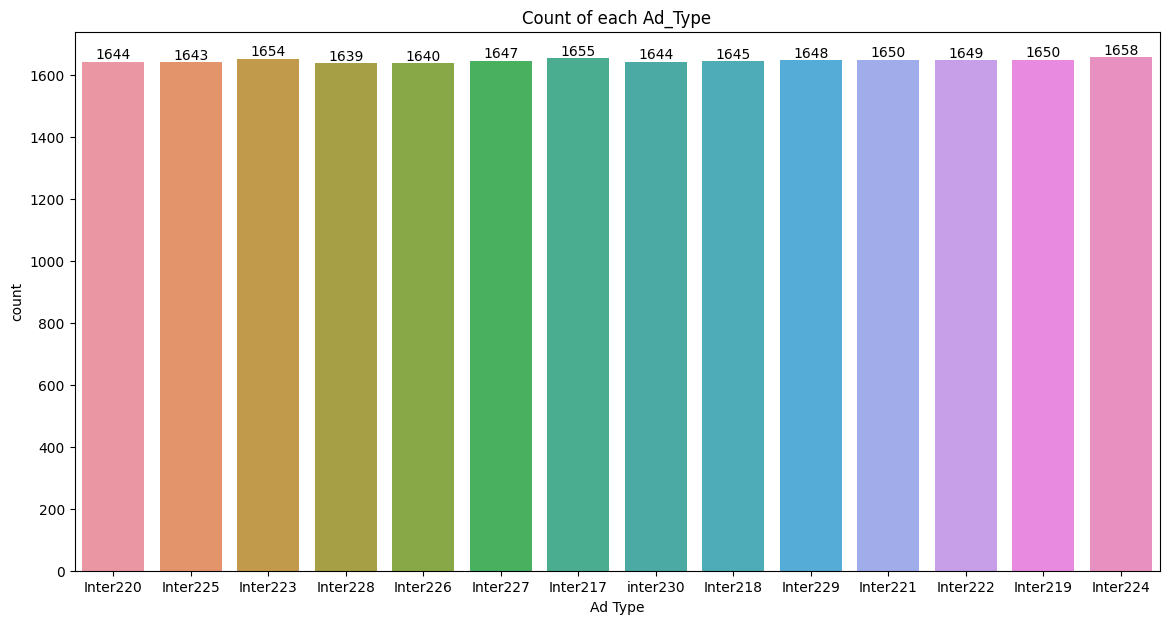

In [ ]:
# 1.Which ad_type is the highest watched? (Features: ad_type- categorical)
plt.figure(figsize=(14,7))
cc=sns.countplot(data=ad,x='Ad Type')
plt.bar_label(cc.containers[0])
plt.title('Count of each Ad_Type');

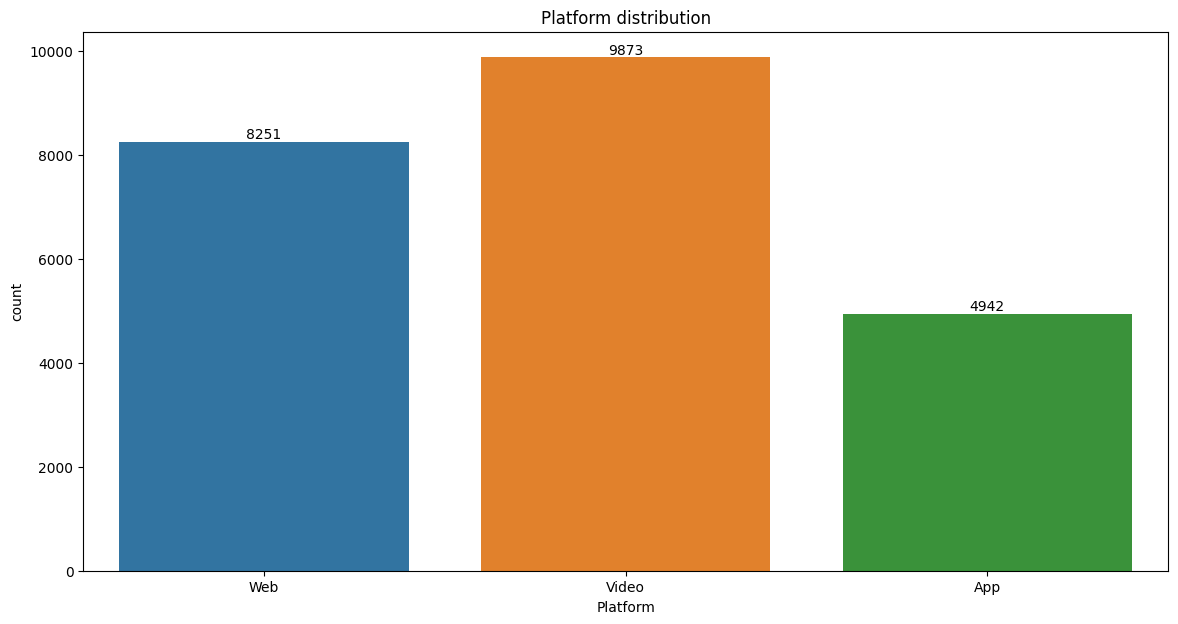

In [ ]:
# 2. Platform level distribution? (Features: Platform- categorical)
plt.figure(figsize=(14,7))
cc=sns.countplot(data=ad,x='Platform')
plt.bar_label(cc.containers[0])
plt.title('Platform distribution');

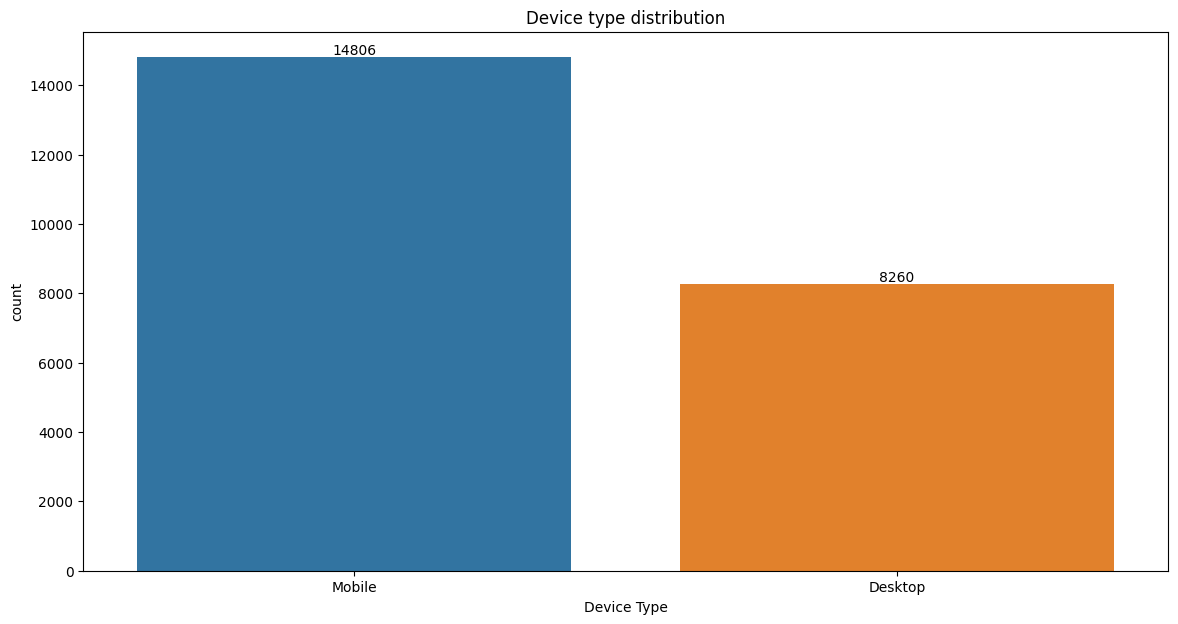

In [ ]:
# 3. On which device these ads are mostly watched? (Features: Device- categorical)
plt.figure(figsize=(14,7))
cc=sns.countplot(data=ad,x='Device Type')
plt.bar_label(cc.containers[0])
plt.title('Device type distribution');

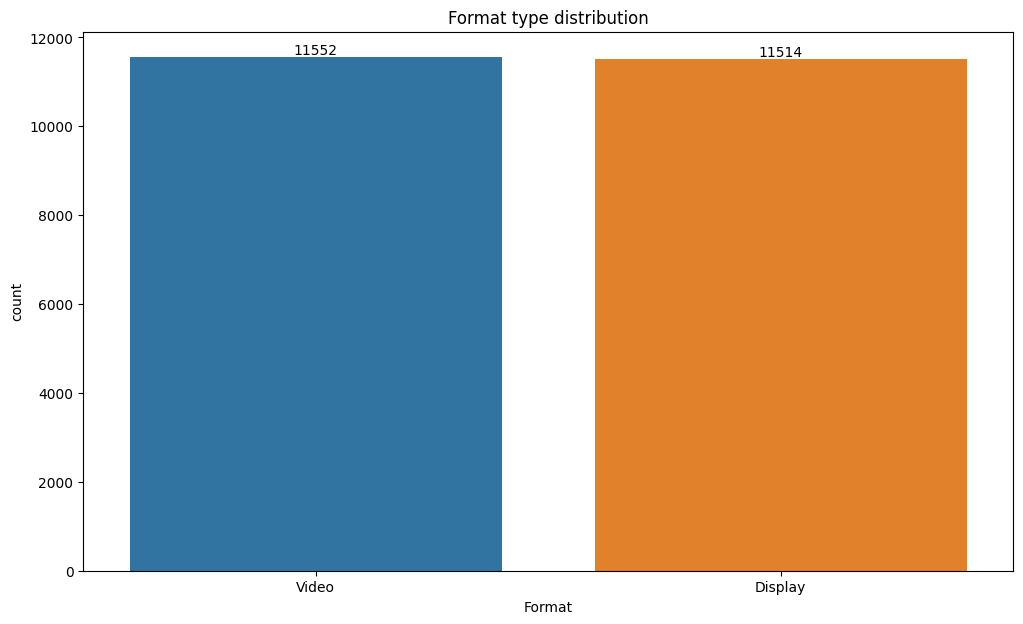

In [ ]:
# 4. Which Format of ads are mostly watched? (Features: Format- categorical)
plt.figure(figsize=(12,7))
cc=sns.countplot(data=ad,x='Format')
plt.bar_label(cc.containers[0])
plt.title('Format type distribution');

 Bivariate Analysis

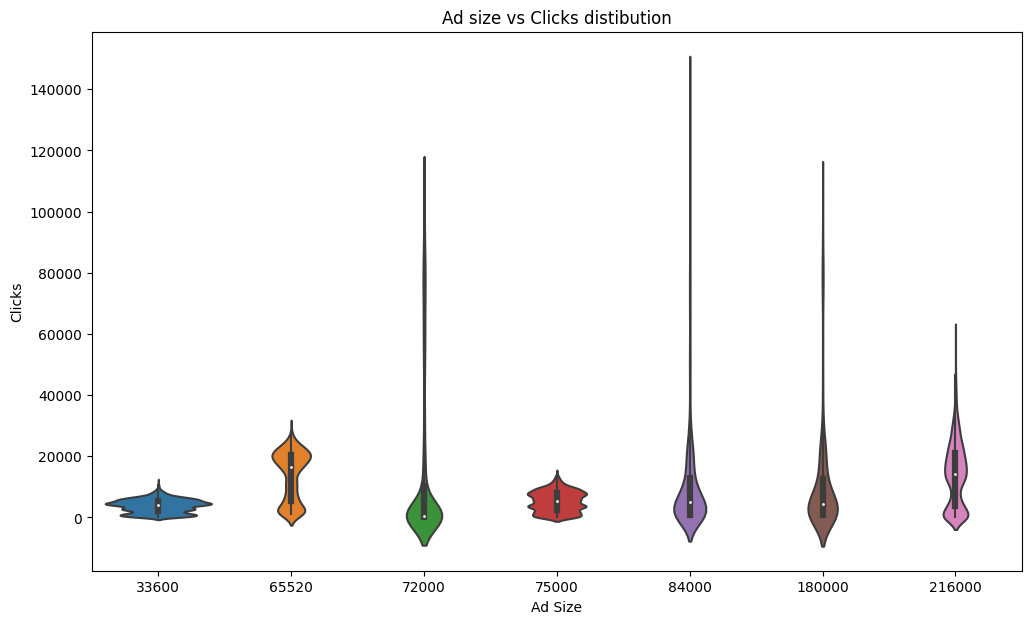

In [96]:
# 1.What is the Revenue generated from the fee collected from franchise entities? (Feature: Fee & Revenue)
plt.figure(figsize=(12,7))
sns.violinplot(data=ad, x='Ad Size', y='Clicks')
plt.title('Ad size vs Clicks distibution');

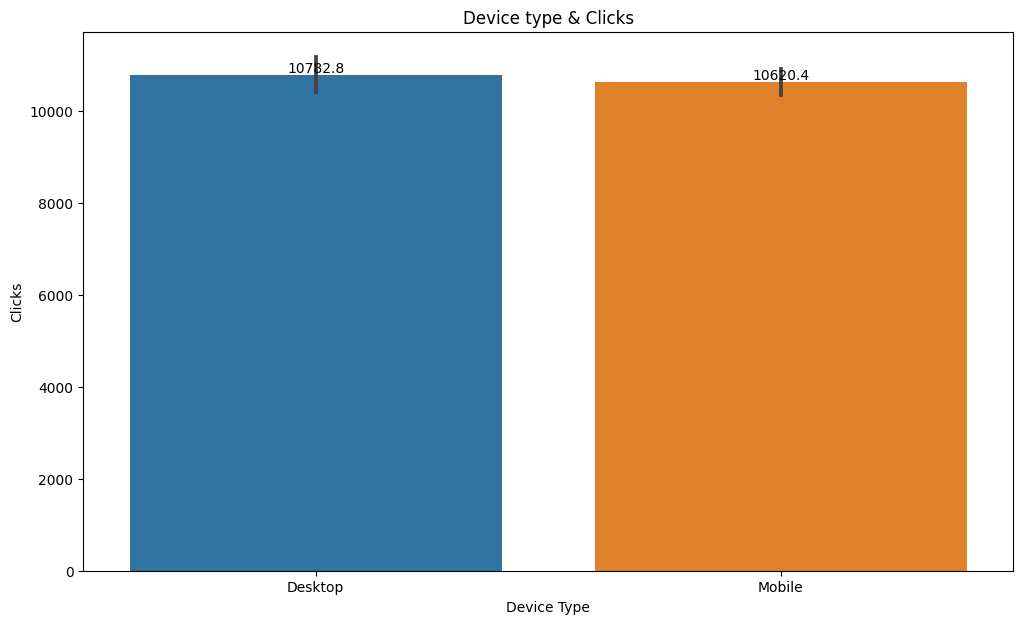

In [ ]:
# 2.Which device type has the highest clicks? (Feature: Device type & Clicks)
plt.figure(figsize=(12,7))
dc=sns.barplot(data=ad, x='Device Type', y='Clicks')
plt.bar_label(dc.containers[0])
plt.title('Device type & Clicks');

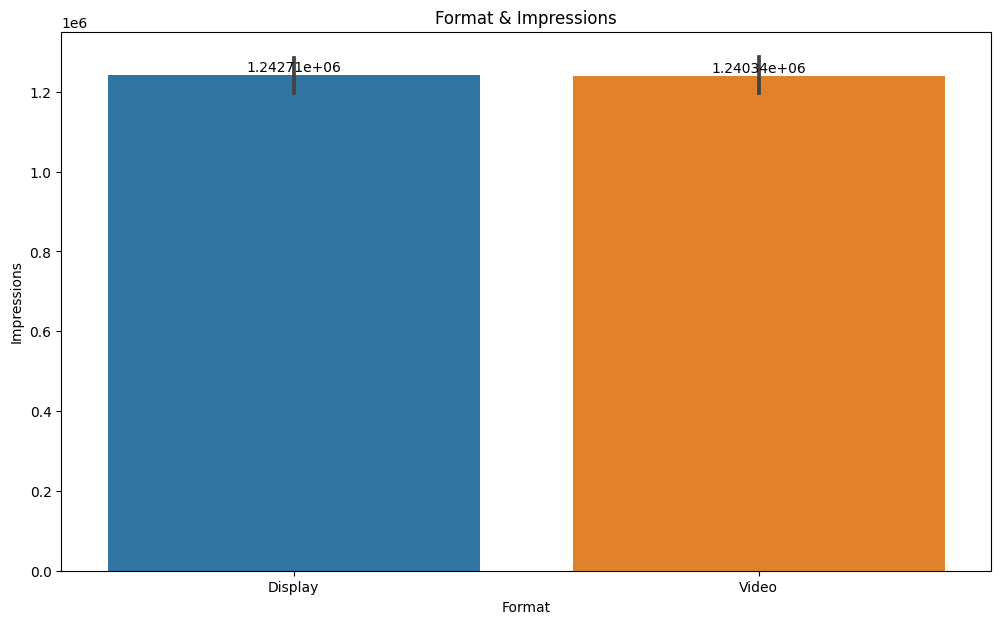

In [ ]:
# 3.Which Format has more Impressions? (Feature: Format & Impressions)
plt.figure(figsize=(12,7))
fi=sns.barplot(data=ad, x='Format', y='Impressions')
plt.bar_label(fi.containers[0])
plt.title('Format & Impressions');

Part 1: Clustering: Data Preprocessing
- Missing value and treatment - Outlier Treatment - z-score scaling Note: Treat missing values in CPC, CTR and CPM using the formula given. bold text

In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [ ]:
# Treating the missing values at CTR column

def calculate_CTR(x):
    TotalMeasuredClicks =ad.Clicks
    TotalMeasuredAdImpressions=ad.Impressions
    CTR = (TotalMeasuredClicks/(TotalMeasuredAdImpressions)*100)
    return CTR

In [ ]:
# Treating the missing values at CPM column

def calculate_CPM(y):
    TotalCampaignSpend =ad.Spend
    NumberofImpressions=ad.Impressions
    CPM = (TotalCampaignSpend/(NumberofImpressions)*1000)
    return CPM

In [ ]:
# Treating the missing values at CPC column

def calculate_CPC(z):
    TotalCost =ad.Spend
    NumberofClicks=ad.Clicks
    CPC = (TotalCost/NumberofClicks)
    return CPC

In [ ]:
ad['CTR']= ad[['CTR']].apply(lambda x: calculate_CTR(x))
ad['CPM']= ad[['CPM']].apply(lambda y: calculate_CPM(y))
ad['CPC']= ad[['CPC']].apply(lambda z: calculate_CPC(z))

In [ ]:
ad.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [ ]:
ad.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.000000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.000000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.000000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.000000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.000000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.000000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.210000   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.000000   
CTR                    23066.0  8.409941e+00  9.262048e+00      0.010874   
CPM                    23066.0  8.396849e+00  9.057760e+00      0.000000   
CPC                    23066.0  3.366776e-01  3.412527e-01      0.000000   

                                25%            50%           75%           max  
Ad - Length              120.000000     300.000000  7.200000e+02  7.280000e+02  
Ad- Width                250.000000     300.000000  6.000000e+02  6.000000e+02  
Ad Size                72000.000000   72000.000000  8.400000e+04  2.160000e+05  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  2.759286e+07  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  1.470202e+07  
Impressions             7990.500000  225290.000000  1.112428e+06  1.419477e+07  
Clicks                   710.000000    4425.000000  1.279375e+04  1.430490e+05  
Spend                     85.180000    1425.125000  3.121400e+03  2.693187e+04  
Fee                        0.330000       0.350000  3.500000e-01  3.500000e-01  
Revenue                   55.365375     926.335000  2.091338e+03  2.127618e+04  
CTR                        0.265107       9.391248  1.347057e+01  2.000000e+02  
CPM                        1.749084       8.371566  1.304202e+01  7.150000e+02  
CPC                        0.089736       0.139347  5.462421e-01  7.264000e+00

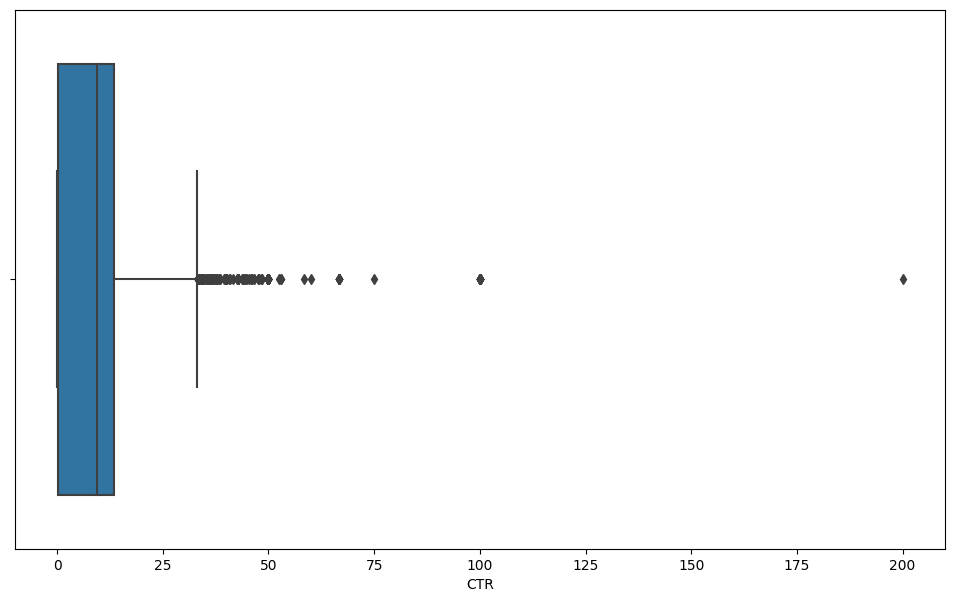

In [ ]:
# Cheking Outliers

plt.figure(figsize=(12,7))
sns.boxplot(data=ad, x='CTR');

In [ ]:
# Treating the outliers using IQR technique

# Calculate the first quartile (Q1)
Q1 = ad['CTR'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = ad['CTR'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ad[(ad['CTR'] < lower_bound) | (ad['CTR'] > upper_bound)]

# Display or inspect the outliers
print("Outliers:")
print(outliers)

Outliers:
          Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
2       2020-9-5-12       Format4          120        600    72000  Inter220   
3        2020-9-8-1       Format4          120        600    72000  Inter223   
8      2020-11-17-4       Format4          120        600    72000  Inter220   
11       2020-9-5-8       Format4          120        600    72000  Inter217   
17      2020-9-11-4       Format4          120        600    72000  Inter228   
...             ...           ...          ...        ...      ...       ...   
21272  2020-11-13-4       Format5          720        300   216000  Inter228   
21273   2020-9-13-7       Format5          720        300   216000  Inter220   
21274   2020-11-2-7       Format5          720        300   216000  Inter224   
21275  2020-9-14-22       Format5          720        300   216000  Inter218   
21276   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   

In [ ]:
# Replace outliers with the lower bound
ad['CTR'] = np.where(ad['CTR'] < lower_bound, lower_bound, ad['CTR'])

# Replace outliers with the upper bound
ad['CTR'] = np.where(ad['CTR'] > upper_bound, upper_bound, ad['CTR'])

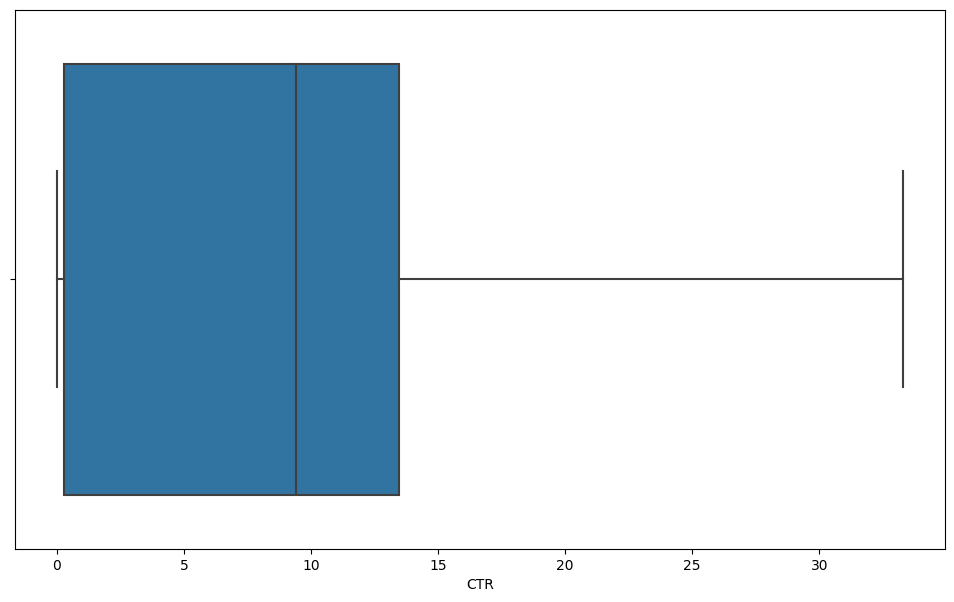

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=ad, x='CTR');

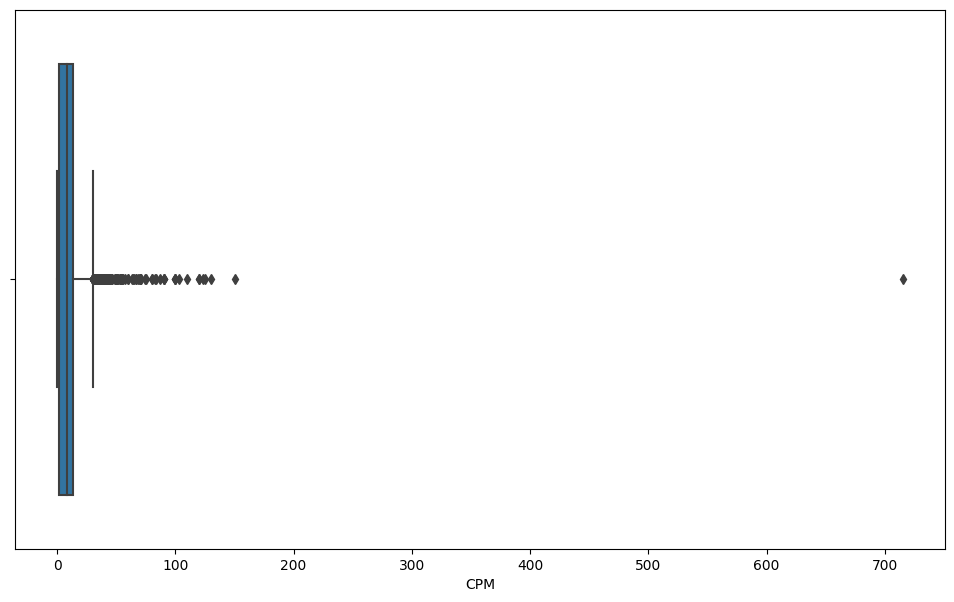

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=ad, x='CPM');

In [ ]:
# Treating the outliers using IQR technique

# Calculate the first quartile (Q1)
Q1 = ad['CPM'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = ad['CPM'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ad[(ad['CPM'] < lower_bound) | (ad['CPM'] > upper_bound)]

# Display or inspect the outliers
print("Outliers:")
print(outliers)

Outliers:
           Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
8       2020-11-17-4       Format4          120        600    72000  Inter220   
17       2020-9-11-4       Format4          120        600    72000  Inter228   
32      2020-11-24-0       Format4          120        600    72000  Inter223   
50      2020-11-16-1       Format4          120        600    72000  Inter222   
72     2020-11-15-21       Format4          120        600    72000  Inter225   
...              ...           ...          ...        ...      ...       ...   
21271    2020-11-4-3       Format5          720        300   216000  Inter223   
21272   2020-11-13-4       Format5          720        300   216000  Inter228   
21273    2020-9-13-7       Format5          720        300   216000  Inter220   
21275   2020-9-14-22       Format5          720        300   216000  Inter218   
21276    2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform De

In [ ]:
# Replace outliers with the lower bound
ad['CPM'] = np.where(ad['CPM'] < lower_bound, lower_bound, ad['CPM'])

# Replace outliers with the upper bound
ad['CPM'] = np.where(ad['CPM'] > upper_bound, upper_bound, ad['CPM'])

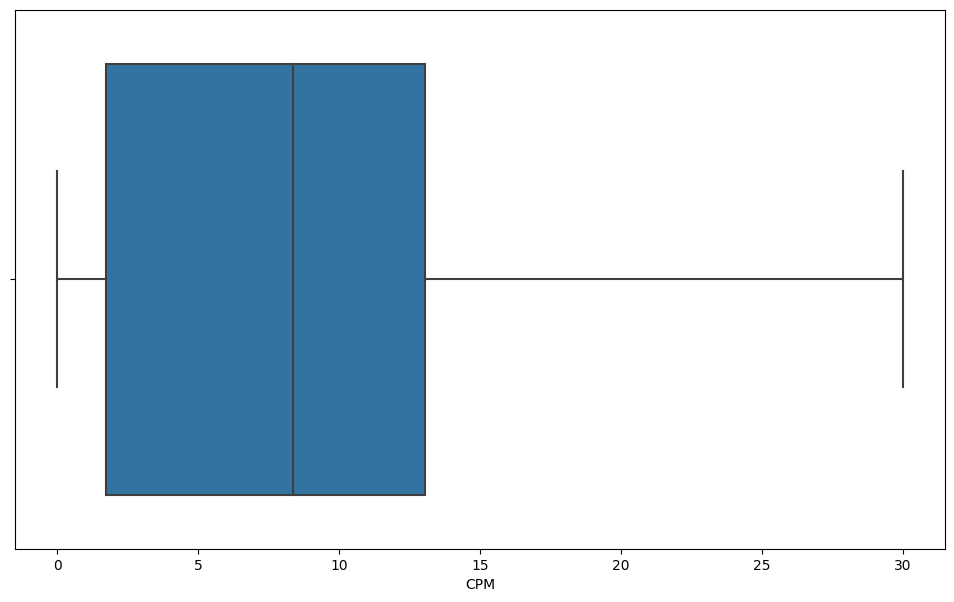

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=ad, x='CPM');

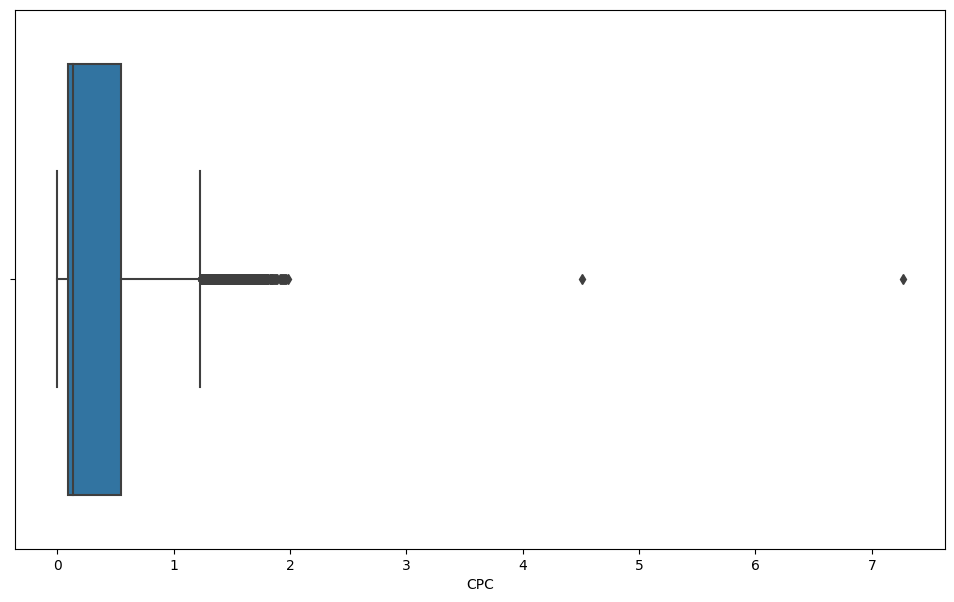

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=ad, x='CPC');

In [ ]:
# Treating the outliers using IQR technique

# Calculate the first quartile (Q1)
Q1 = ad['CPC'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = ad['CPC'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ad[(ad['CPC'] < lower_bound) | (ad['CPC'] > upper_bound)]

# Display or inspect the outliers
print("Outliers:")
print(outliers)

Outliers:
           Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
7160      2020-9-4-7       Format4          120        600    72000  Inter221   
7341    2020-9-14-15       Format1          300        250    75000  Inter222   
7342     2020-9-26-0       Format1          300        250    75000  Inter224   
7343    2020-10-9-20       Format1          300        250    75000  Inter224   
7344   2020-11-23-12       Format1          300        250    75000  Inter219   
...              ...           ...          ...        ...      ...       ...   
23058   2020-10-19-3       Format2          728         90    65520  inter230   
23061   2020-10-19-7       Format2          728         90    65520  Inter227   
23062   2020-10-19-4       Format2          728         90    65520  Inter227   
23064   2020-10-19-2       Format2          728         90    65520  Inter229   
23065   2020-10-19-5       Format2          728         90    65520  inter230   

      Platform De

In [ ]:
# Replace outliers with the lower bound
ad['CPC'] = np.where(ad['CPC'] < lower_bound, lower_bound, ad['CPC'])

# Replace outliers with the upper bound
ad['CPC'] = np.where(ad['CPC'] > upper_bound, upper_bound, ad['CPC'])

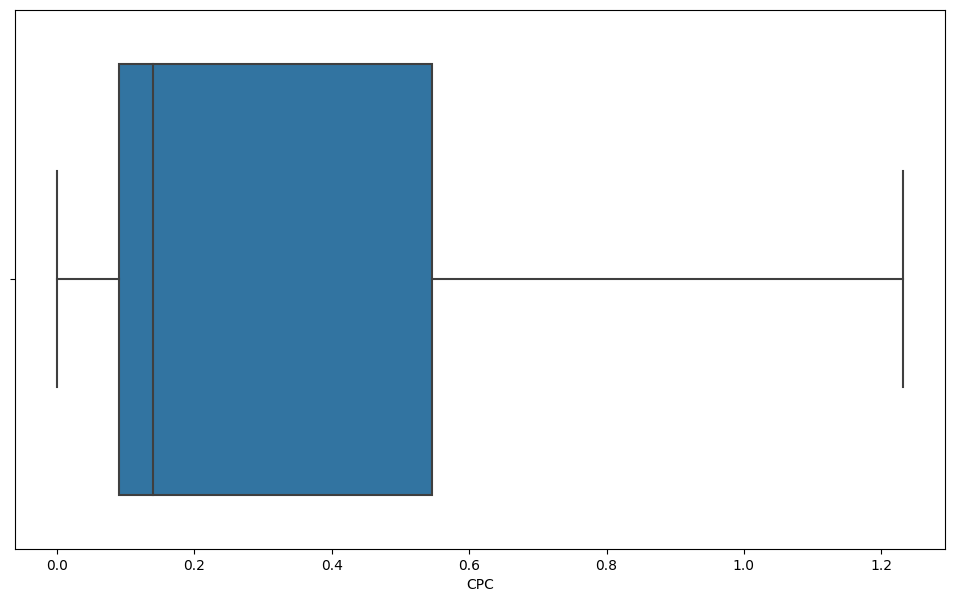

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=ad, x='CPC');

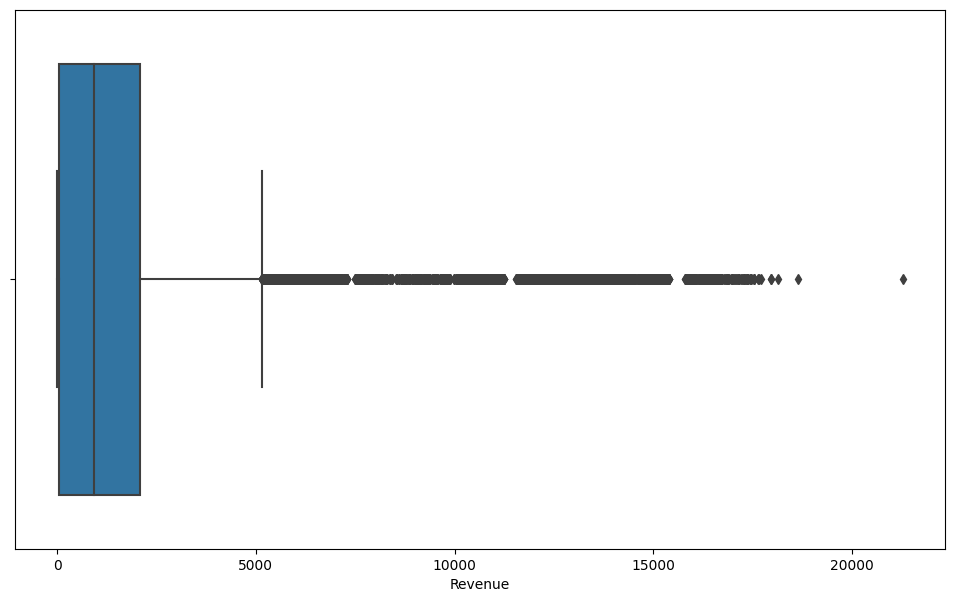

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=ad, x='Revenue');

In [ ]:
# Treating the outliers using IQR technique

# Calculate the first quartile (Q1)
Q1 = ad['Revenue'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = ad['Revenue'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ad[(ad['Revenue'] < lower_bound) | (ad['Revenue'] > upper_bound)]

# Display or inspect the outliers
print("Outliers:")
print(outliers)

Outliers:
           Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
4678    2020-9-20-19       Format4          120        600    72000  Inter224   
4679   2020-11-23-15       Format4          120        600    72000  Inter227   
4680     2020-9-2-21       Format4          120        600    72000  Inter218   
4681    2020-9-22-12       Format4          120        600    72000  Inter223   
4682   2020-11-22-17       Format4          120        600    72000  Inter228   
...              ...           ...          ...        ...      ...       ...   
23056  2020-10-18-22       Format2          728         90    65520  Inter229   
23059  2020-10-19-11       Format2          728         90    65520  Inter227   
23060  2020-10-19-10       Format2          728         90    65520  Inter227   
23061   2020-10-19-7       Format2          728         90    65520  Inter227   
23063   2020-10-19-8       Format2          728         90    65520  Inter228   

      Platform De

In [ ]:
# Replace outliers with the lower bound
ad['Revenue'] = np.where(ad['Revenue'] < lower_bound, lower_bound, ad['Revenue'])

# Replace outliers with the upper bound
ad['Revenue'] = np.where(ad['Revenue'] > upper_bound, upper_bound, ad['Revenue'])

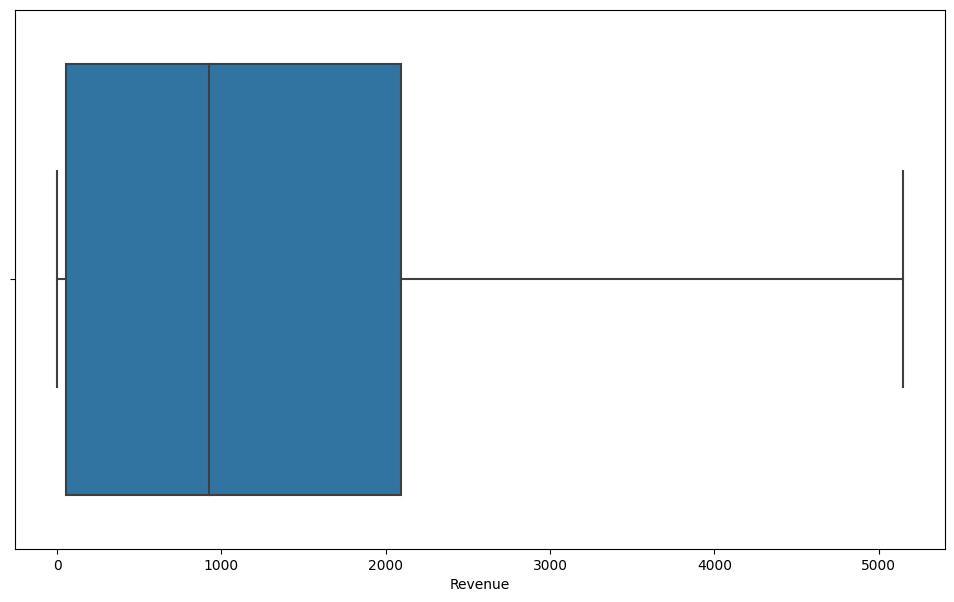

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=ad, x='Revenue');

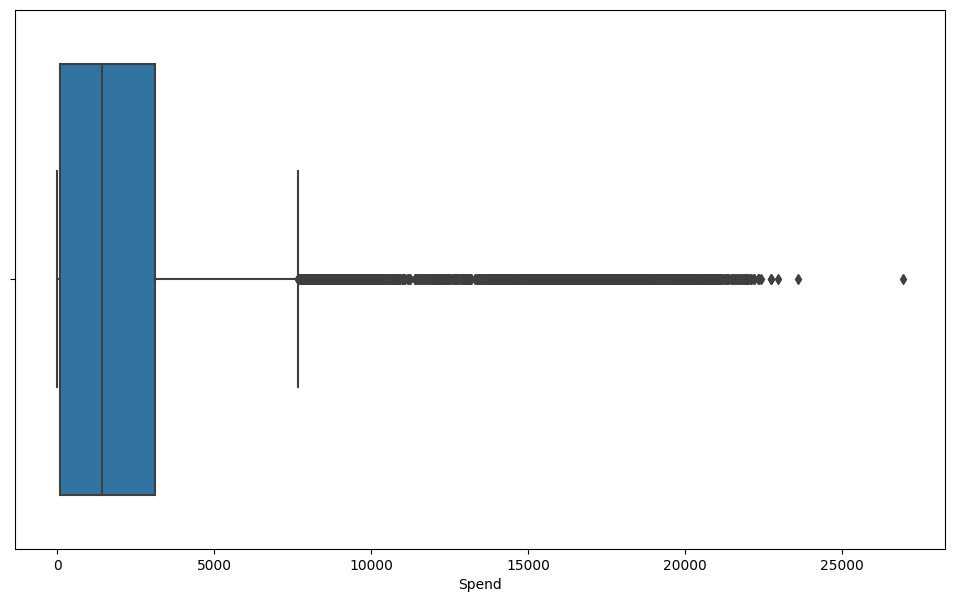

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=ad, x='Spend');

In [ ]:
# Treating the outliers using IQR technique

# Calculate the first quartile (Q1)
Q1 = ad['Spend'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = ad['Spend'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ad[(ad['Spend'] < lower_bound) | (ad['Spend'] > upper_bound)]

# Display or inspect the outliers
print("Outliers:")
print(outliers)

Outliers:
           Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
4840    2020-9-27-21       Format4          120        600    72000  Inter221   
4841   2020-10-26-16       Format4          120        600    72000  Inter218   
4842    2020-9-19-15       Format4          120        600    72000  Inter221   
4843   2020-10-31-19       Format4          120        600    72000  Inter223   
4844   2020-10-31-15       Format4          120        600    72000  Inter220   
...              ...           ...          ...        ...      ...       ...   
23055  2020-10-19-15       Format2          728         90    65520  Inter228   
23056  2020-10-18-22       Format2          728         90    65520  Inter229   
23059  2020-10-19-11       Format2          728         90    65520  Inter227   
23060  2020-10-19-10       Format2          728         90    65520  Inter227   
23063   2020-10-19-8       Format2          728         90    65520  Inter228   

      Platform De

In [ ]:
# Replace outliers with the lower bound
ad['Spend'] = np.where(ad['Spend'] < lower_bound, lower_bound, ad['Spend'])

# Replace outliers with the upper bound
ad['Spend'] = np.where(ad['Spend'] > upper_bound, upper_bound, ad['Spend'])

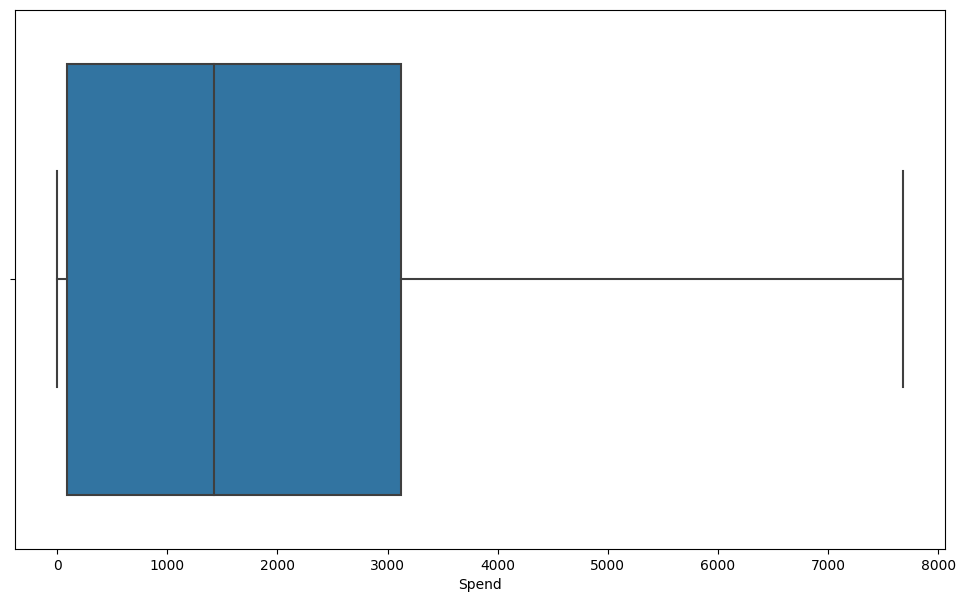

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=ad, x='Spend');

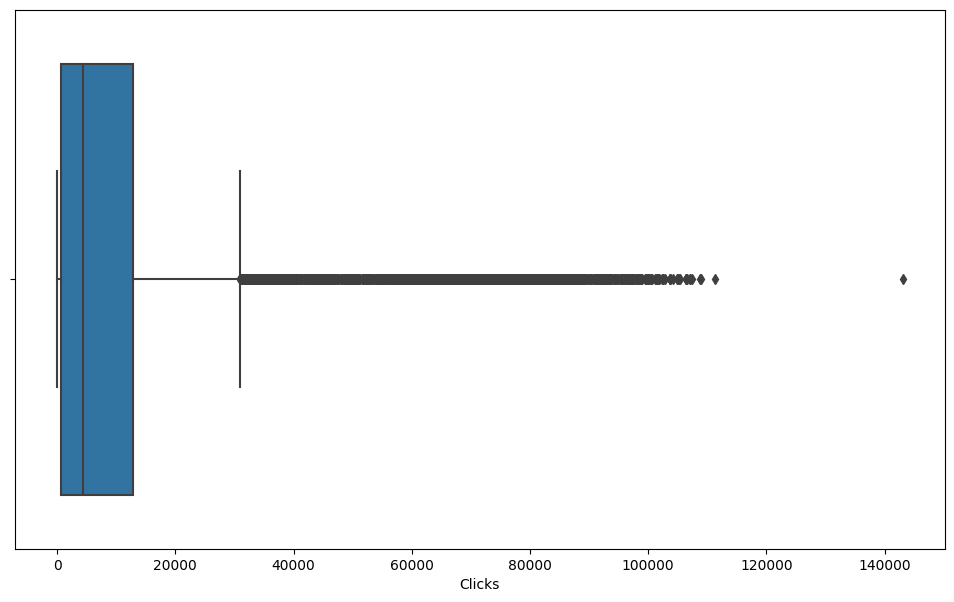

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=ad, x='Clicks');

In [ ]:
# Treating the outliers using IQR technique

# Calculate the first quartile (Q1)
Q1 = ad['Clicks'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = ad['Clicks'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ad[(ad['Clicks'] < lower_bound) | (ad['Clicks'] > upper_bound)]

# Display or inspect the outliers
print("Outliers:")
print(outliers)

Outliers:
           Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
4079     2020-9-8-23       Format4          120        600    72000  Inter222   
4102     2020-9-1-23       Format4          120        600    72000  Inter218   
4133     2020-9-7-23       Format4          120        600    72000  Inter223   
4147     2020-9-2-23       Format4          120        600    72000  Inter221   
4148    2020-9-10-23       Format4          120        600    72000  Inter225   
...              ...           ...          ...        ...      ...       ...   
20756   2020-9-28-19       Format5          720        300   216000  Inter223   
20771   2020-9-28-20       Format5          720        300   216000  Inter224   
20798  2020-10-14-19       Format5          720        300   216000  Inter224   
20825  2020-10-14-20       Format5          720        300   216000  Inter223   
20829  2020-10-14-18       Format5          720        300   216000  Inter227   

      Platform De

In [ ]:
# Replace outliers with the lower bound
ad['Clicks'] = np.where(ad['Clicks'] < lower_bound, lower_bound, ad['Clicks'])

# Replace outliers with the upper bound
ad['Clicks'] = np.where(ad['Clicks'] > upper_bound, upper_bound, ad['Clicks'])

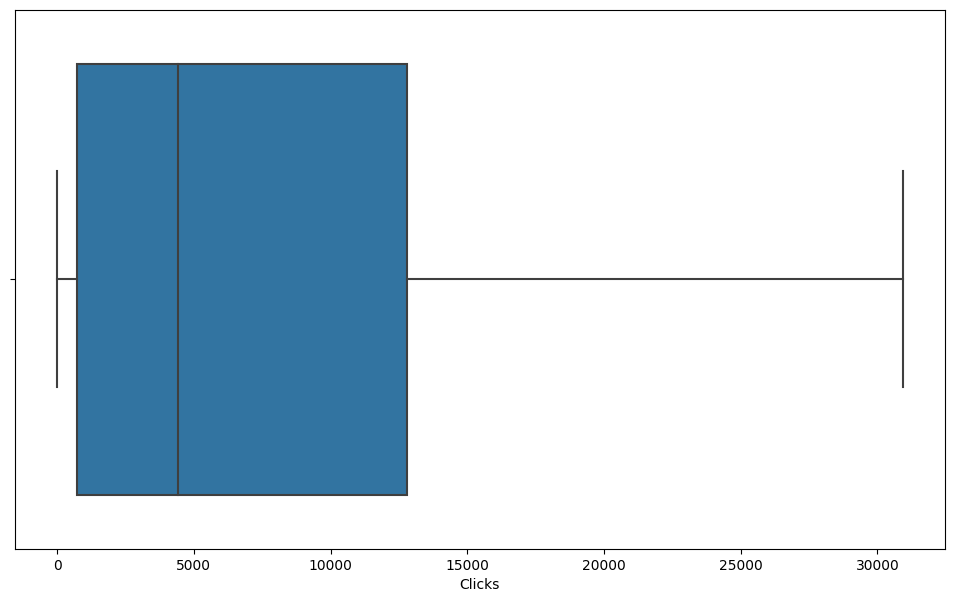

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=ad, x='Clicks');

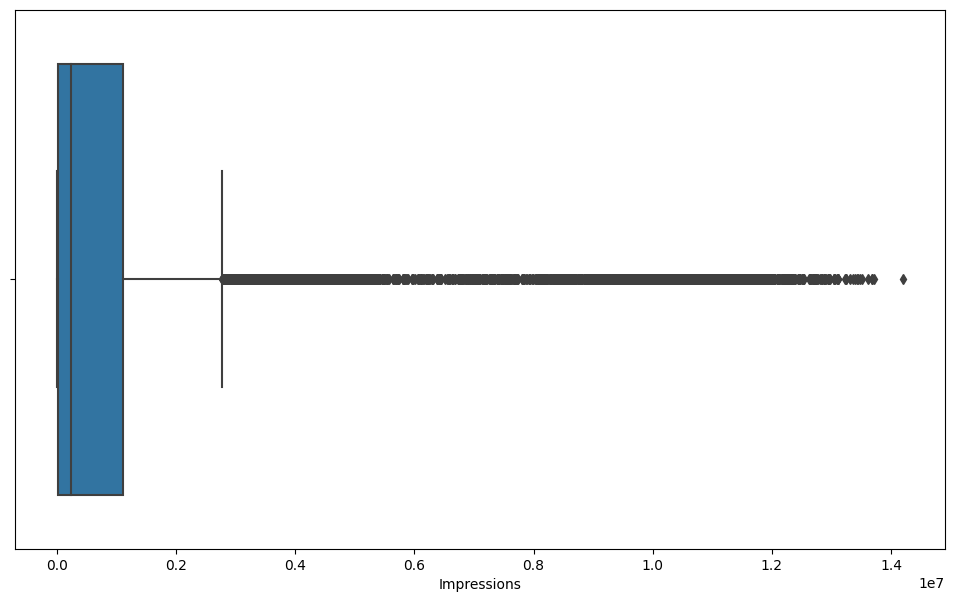

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=ad, x='Impressions');

In [ ]:
# Treating the outliers using IQR technique

# Calculate the first quartile (Q1)
Q1 = ad['Impressions'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = ad['Impressions'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ad[(ad['Impressions'] < lower_bound) | (ad['Impressions'] > upper_bound)]

# Display or inspect the outliers
print("Outliers:")
print(outliers)

Outliers:
           Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
9039    2020-10-4-23       Format1          300        250    75000  Inter225   
9056     2020-9-1-23       Format1          300        250    75000  Inter225   
9079    2020-9-20-23       Format1          300        250    75000  Inter224   
9094    2020-9-14-23       Format1          300        250    75000  Inter228   
9097    2020-9-13-23       Format1          300        250    75000  Inter223   
...              ...           ...          ...        ...      ...       ...   
23056  2020-10-18-22       Format2          728         90    65520  Inter229   
23059  2020-10-19-11       Format2          728         90    65520  Inter227   
23060  2020-10-19-10       Format2          728         90    65520  Inter227   
23061   2020-10-19-7       Format2          728         90    65520  Inter227   
23063   2020-10-19-8       Format2          728         90    65520  Inter228   

      Platform De

In [ ]:
# Replace outliers with the lower bound
ad['Impressions'] = np.where(ad['Impressions'] < lower_bound, lower_bound, ad['Impressions'])

# Replace outliers with the upper bound
ad['Impressions'] = np.where(ad['Impressions'] > upper_bound, upper_bound, ad['Impressions'])

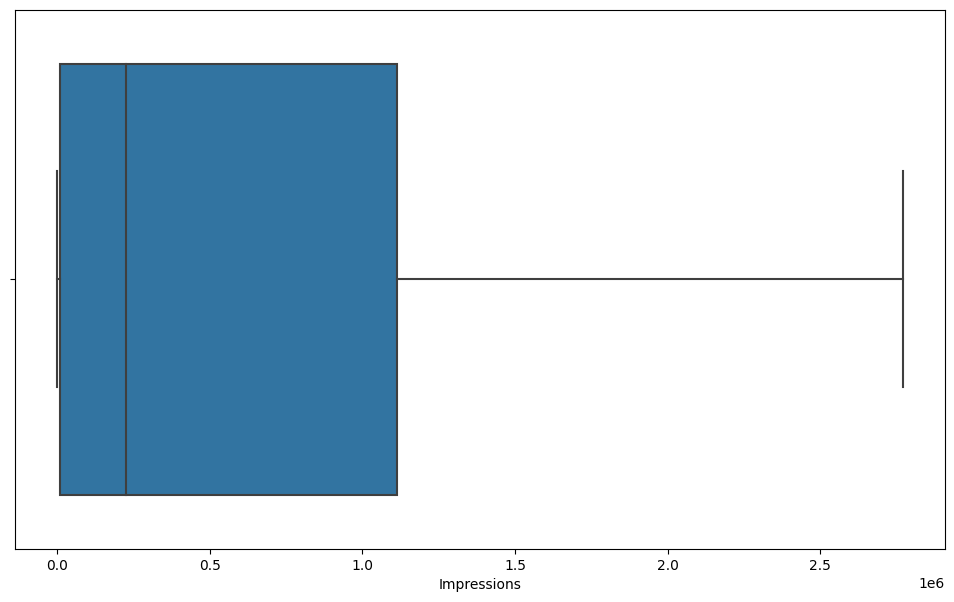

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=ad, x='Impressions');

**Scaling Data**

In [ ]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [ ]:
# Identify numeric columns for scaling
numeric_columns = ad.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Apply Z-score scaling to numeric columns
scaler = StandardScaler()
ad[numeric_columns] = scaler.fit_transform(ad[numeric_columns])

In [ ]:
ad.describe().T

count          mean       std       min       25%  \
Ad - Length            23066.0  1.577204e-16  1.000022 -1.134891 -1.134891   
Ad- Width              23066.0 -9.857525e-17  1.000022 -1.319110 -0.432797   
Ad Size                23066.0 -3.943010e-17  1.000022 -1.024985 -0.400970   
Available_Impressions  23066.0 -1.971505e-17  1.000022 -0.512788 -0.505688   
Matched_Queries        23066.0 -1.971505e-17  1.000022 -0.515377 -0.508102   
Impressions            23066.0  7.886020e-17  1.000022 -0.768806 -0.760655   
Clicks                 23066.0 -7.886020e-17  1.000022 -0.867488 -0.793438   
Spend                  23066.0 -5.914515e-17  1.000022 -0.893170 -0.858046   
Fee                    23066.0  6.505967e-16  1.000022 -3.914682 -0.160285   
Revenue                23066.0  2.957258e-17  1.000022 -0.880093 -0.846474   
CTR                    23066.0  1.281478e-16  1.000022 -0.995031 -0.964227   
CPM                    23066.0  0.000000e+00  1.000022 -1.194498 -0.940303   
CPC                    23066.0 -1.478629e-16  1.000022 -1.042561 -0.759091   

                            50%       75%       max  
Ad - Length           -0.364496  1.433093  1.467332  
Ad- Width             -0.186599  1.290590  1.290590  
Ad Size               -0.400970 -0.205965  1.939086  
Available_Impressions -0.410787  0.020171  5.305072  
Matched_Queries       -0.412673 -0.045524  5.335208  
Impressions           -0.538975  0.366051  2.056111  
Clicks                -0.405431  0.468629  2.361729  
Spend                 -0.305523  0.393932  2.271900  
Fee                    0.465447  0.465447  0.465447  
Revenue               -0.317607  0.389803  2.244218  
CTR                    0.141524  0.635787  3.035808  
CPM                    0.022146  0.700905  3.162718  
CPC                   -0.602371  0.682987  2.846105

In [ ]:
#Creating copy of the data to store labels from each algorithm
numeric_ad_copy = numeric_ad.copy(deep=True)

**Part 1: Clustering: Hierarchical Clustering
Construct a dendrogram using Ward linkage and Euclidean distance - Identify the optimum number of Clusters**

In [ ]:
# Importing the Dendogram linkage Module

from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
ad.head(5)

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-17-4       Format4    -1.134891    1.29059 -0.40097  Inter220   
1  2020-9-6-10       Format4    -1.134891    1.29059 -0.40097  Inter225   
2  2020-9-5-12       Format4    -1.134891    1.29059 -0.40097  Inter220   
3   2020-9-8-1       Format4    -1.134891    1.29059 -0.40097  Inter223   
4  2020-10-7-4       Format4    -1.134891    1.29059 -0.40097  Inter228   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0      Web      Mobile    Video              -0.512754        -0.515368   
1    Video      Mobile    Video              -0.512739        -0.515358   
2      Web      Mobile    Video              -0.512764        -0.515372   
3      Web      Mobile  Display              -0.512781        -0.515375   
4    Video      Mobile  Display              -0.512750        -0.515362   

   Impressions    Clicks     Spend       Fee   Revenue       CTR       CPM  \
0    -0.768783 -0.867384 -0.893133  0.465447 -0.880057  0.013344 -0.649508   
1    -0.768763 -0.867175 -0.893121  0.465447 -0.880045  0.130750 -0.788924   
2    -0.768795 -0.867175 -0.893117  0.465447 -0.880045  3.035808  0.379916   
3    -0.768802 -0.867384 -0.893117  0.465447 -0.880045  3.035808  2.584096   
4    -0.768769 -0.867488 -0.893121  0.465447 -0.880045 -0.668880 -0.723156   

        CPC  
0 -0.900409  
1 -0.947793  
2 -0.939896  
3 -0.837230  
4 -0.663488

In [ ]:
# Select only numeric columns into a new DataFrame
numeric_ad = ad.select_dtypes(include=['number'])

In [ ]:
wardlink = linkage(numeric_ad, method = 'ward', metric='euclidean')

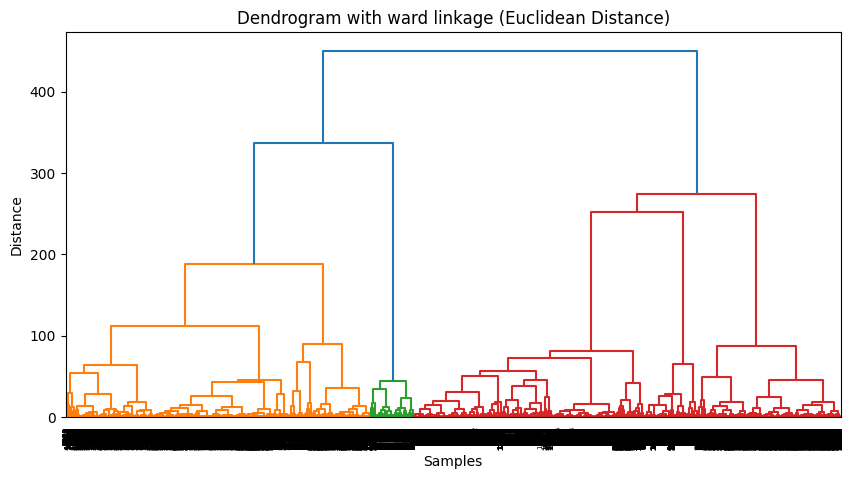

In [ ]:
# Plot the dendrogram
plt.figure(figsize=(10,5))
dendrogram(wardlink, orientation= 'top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram with ward linkage (Euclidean Distance)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


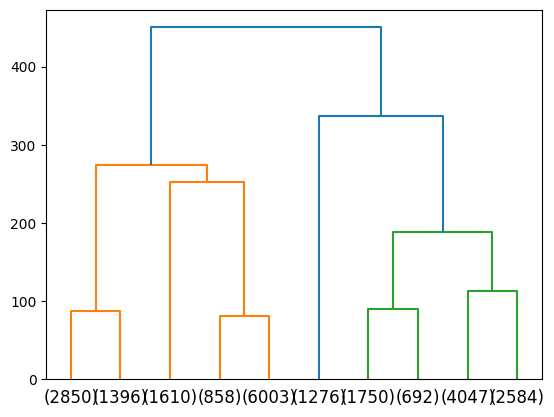

In [ ]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

**Observations:**
- From the above Dendrogram the optimal clusters are 5.

**Part 1: Clustering: K-means Clustering**
- Apply K-means Clustering - Plot the Elbow curve - Check Silhouette Scores - Figure out the appropriate number of clusters - Cluster Profiling

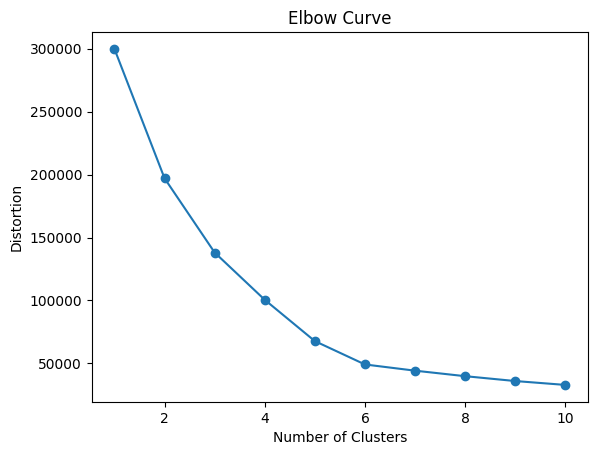

In [ ]:
# Elbow curve to find the optimal number of clusters
def plot_elbow_curve(numeric_ad):
    distortions = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(numeric_ad)
        distortions.append(kmeans.inertia_)

    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Curve')
    plt.show()

plot_elbow_curve(numeric_ad)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score


In [ ]:
# Create a list to store Silhouette scores for different cluster numbers
silhouette_scores=[]

In [ ]:
# Specify the range of cluster numbers to evaluate
for n_clusters in range(2,11):
  kmeans= KMeans(n_clusters=n_clusters, random_state=42)
  labels= kmeans.fit_predict(numeric_ad)
  silhouette_avg= silhouette_score(numeric_ad, labels)
  silhouette_scores.append(silhouette_avg)
  print(f"For n_clusters= {n_clusters}, the silhouette score is {silhouette_avg}")


For n_clusters= 2, the silhouette score is 0.36622963245869133
For n_clusters= 3, the silhouette score is 0.38923030387822816
For n_clusters= 4, the silhouette score is 0.4664285783838609
For n_clusters= 5, the silhouette score is 0.5299779798076261
For n_clusters= 6, the silhouette score is 0.535766347843358
For n_clusters= 7, the silhouette score is 0.5168460208546695
For n_clusters= 8, the silhouette score is 0.4859065659062846
For n_clusters= 9, the silhouette score is 0.42473960912417524
For n_clusters= 10, the silhouette score is 0.4273252049519214


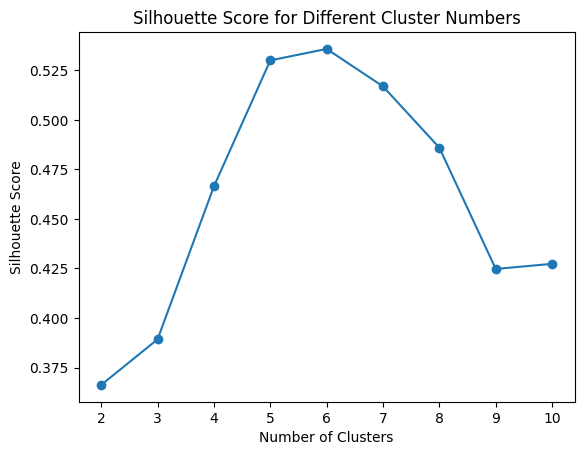

In [ ]:
# Plot the silhouette scores for different cluster numbers

plt.plot(range(2,11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Numbers')
plt.show()

In [ ]:
# Choose the number of clusters with the highest silhouette score
optimal_clusters= silhouette_scores.index(max(silhouette_scores))+2
print(f"The optimal number of clusters is: {optimal_clusters}")

The optimal number of clusters is: 6


In [ ]:
# Perform k-means clustering with the optimal number of clusters
kmeans_optimal= KMeans(n_clusters=optimal_clusters, random_state=42)
labels_optimal=kmeans_optimal.fit_predict(numeric_ad)

In [ ]:
# Add cluster labels to the original DataFrame
ad_with_labels=pd.concat([ad, pd.Series(labels_optimal, name='Cluster')], axis=1)

In [ ]:
ad

Timestamp InventoryType  Ad - Length  Ad- Width   Ad Size   Ad Type  \
0       2020-9-17-4       Format4    -1.134891   1.290590 -0.400970  Inter220   
1       2020-9-6-10       Format4    -1.134891   1.290590 -0.400970  Inter225   
2       2020-9-5-12       Format4    -1.134891   1.290590 -0.400970  Inter220   
3        2020-9-8-1       Format4    -1.134891   1.290590 -0.400970  Inter223   
4       2020-10-7-4       Format4    -1.134891   1.290590 -0.400970  Inter228   
...             ...           ...          ...        ...       ...       ...   
23061  2020-10-19-7       Format2     1.467332  -1.220631 -0.506272  Inter227   
23062  2020-10-19-4       Format2     1.467332  -1.220631 -0.506272  Inter227   
23063  2020-10-19-8       Format2     1.467332  -1.220631 -0.506272  Inter228   
23064  2020-10-19-2       Format2     1.467332  -1.220631 -0.506272  Inter229   
23065  2020-10-19-5       Format2     1.467332  -1.220631 -0.506272  inter230   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0          Web      Mobile    Video              -0.512754        -0.515368   
1        Video      Mobile    Video              -0.512739        -0.515358   
2          Web      Mobile    Video              -0.512764        -0.515372   
3          Web      Mobile  Display              -0.512781        -0.515375   
4        Video      Mobile  Display              -0.512750        -0.515362   
...        ...         ...      ...                    ...              ...   
23061      App      Mobile  Display               0.664148         0.817303   
23062      App      Mobile    Video              -0.027727        -0.007183   
23063    Video      Mobile  Display               1.334169         1.539994   
23064    Video     Desktop    Video               0.370872         0.493894   
23065    Video      Mobile  Display              -0.056949        -0.041551   

       Impressions    Clicks     Spend       Fee   Revenue       CTR  \
0        -0.768783 -0.867384 -0.893133  0.465447 -0.880057  0.013344   
1        -0.768763 -0.867175 -0.893121  0.465447 -0.880045  0.130750   
2        -0.768795 -0.867175 -0.893117  0.465447 -0.880045  3.035808   
3        -0.768802 -0.867384 -0.893117  0.465447 -0.880045  3.035808   
4        -0.768769 -0.867488 -0.893121  0.465447 -0.880045 -0.668880   
...            ...       ...       ...       ...       ...       ...   
23061     2.056111 -0.296810  2.222872 -2.037484  2.244218 -0.975704   
23062     0.454093 -0.737561 -0.037429  0.465447 -0.060995 -0.983764   
23063     2.056111  0.159816  2.271900 -2.663216  2.244218 -0.972397   
23064     1.689293 -0.571496  0.716178 -0.160285  0.707740 -0.982092   
23065     0.371792 -0.738501  0.007678  0.465447 -0.017820 -0.982954   

            CPM       CPC  KMeans_Labels  
0     -0.649508 -0.900409              0  
1     -0.788924 -0.947793              0  
2      0.379916 -0.939896              0  
3      2.584096 -0.837230              0  
4     -0.723156 -0.663488              0  
...         ...       ...            ...  
23061 -0.852099  2.846105              1  
23062 -0.942896  2.846105              2  
23063 -0.873980  2.481851              1  
23064 -0.959094  2.846105              2  
23065 -0.910522  2.846105              2  

[23066 rows x 20 columns]

In [ ]:
# Display the cluster profile, e.g, mean values for each cluster
cluster_profile= ad_with_labels.groupby('Cluster').mean()
print("\nCluster Profile:")
print(cluster_profile)


Cluster Profile:
         Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
Cluster                                                            
0           1.355297  -0.166456  1.869614              -0.459719   
1          -1.012293   1.111194 -0.320579              -0.505001   
2           0.176729  -0.937562 -0.693400              -0.146576   
3           1.280414  -1.090220 -0.433239               3.461744   
4          -0.162660  -0.451029 -0.292758               0.687999   
5          -1.038292   1.147719 -0.339336              -0.343182   

         Matched_Queries  Impressions    Clicks     Spend       Fee   Revenue  \
Cluster                                                                         
0              -0.460718    -0.649901  0.610417 -0.379203  0.451664 -0.387230   
1              -0.506383    -0.752413 -0.629211 -0.792522  0.464702 -0.783710   
2              -0.189442     0.027901 -0.532452 -0.307479  0.462642 -0.319313   
3               3.476160     2.0

**Part 1: Clustering: Actionable Insights & Recommendations**
- Extract meaningful insights (atleast 3) from the clusters to identify the most effective types of ads, target audiences, or marketing strategies that can be inferred from each segment. - Based on the clustering analysis and key insights, provide actionable recommendations (atleast 3) to Ads24x7 on how to optimize their digital marketing efforts, allocate budgets efficiently, and tailor ad content to specific audience segments.

1. Identifying Effective Types of Ads:
Insight: Cluster 3 exhibits a high response to visually appealing and creative ads, as suggested by the higher values in the Clicks feature.
Recommendation: Allocate a portion of the ad budget to visually engaging content, such as image or video-based ads, for Cluster 3.

2. Targeting Specific Audiences:
Insight: Cluster 2 is characterized by a preference for ads that emphasize product features and specifications (indicated by higher values in the X2 feature).
Recommendation: Tailor advertising content for Cluster 2 to highlight product details and benefits, targeting audiences interested in product specifications.

3. Optimizing Digital Marketing Efforts:
Insight: Cluster 5 and Cluster 3 has a diverse response pattern, indicating varied preferences within the cluster.
Recommendation: Conduct further analysis within Cluster 5 and Cluster 3 to identify sub-patterns and create targeted campaigns for specific subgroups within the cluster.

4. Efficient Budget Allocation:
Insight: Cluster 3 shows a strong positive response to a combination of visual appeal (Impressions) and feature emphasis (Ad Size).
Recommendation: Allocate a higher budget to campaigns that combine visually appealing elements with a focus on product features, targeting Cluster 3 & Cluster 5 for maximum impact.

5. Tailoring Ad Content:
Insight: All clusters exhibit varying preferences, emphasizing the need for personalized content.
Recommendation: Implement dynamic content optimization strategies to tailor ads based on the characteristics of each cluster, ensuring relevance to diverse audience segments.

6. Improving Engagement with Specific Content:
Insight: Analysis of the cluster centroids reveals specific content themes that resonate with each cluster.
Recommendation: Create content themes aligned with the preferences of each cluster, enhancing engagement and encouraging click-through.

**Part 2: PCA: Define the problem and perform Exploratory Data Analysis**
Problem Definition - Check shape, Data types, statistical summary - Perform an EDA on the data to extract useful insights Note: 1. Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F 2. Example questions to answer from EDA - (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio?

In [5]:
census = pd.read_excel("PCA+India+Data_Census.xlsx")

In [ ]:
census

State Code  Dist.Code                     State                Area Name  \
0             1          1           Jammu & Kashmir                  Kupwara   
1             1          2           Jammu & Kashmir                   Badgam   
2             1          3           Jammu & Kashmir              Leh(Ladakh)   
3             1          4           Jammu & Kashmir                   Kargil   
4             1          5           Jammu & Kashmir                    Punch   
..          ...        ...                       ...                      ...   
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0     7707  23388  29796  5862  6196     3  ...           1150            749   
1     6218  19585  23102  4482  3733     7  ...            525            715   
2     4452   6546  10964  1082  1018     3  ...            114            188   
3     1320   2784   4206   563   677     0  ...            194            247   
4    11654  20591  29981  5157  4587    20  ...            874           1928   
..     ...    ...    ...   ...   ...   ...  ...            ...            ...   
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0              180            237            680            252   
1              123            229            186            148   
2               44             89              3             34   
3               61            128             13             50   
4              465           1043            205            302   
..             ...            ...            ...            ...   
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0               32             46         258         214  
1               76            178         140         160  
2                0              4          67          61  
3                4             10         116          59  
4               24            105         180         478  
..             ...            ...         ...         ...  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[640 rows x 61 columns]

In [ ]:
census.shape

(640, 61)

In [ ]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [6]:
census.describe().T

count           mean            std    min       25%      50%  \
State Code      640.0      17.114062       9.426486    1.0      9.00     18.0   
Dist.Code       640.0     320.500000     184.896367    1.0    160.75    320.5   
No_HH           640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M           640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F           640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06            640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06            640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   
M_SC            640.0   13820.946875   14426.373130    0.0   3466.25   9591.5   
F_SC            640.0   20778.392188   21727.887713    0.0   5603.25  13709.0   
M_ST            640.0    6191.807813    9912.668948    0.0    293.75   2333.5   
F_ST            640.0   10155.640625   15875.701488    0.0    429.50   3834.5   
M_LIT           640.0   57967.979688   55910.282466  286.0  21298.00  42693.5   
F_LIT           640.0   66359.565625   75037.860207  371.0  20932.00  43796.5   
M_ILL           640.0   21972.596875   19825.605268  105.0   8590.00  15767.5   
F_ILL           640.0   56012.518750   47116.693769  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.407813   36419.537491  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.760938   37192.360943  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.446875   31480.915680   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.846875   29998.262689  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.342188    4739.161969    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.042188    5326.362728    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.109375    6399.507966    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8925.995312   12864.287584    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.893750    1278.642345    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.773438    3179.414449    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.101562   26068.480886   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.035938   18972.202369  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.960938    7410.791691   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.914062   10996.474528  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.737500    1311.546847    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.682813    3564.626095    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.326562    3781.555707    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.281250    6773.876298    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.742188     462.661891    0.0     71.75    166.0   
MARG_HH_F       640.0     786.626562    1198.718213    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.154687    3609.391821    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.323438    4115.191314   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.168750   39045.316918  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.323438   82970.406216  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.987500    6019.806644   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.864063    8467.473429   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.848438     905.639279    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.584375    2496.541514    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.635938    3059.586387    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.850000    5335.640960    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.362500     358.728567    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.884375     900.025817    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.140625    3036.964381    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.545312    3327.83

**For EDA - Variables considered:** No_HH', 'TOT_M', 'TOT_F', 'TOT_WORK_M', 'TOT_WORK_F'.

**Univariate Analysis:** Plotng histogram and boxplots for the above

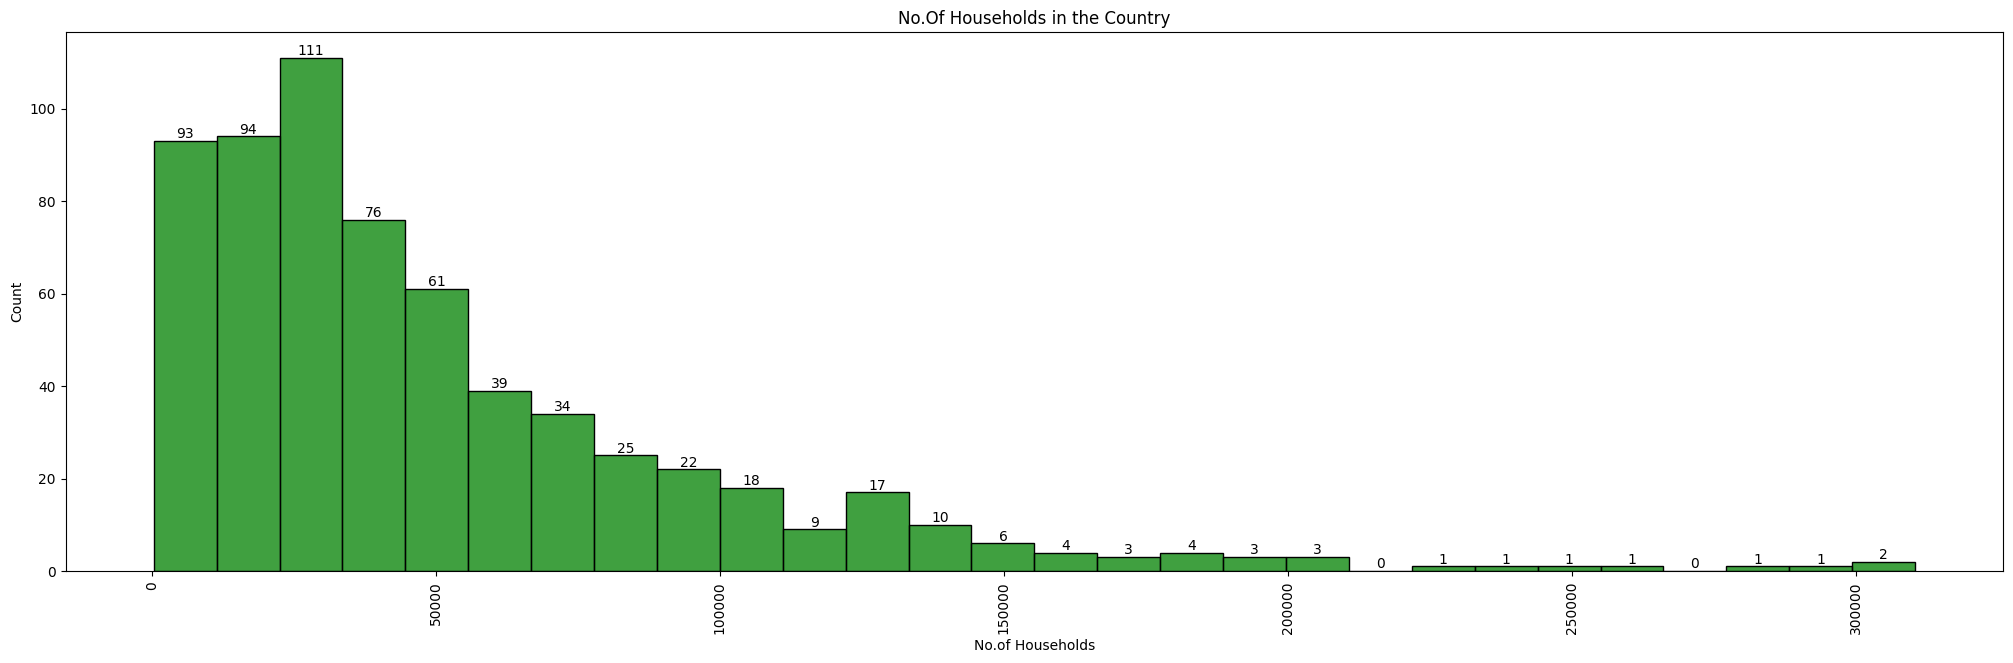

In [97]:
# 1. Total No.of Households in the Country?
plt.figure(figsize=(25,7))
nohouse=sns.histplot(data=census,x='No_HH', color='green')
plt.bar_label(nohouse.containers[0])
plt.title('No.Of Households in the Country')
plt.xlabel('No.of Households')
plt.xticks(rotation=90);

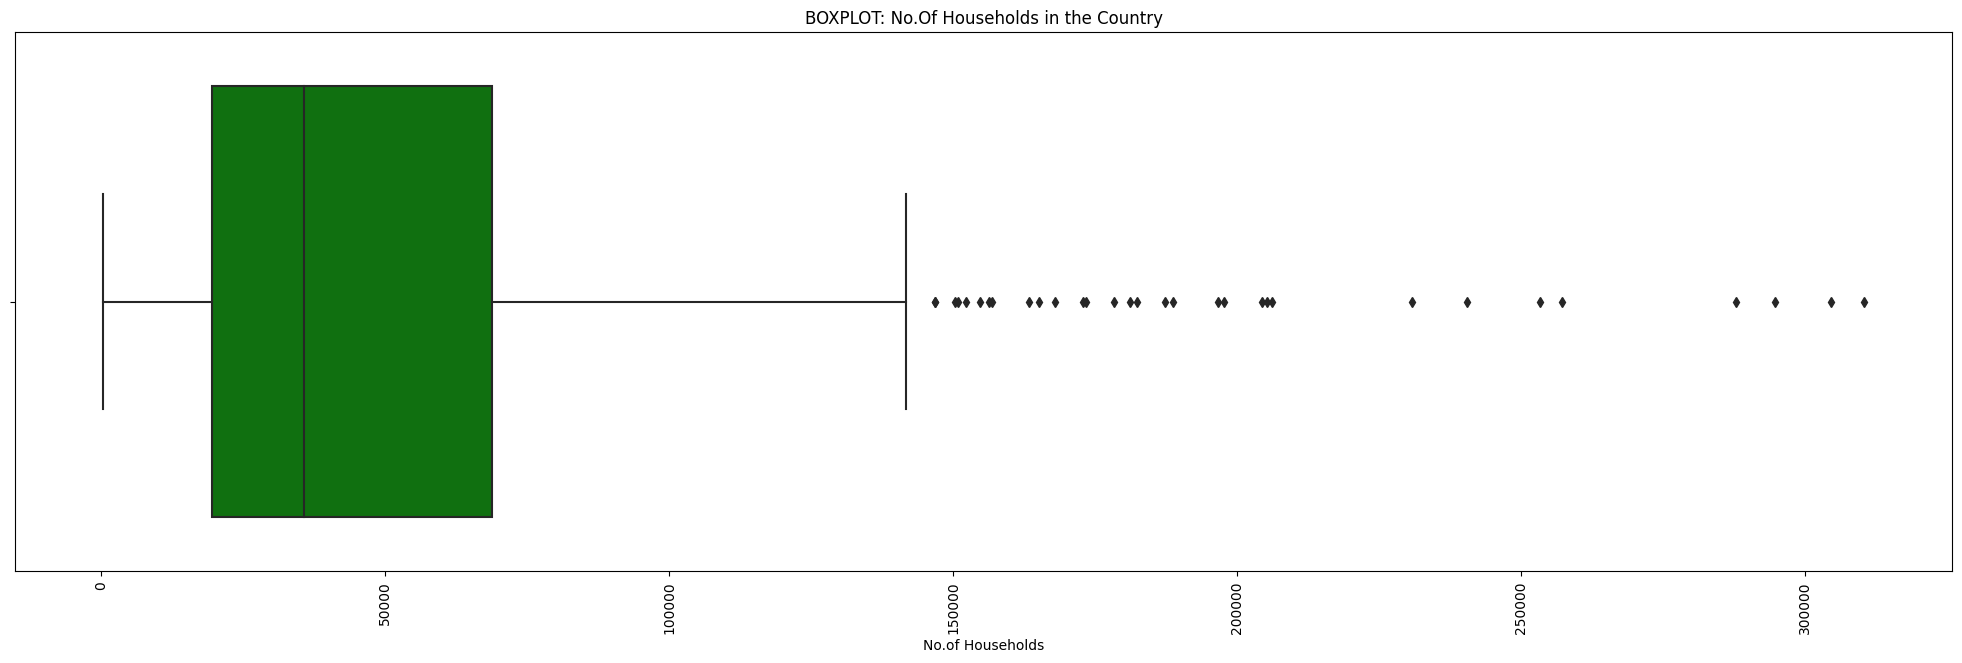

In [98]:
plt.figure(figsize=(25,7))
sfemale=sns.boxplot(data=census,x='No_HH', color='green')
plt.title('BOXPLOT: No.Of Households in the Country')
plt.xlabel('No.of Households')
plt.xticks(rotation=90);

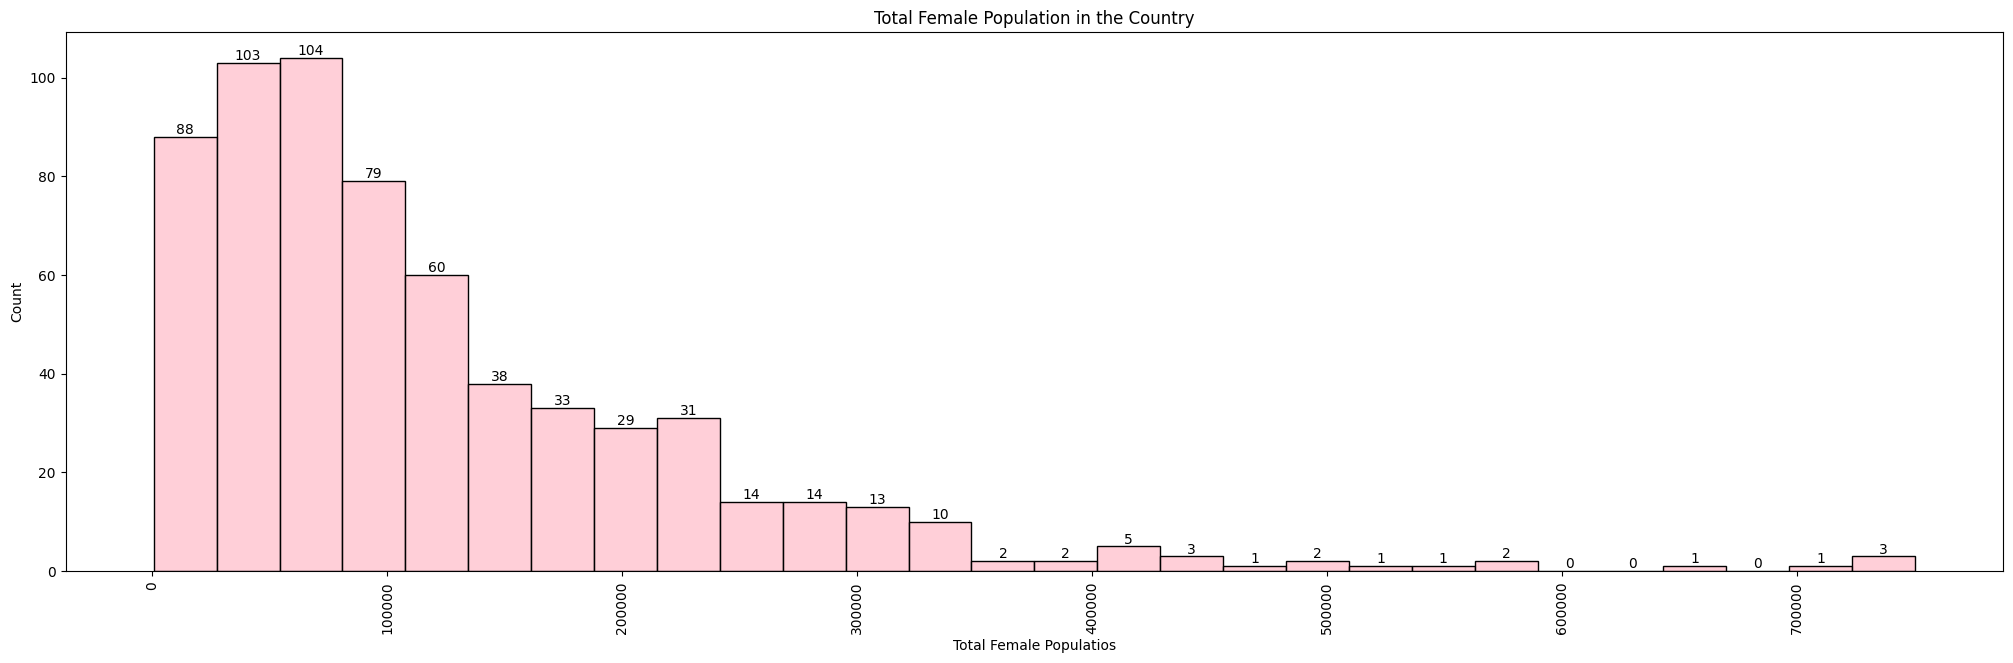

In [99]:
# 2. Total Female Population in the Country?
plt.figure(figsize=(25,7))
fepop=sns.histplot(data=census,x='TOT_F', color='pink')
plt.bar_label(fepop.containers[0])
plt.title('Total Female Population in the Country')
plt.xlabel('Total Female Populatios')
plt.xticks(rotation=90);

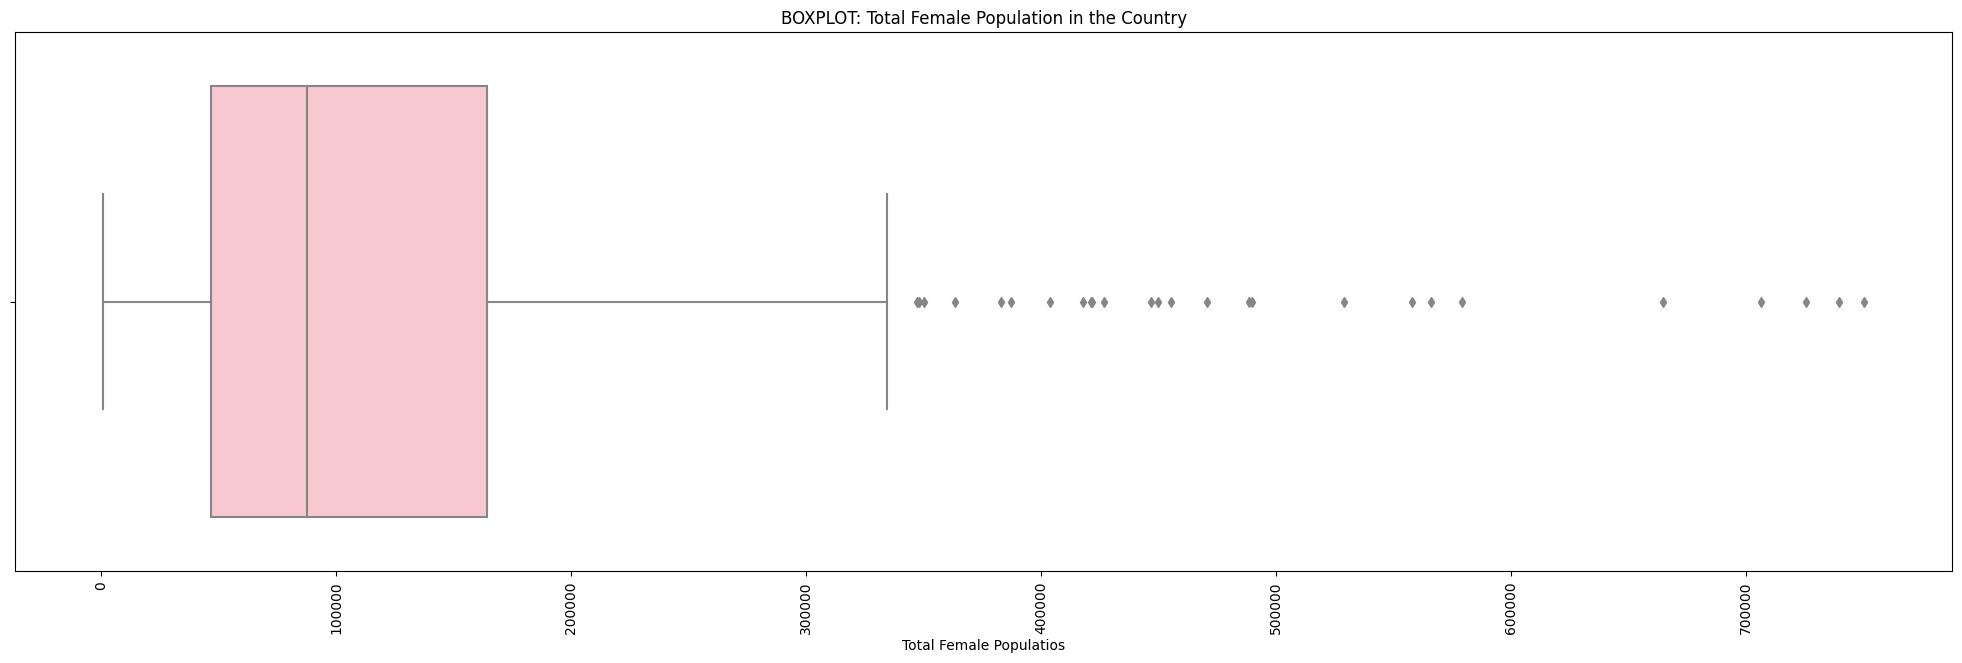

In [100]:
plt.figure(figsize=(25,7))
sfefepopmale=sns.boxplot(data=census,x='TOT_F', color='pink')
plt.title('BOXPLOT: Total Female Population in the Country')
plt.xlabel('Total Female Populatios')
plt.xticks(rotation=90);

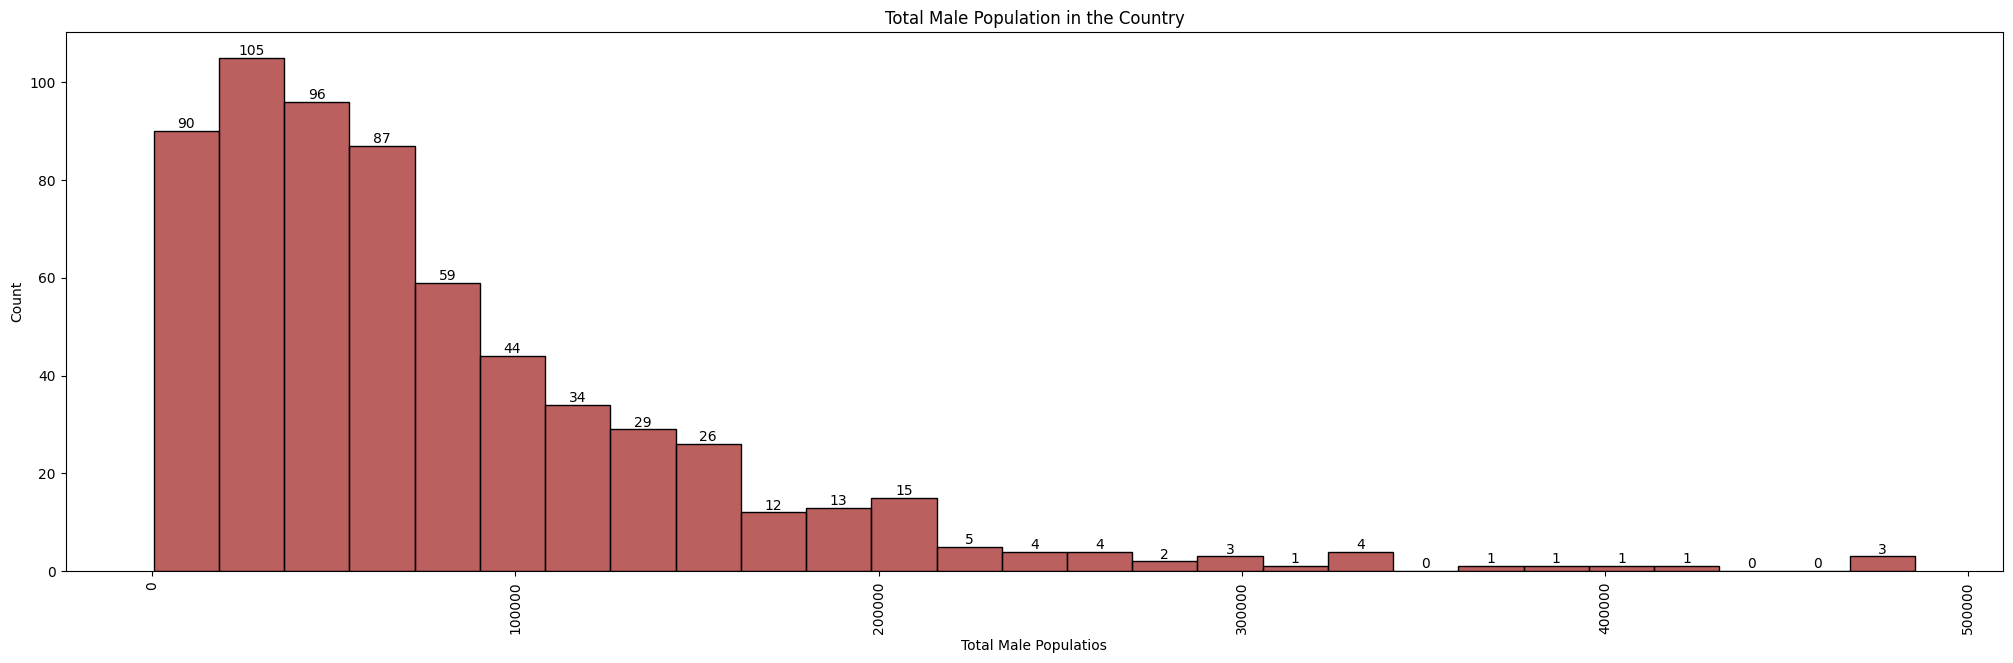

In [103]:
# 3. Total Male Population in the Country?
plt.figure(figsize=(25,7))
malpop=sns.histplot(data=census,x='TOT_M', color='brown')
plt.bar_label(malpop.containers[0])
plt.title('Total Male Population in the Country')
plt.xlabel('Total Male Populatios')
plt.xticks(rotation=90);

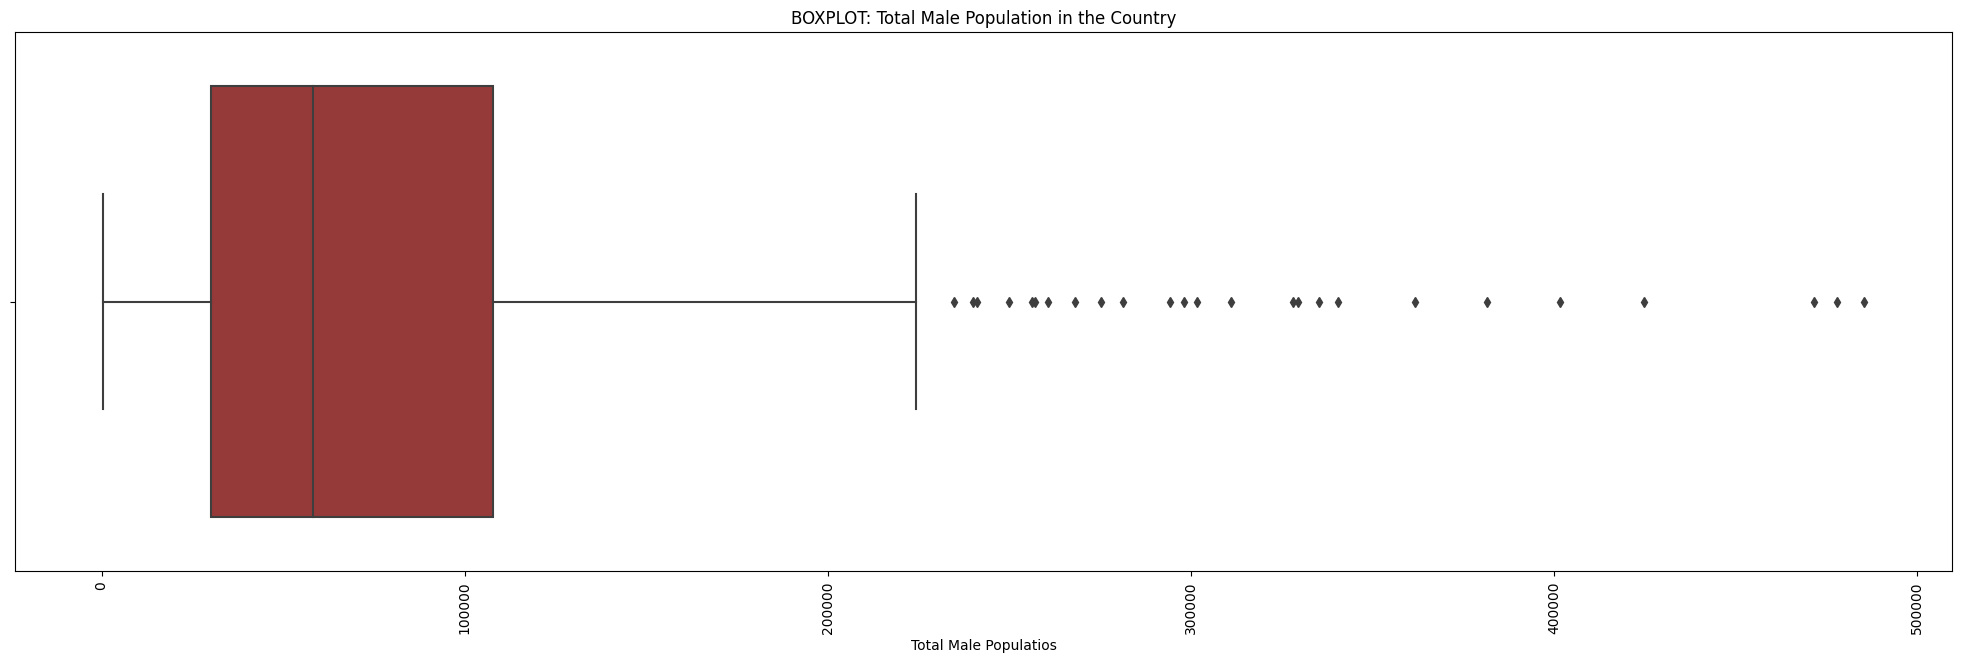

In [104]:
plt.figure(figsize=(25,7))
totmale=sns.boxplot(data=census,x='TOT_M', color='brown')
plt.title('BOXPLOT: Total Male Population in the Country')
plt.xlabel('Total Male Populatios')
plt.xticks(rotation=90);

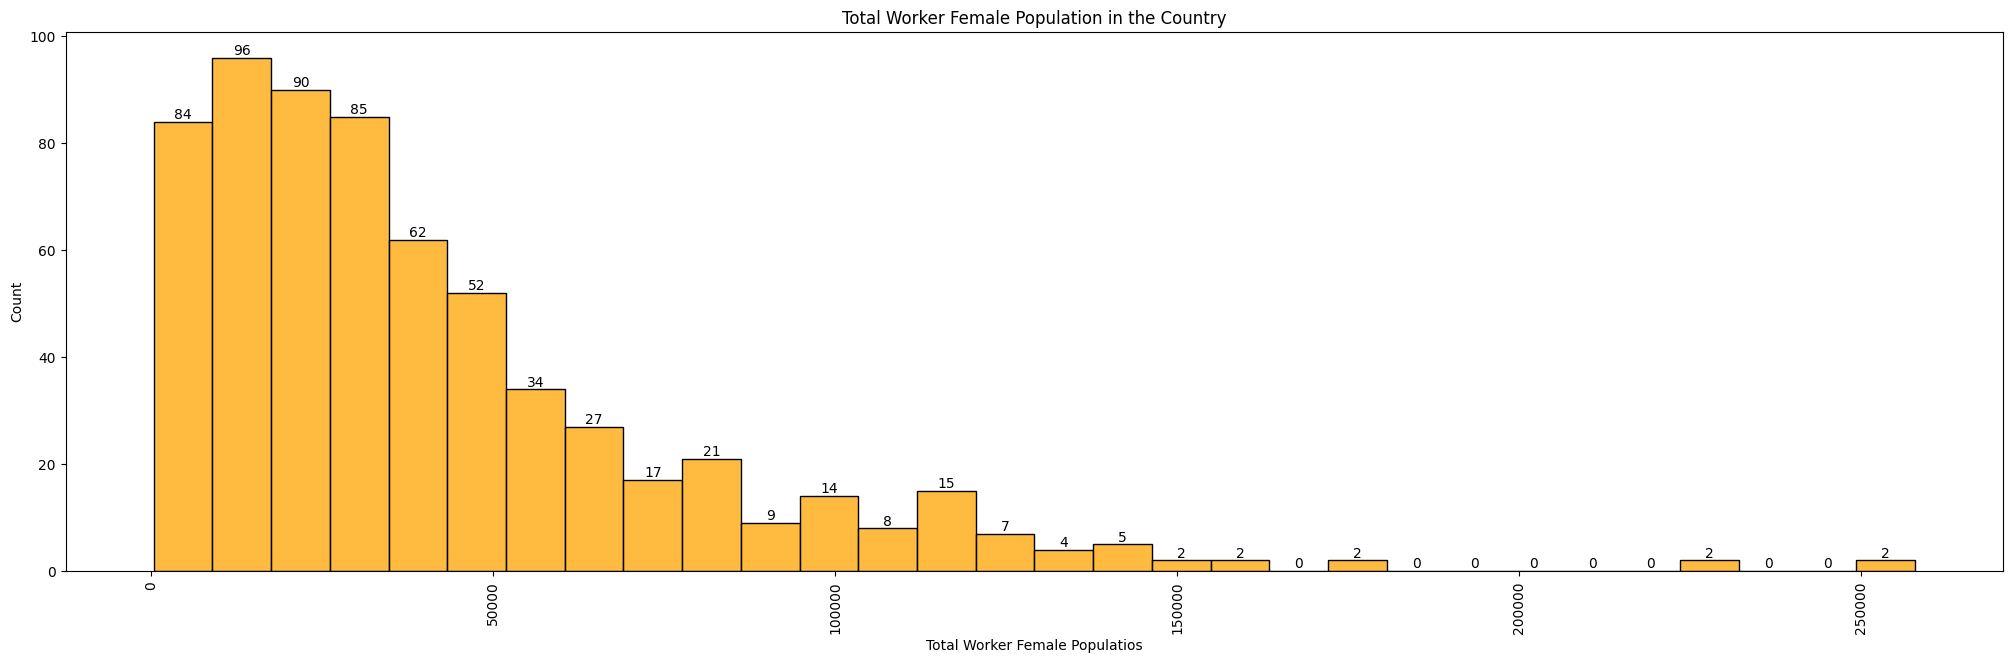

In [106]:
# 4. Total Worker Female Population in the Country?
plt.figure(figsize=(25,7))
feworkpop=sns.histplot(data=census,x='TOT_WORK_F', color='orange')
plt.bar_label(feworkpop.containers[0])
plt.title('Total Worker Female Population in the Country')
plt.xlabel('Total Worker Female Populatios')
plt.xticks(rotation=90);

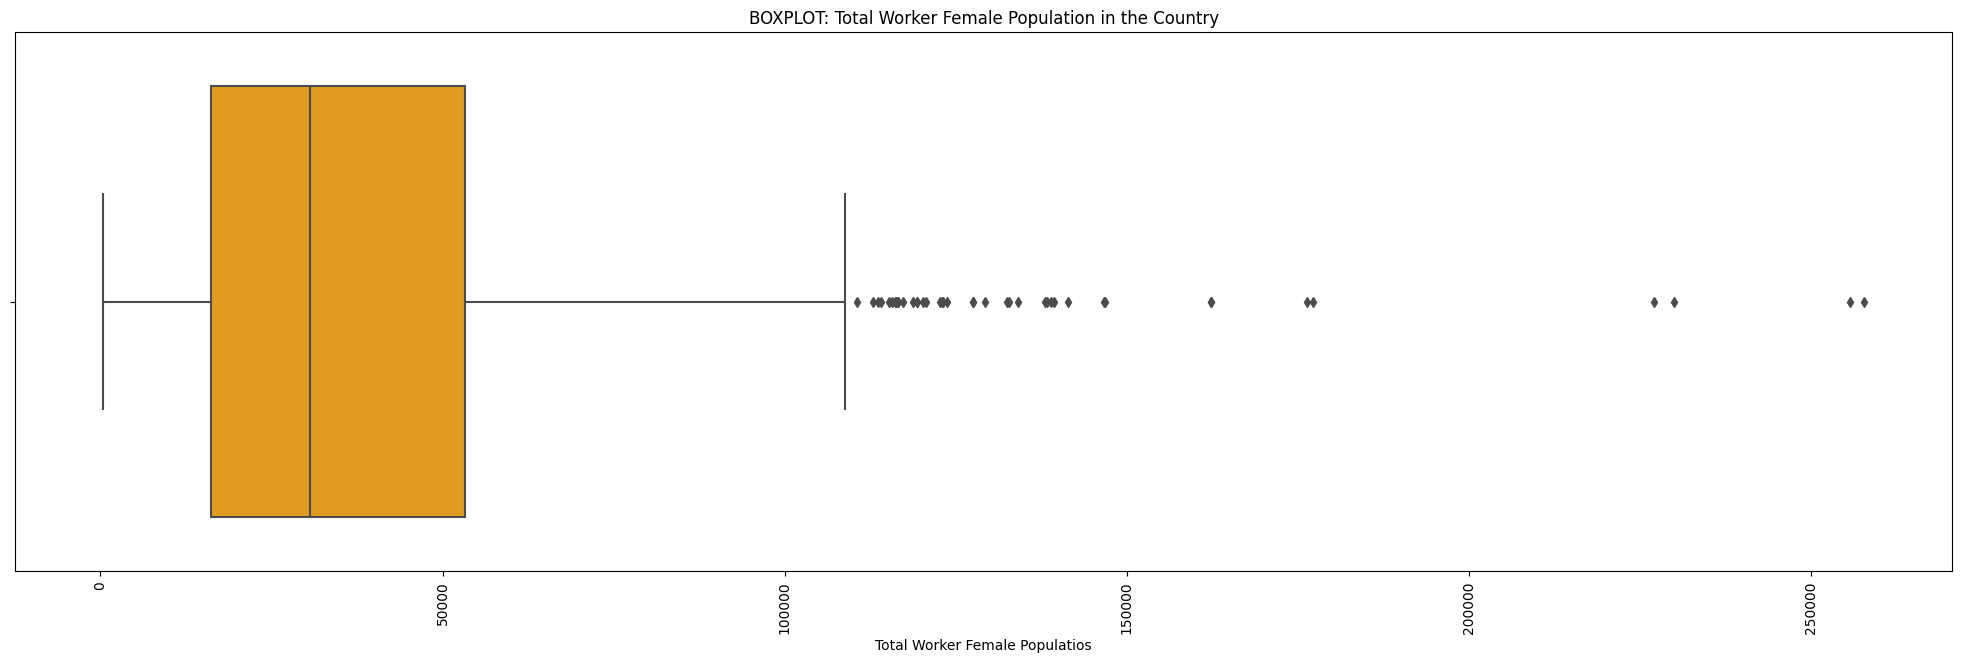

In [107]:
plt.figure(figsize=(25,7))
totworkfemale=sns.boxplot(data=census,x='TOT_WORK_F', color='orange')
plt.title('BOXPLOT: Total Worker Female Population in the Country')
plt.xlabel('Total Worker Female Populatios')
plt.xticks(rotation=90);

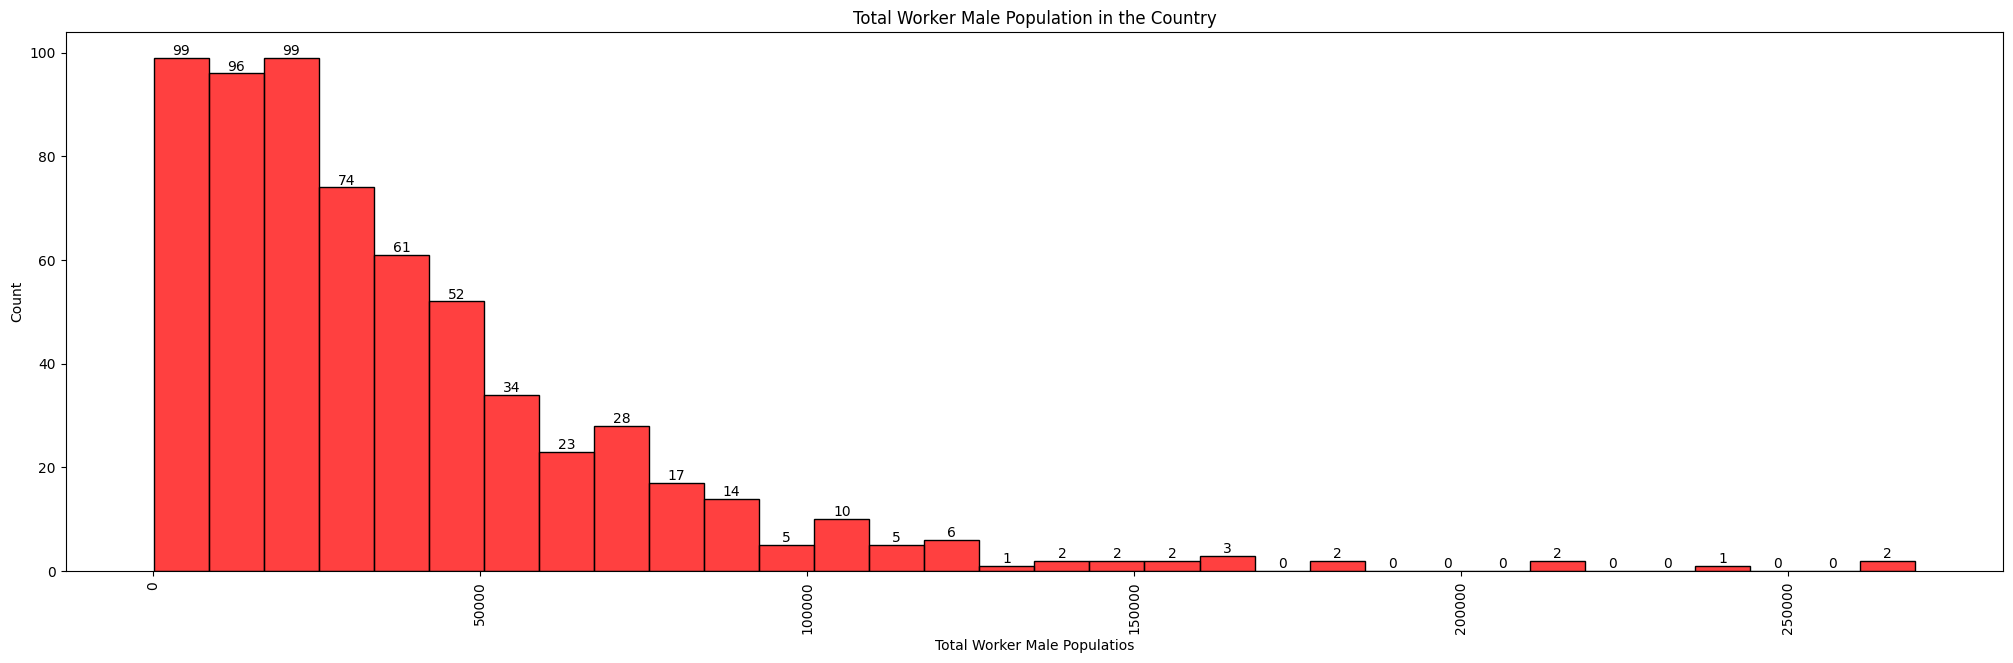

In [109]:
# 5. Total Worker Male Population in the Country?
plt.figure(figsize=(25,7))
maworkpop=sns.histplot(data=census,x='TOT_WORK_M', color='red')
plt.bar_label(maworkpop.containers[0])
plt.title('Total Worker Male Population in the Country')
plt.xlabel('Total Worker Male Populatios')
plt.xticks(rotation=90);

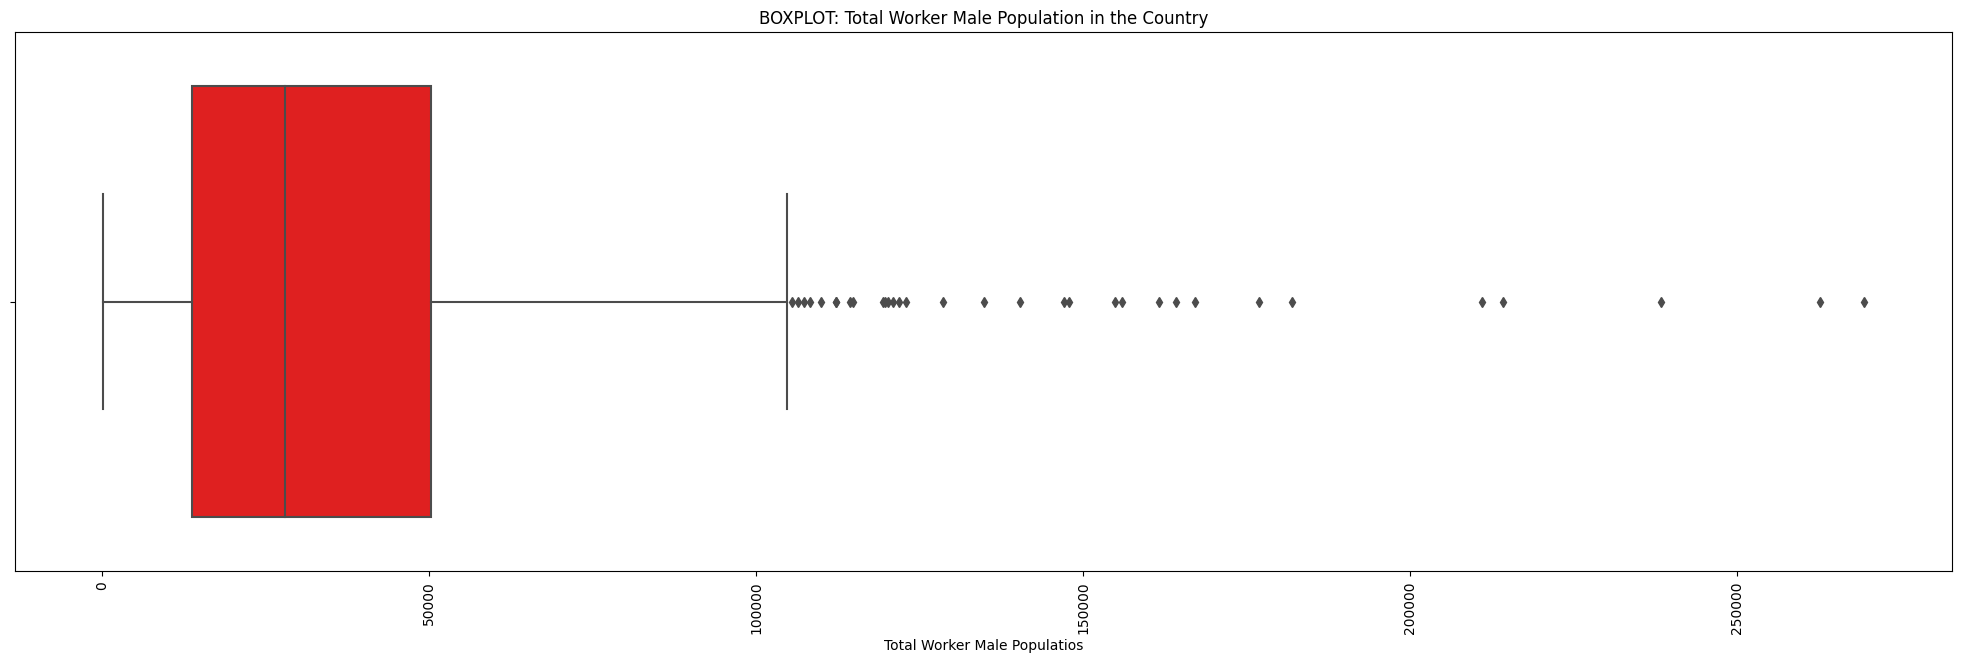

In [110]:
plt.figure(figsize=(25,7))
totworkmale=sns.boxplot(data=census,x='TOT_WORK_M', color='red')
plt.title('BOXPLOT: Total Worker Male Population in the Country')
plt.xlabel('Total Worker Male Populatios')
plt.xticks(rotation=90);

**Observations:**
From the Univariate Analysis we can say all variables are Left Skewed here and all are havingOutliers.

**Bivariate Analysis:** Plotng scatter plots for the above variables

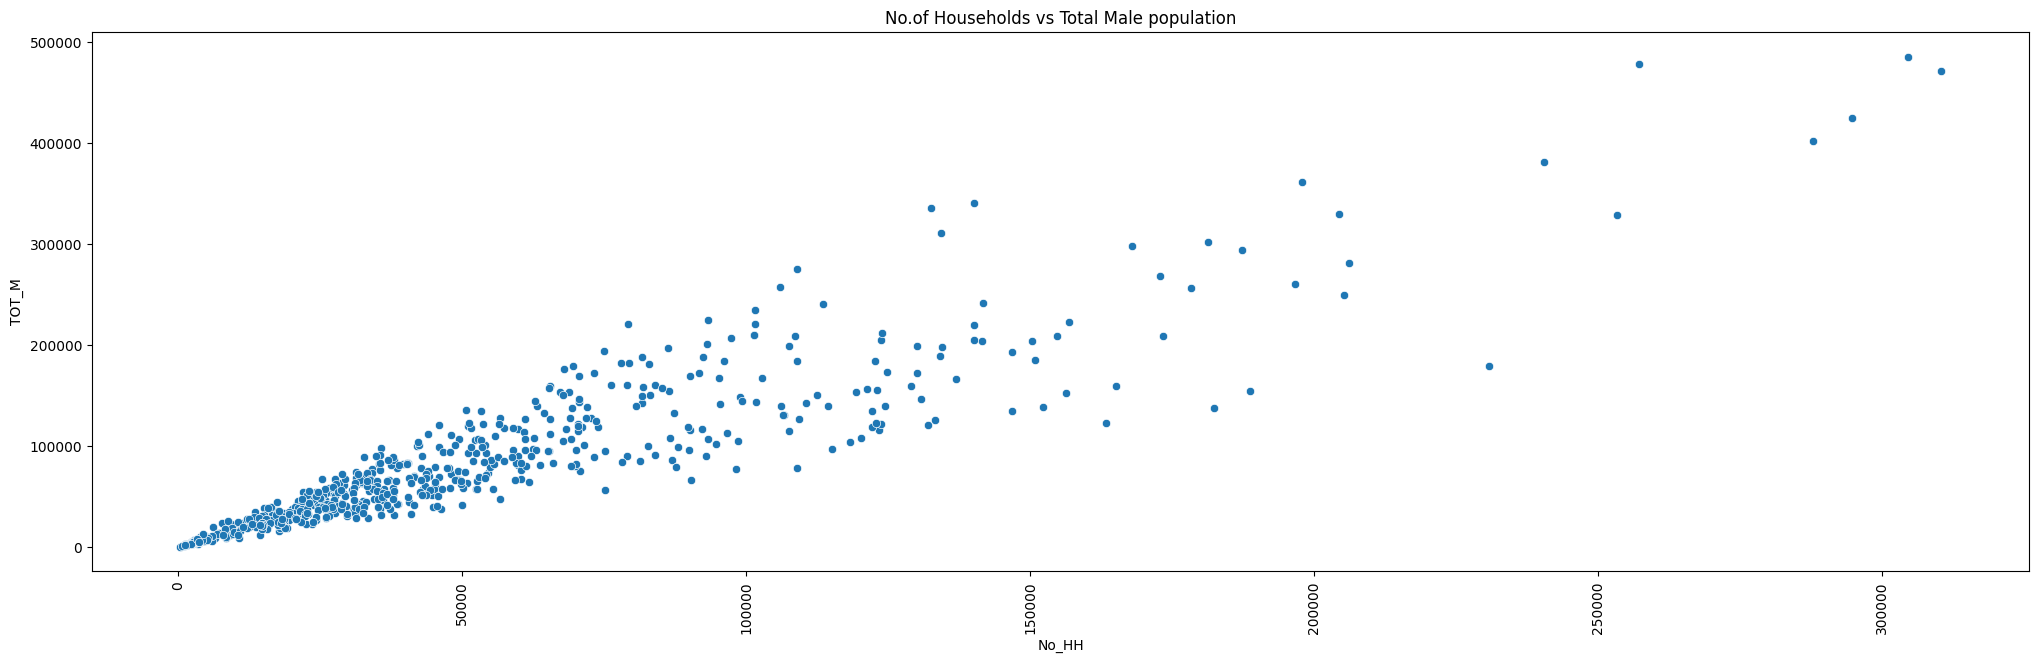

In [111]:
# 1. Is there any correlation between No.Of Households and Total Male Population?
plt.figure(figsize=(25,7))
sns.scatterplot(data=census, x='No_HH', y='TOT_M')
plt.title('No.of Households vs Total Male population')
plt.xticks(rotation=90);

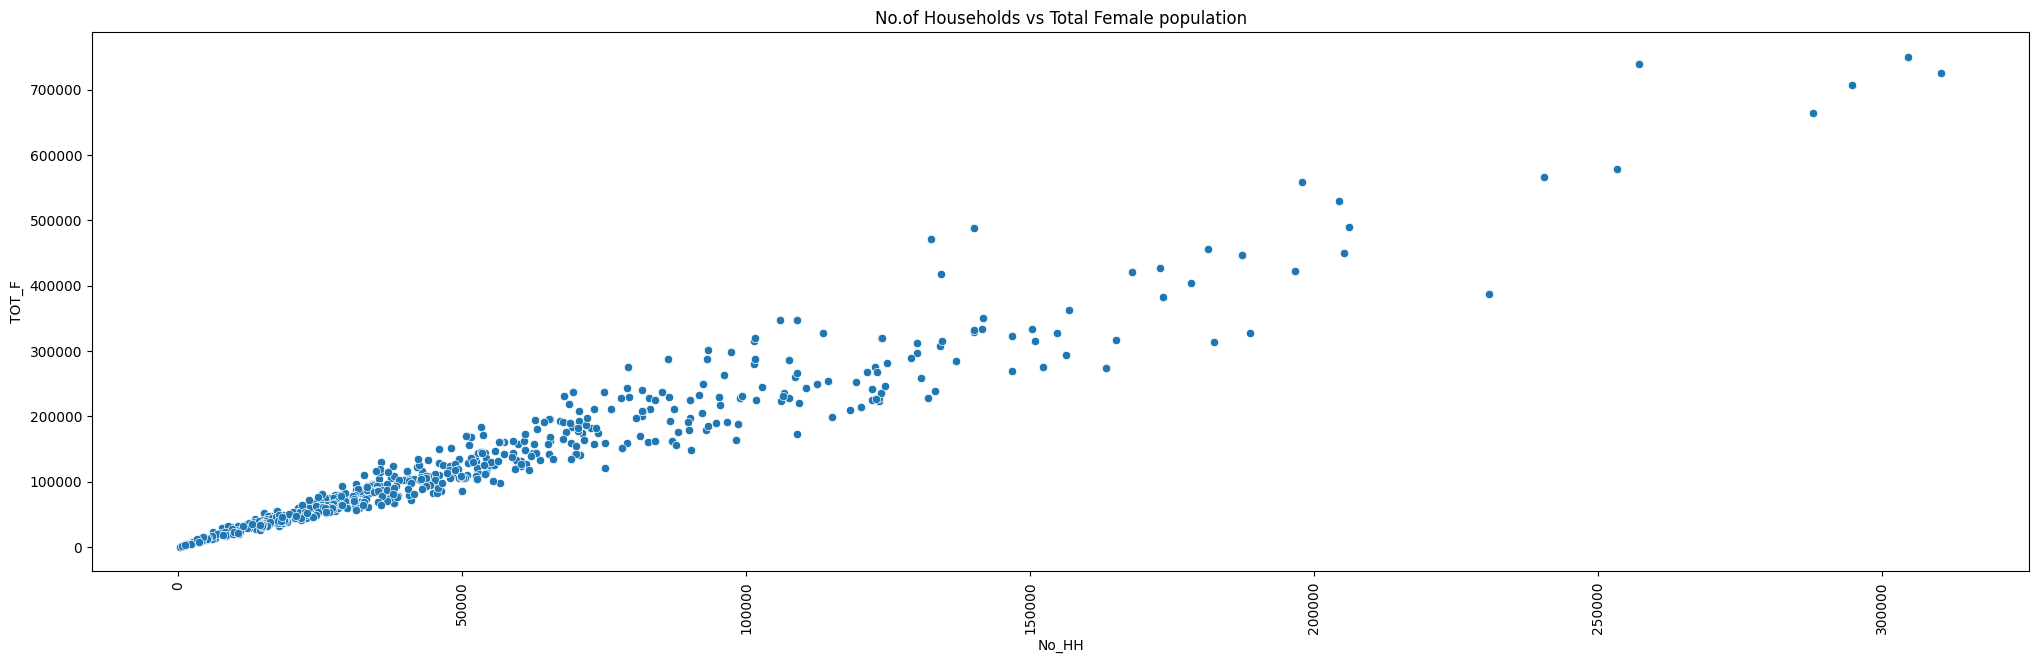

In [113]:
# 2. Is there any correlation between No.Of Households and Total Female Population?
plt.figure(figsize=(25,7))
sns.scatterplot(data=census, x='No_HH', y='TOT_F')
plt.title('No.of Households vs Total Female population')
plt.xticks(rotation=90);

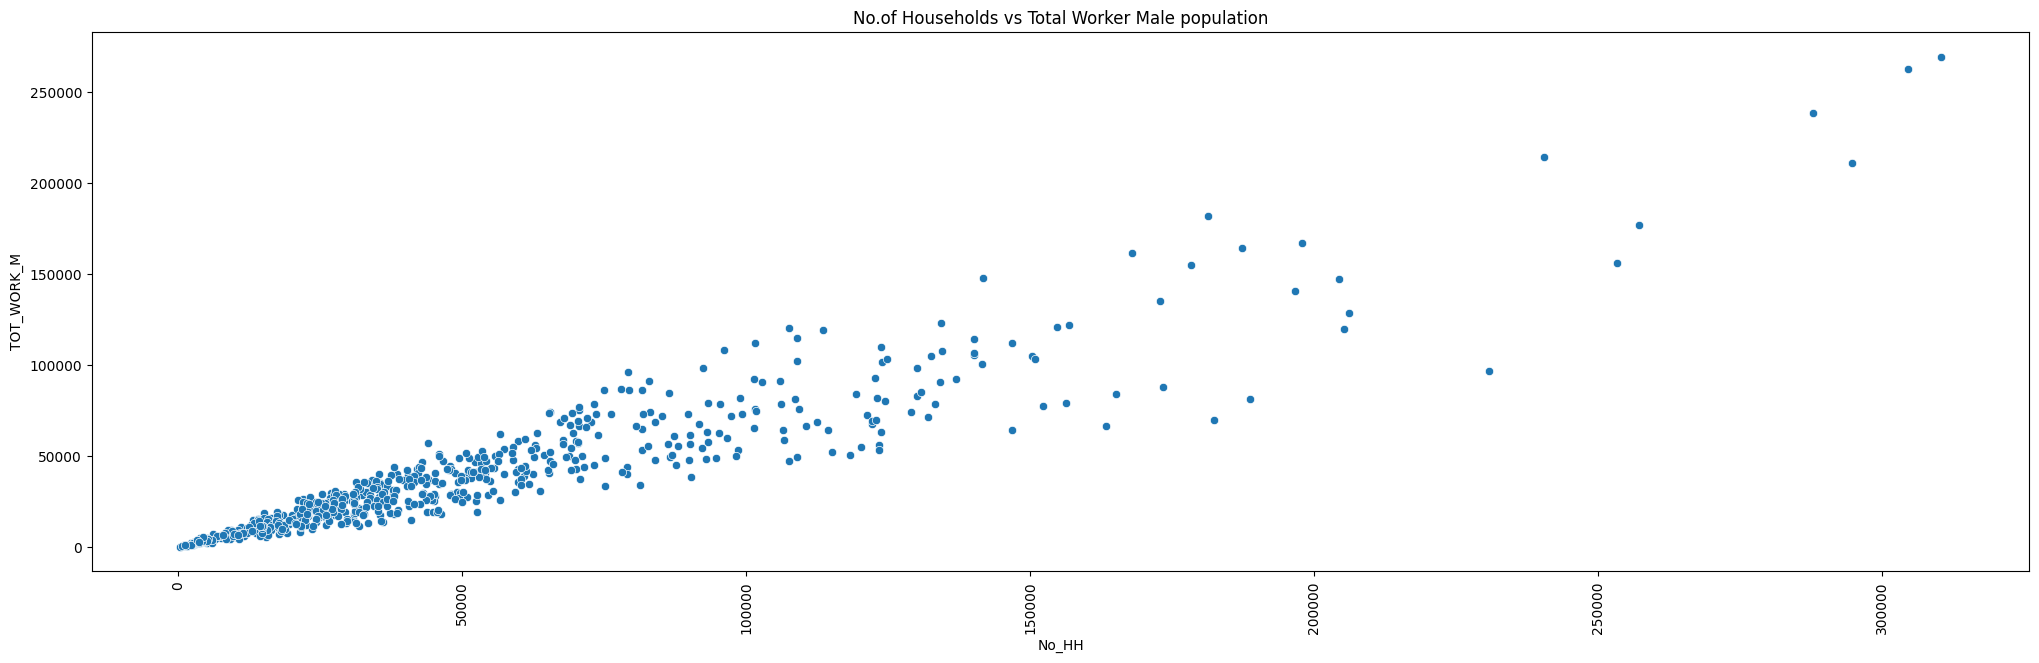

In [114]:
# 3. Is there any correlation between No.Of Households and Total Worker Male Population?
plt.figure(figsize=(25,7))
sns.scatterplot(data=census, x='No_HH', y='TOT_WORK_M')
plt.title('No.of Households vs Total Worker Male population')
plt.xticks(rotation=90);

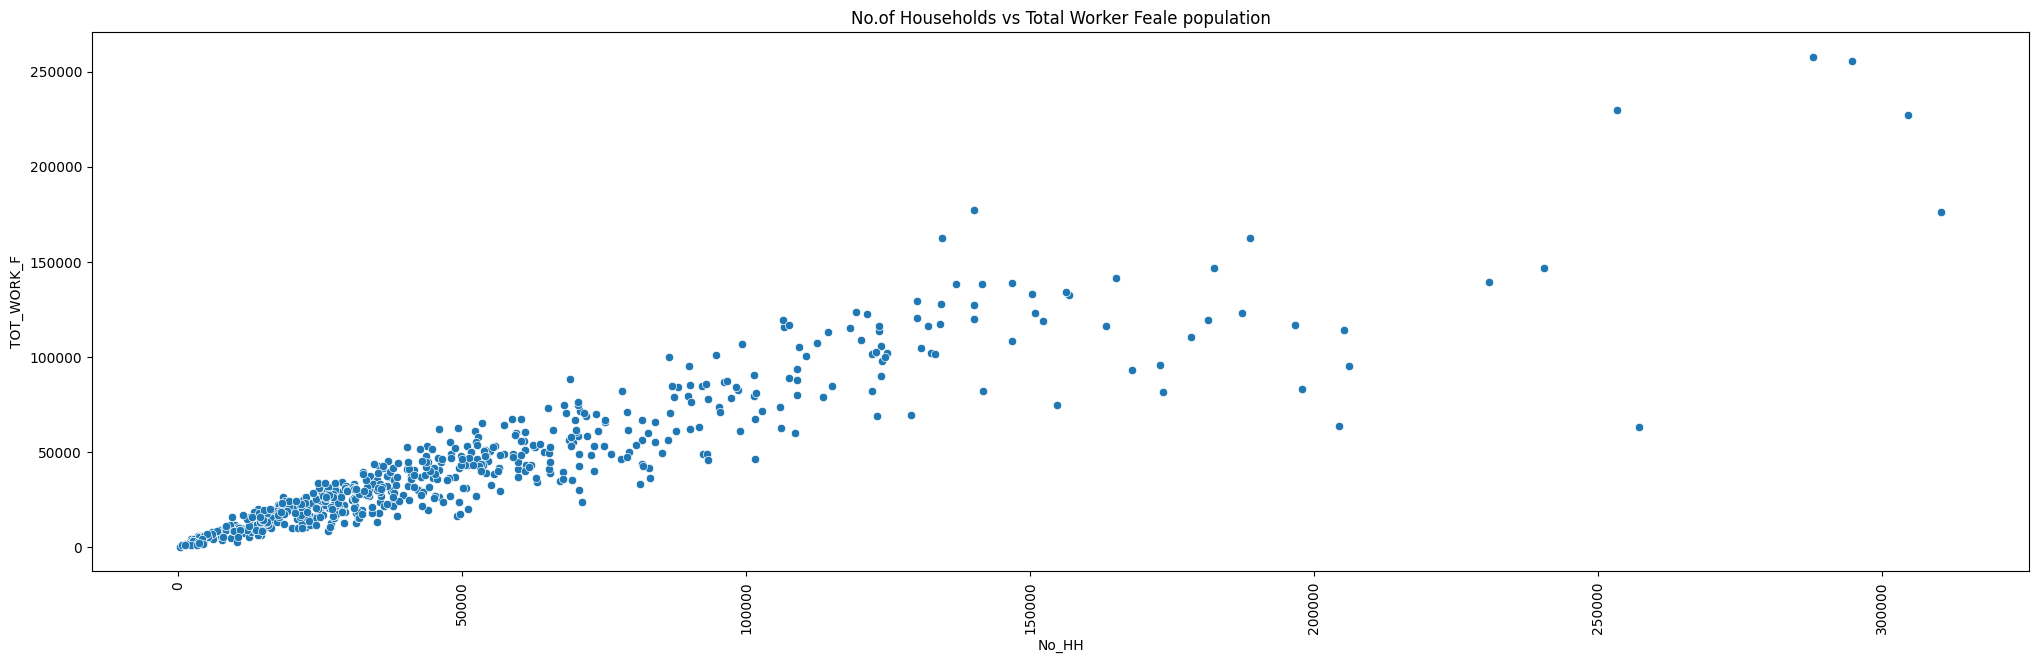

In [115]:
# 4. Is there any correlation between No.Of Households and Total Worker Feale Population?
plt.figure(figsize=(25,7))
sns.scatterplot(data=census, x='No_HH', y='TOT_WORK_F')
plt.title('No.of Households vs Total Worker Feale population')
plt.xticks(rotation=90);

**Observations:**From the Bivariate Analysis we can say all variables are Positively Co-related to each other.

**Part 2: PCA: Data Preprocessing**
Check for and treat (if needed) missing values - Check for and treat (if needed) data irregularities - Scale the Data using the z-score method - Visualize the data before and after scaling and comment on the impact on outliers

In [7]:
census

State Code  Dist.Code                     State                Area Name  \
0             1          1           Jammu & Kashmir                  Kupwara   
1             1          2           Jammu & Kashmir                   Badgam   
2             1          3           Jammu & Kashmir              Leh(Ladakh)   
3             1          4           Jammu & Kashmir                   Kargil   
4             1          5           Jammu & Kashmir                    Punch   
..          ...        ...                       ...                      ...   
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0     7707  23388  29796  5862  6196     3  ...           1150            749   
1     6218  19585  23102  4482  3733     7  ...            525            715   
2     4452   6546  10964  1082  1018     3  ...            114            188   
3     1320   2784   4206   563   677     0  ...            194            247   
4    11654  20591  29981  5157  4587    20  ...            874           1928   
..     ...    ...    ...   ...   ...   ...  ...            ...            ...   
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0              180            237            680            252   
1              123            229            186            148   
2               44             89              3             34   
3               61            128             13             50   
4              465           1043            205            302   
..             ...            ...            ...            ...   
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0               32             46         258         214  
1               76            178         140         160  
2                0              4          67          61  
3                4             10         116          59  
4               24            105         180         478  
..             ...            ...         ...         ...  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[640 rows x 61 columns]

# Dropping the redundant columns for ease of analysis.

In [9]:
census_dropped=census.drop(['State Code', 'Dist.Code'], axis=1, inplace=True)
census

State                Area Name  No_HH  TOT_M  TOT_F  \
0             Jammu & Kashmir                  Kupwara   7707  23388  29796   
1             Jammu & Kashmir                   Badgam   6218  19585  23102   
2             Jammu & Kashmir              Leh(Ladakh)   4452   6546  10964   
3             Jammu & Kashmir                   Kargil   1320   2784   4206   
4             Jammu & Kashmir                    Punch  11654  20591  29981   
..                        ...                      ...    ...    ...    ...   
635                Puducherry                     Mahe   3333   8154  11781   
636                Puducherry                 Karaikal  10612  12346  21691   
637  Andaman & Nicobar Island                 Nicobars   1275   1549   2630   
638  Andaman & Nicobar Island  North  & Middle Andaman   3762   5200   8012   
639  Andaman & Nicobar Island            South Andaman   7975  11977  18049   

     M_06  F_06  M_SC  F_SC  M_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0    5862  6196     3     0  1999  ...           1150            749   
1    4482  3733     7     6   427  ...            525            715   
2    1082  1018     3     6  5806  ...            114            188   
3     563   677     0     0  2666  ...            194            247   
4    5157  4587    20    33  7670  ...            874           1928   
..    ...   ...   ...   ...   ...  ...            ...            ...   
635  1146  1203    21    30     0  ...             32             47   
636  1544  1533  2234  4155     0  ...            155            337   
637   227   225     0     0  1012  ...            104            134   
638   723   664     0     0    28  ...            136            172   
639  1470  1358     0     0   161  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0              180            237            680            252   
1              123            229            186            148   
2               44             89              3             34   
3               61            128             13             50   
4              465           1043            205            302   
..             ...            ...            ...            ...   
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0               32             46         258         214  
1               76            178         140         160  
2                0              4          67          61  
3                4             10         116          59  
4               24            105         180         478  
..             ...            ...         ...         ...  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[640 rows x 59 columns]

In [10]:
census_new= census.drop(['State', 'Area Name'], axis=1, inplace=True)
census_new

In [11]:
census

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST   F_ST  M_LIT  ...  \
0     7707  23388  29796  5862  6196     3     0  1999   2598  13381  ...   
1     6218  19585  23102  4482  3733     7     6   427    517  10513  ...   
2     4452   6546  10964  1082  1018     3     6  5806   9723   4534  ...   
3     1320   2784   4206   563   677     0     0  2666   3968   1842  ...   
4    11654  20591  29981  5157  4587    20    33  7670  10843  13243  ...   
..     ...    ...    ...   ...   ...   ...   ...   ...    ...    ...  ...   
635   3333   8154  11781  1146  1203    21    30     0      0   6916  ...   
636  10612  12346  21691  1544  1533  2234  4155     0      0  10292  ...   
637   1275   1549   2630   227   225     0     0  1012   1750   1187  ...   
638   3762   5200   8012   723   664     0     0    28     50   4206  ...   
639   7975  11977  18049  1470  1358     0     0   161    264  10095  ...   

     MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0             1150            749            180            237   
1              525            715            123            229   
2              114            188             44             89   
3              194            247             61            128   
4              874           1928            465           1043   
..             ...            ...            ...            ...   
635             32             47              0              0   
636            155            337              3             14   
637            104            134              9              4   
638            136            172             24             44   
639            173            122              6              2   

     MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
0              680            252             32             46         258   
1              186            148             76            178         140   
2                3             34              0              4          67   
3               13             50              4             10         116   
4              205            302             24            105         180   
..             ...            ...            ...            ...         ...   
635              0              0              0              0          32   
636             38            130              4             23         110   
637              2              6             17             47          76   
638             11             21              1              4         100   
639             17             17              2              4         148   

     NON_WORK_F  
0           214  
1           160  
2            61  
3            59  
4           478  
..          ...  
635          47  
636         170  
637          77  
638         103  
639          99  

[640 rows x 57 columns]

In [118]:
# Are there any duplicates?

dups=census.duplicated()
print('Number of duplicate rows= %d' % (dups.sum()))
census[dups]

Number of duplicate rows= 0


Empty DataFrame
Columns: [State, Area Name, No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F, MARGWORK_M, MARGWORK_F, MARG_CL_M, MARG_CL_F, MARG_AL_M, MARG_AL_F, MARG_HH_M, MARG_HH_F, MARG_OT_M, MARG_OT_F, MARGWORK_3_6_M, MARGWORK_3_6_F, MARG_CL_3_6_M, MARG_CL_3_6_F, MARG_AL_3_6_M, MARG_AL_3_6_F, MARG_HH_3_6_M, MARG_HH_3_6_F, MARG_OT_3_6_M, MARG_OT_3_6_F, MARGWORK_0_3_M, MARGWORK_0_3_F, MARG_CL_0_3_M, MARG_CL_0_3_F, MARG_AL_0_3_M, MARG_AL_0_3_F, MARG_HH_0_3_M, MARG_HH_0_3_F, MARG_OT_0_3_M, MARG_OT_0_3_F, NON_WORK_M, NON_WORK_F]
Index: []

[0 rows x 59 columns]

In [119]:
# Checking for missing values
census.isnull().sum()

State             0
Area Name         0
No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0
MARGWORK_0_3_F    0
MARG_CL_0_3_M     0


There are no missing values noted for this dataset.

Outliers treatment is not necessary unless the they are the result from a processing mistake orwrong measurement. True outliers must be kept in the data.

In [164]:
census.describe().T

count           mean            std    min       25%      50%  \
No_HH           640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M           640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F           640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06            640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06            640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   
M_SC            640.0   13820.946875   14426.373130    0.0   3466.25   9591.5   
F_SC            640.0   20778.392188   21727.887713    0.0   5603.25  13709.0   
M_ST            640.0    6191.807813    9912.668948    0.0    293.75   2333.5   
F_ST            640.0   10155.640625   15875.701488    0.0    429.50   3834.5   
M_LIT           640.0   57967.979688   55910.282466  286.0  21298.00  42693.5   
F_LIT           640.0   66359.565625   75037.860207  371.0  20932.00  43796.5   
M_ILL           640.0   21972.596875   19825.605268  105.0   8590.00  15767.5   
F_ILL           640.0   56012.518750   47116.693769  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.407813   36419.537491  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.760938   37192.360943  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.446875   31480.915680   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.846875   29998.262689  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.342188    4739.161969    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.042188    5326.362728    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.109375    6399.507966    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8925.995312   12864.287584    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.893750    1278.642345    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.773438    3179.414449    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.101562   26068.480886   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.035938   18972.202369  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.960938    7410.791691   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.914062   10996.474528  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.737500    1311.546847    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.682813    3564.626095    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.326562    3781.555707    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.281250    6773.876298    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.742188     462.661891    0.0     71.75    166.0   
MARG_HH_F       640.0     786.626562    1198.718213    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.154687    3609.391821    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.323438    4115.191314   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.168750   39045.316918  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.323438   82970.406216  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.987500    6019.806644   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.864063    8467.473429   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.848438     905.639279    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.584375    2496.541514    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.635938    3059.586387    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.850000    5335.640960    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.362500     358.728567    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.884375     900.025817    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.140625    3036.964381    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.545312    3327.836932   14.0    833.50   1834.5   
MARG_CL_0_3_M   640.0    1392.973438    1489.707052    4.0    489.50    949.0   
MARG_CL_0_3_F   640.0    2757.050000    2788.77

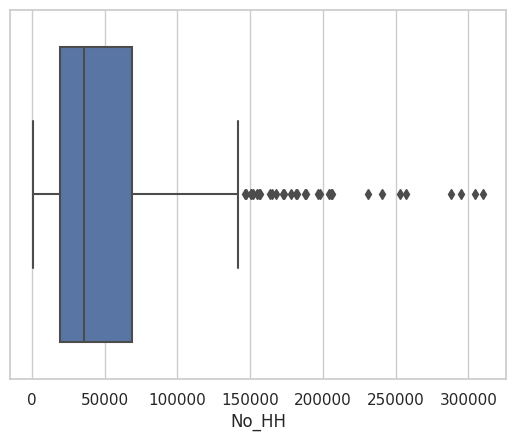

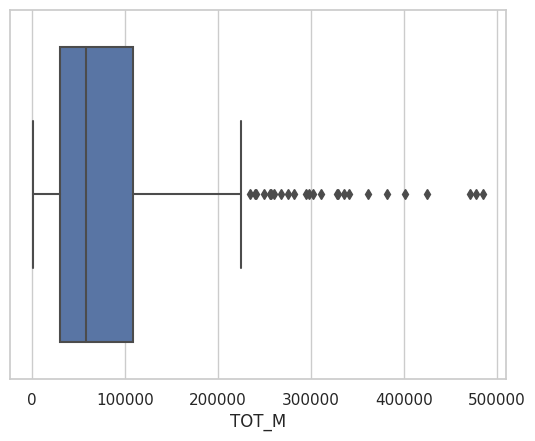

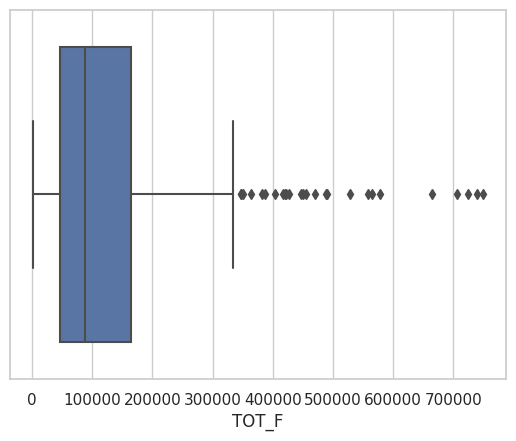

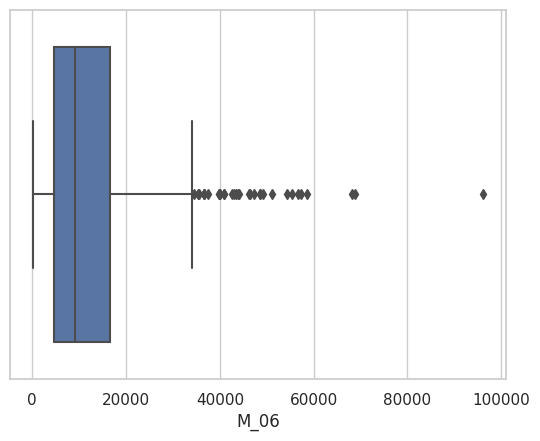

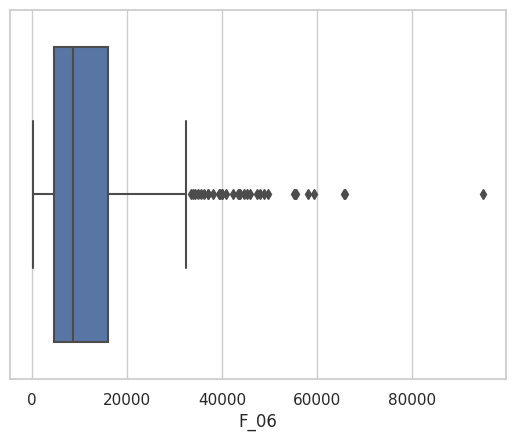

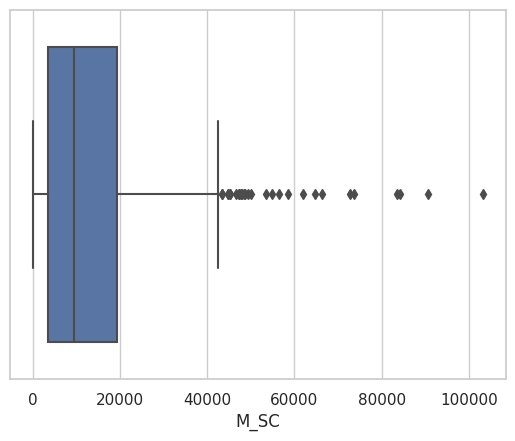

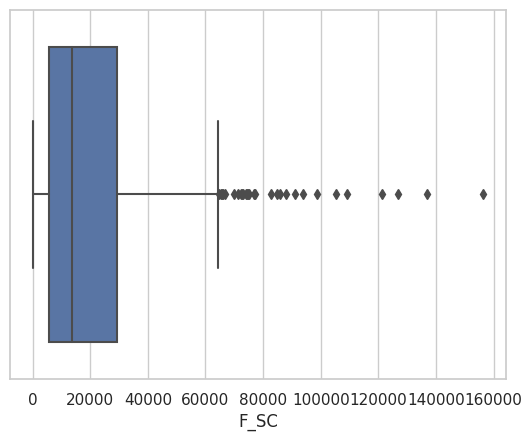

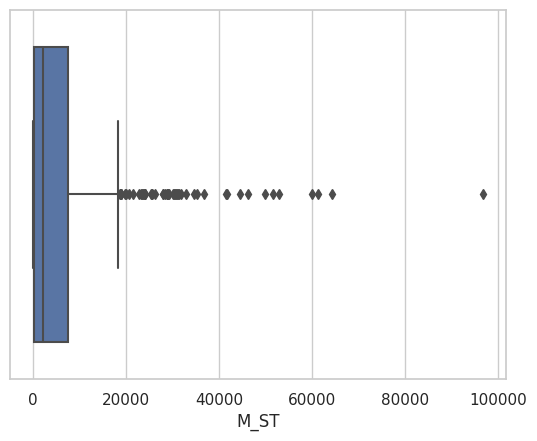

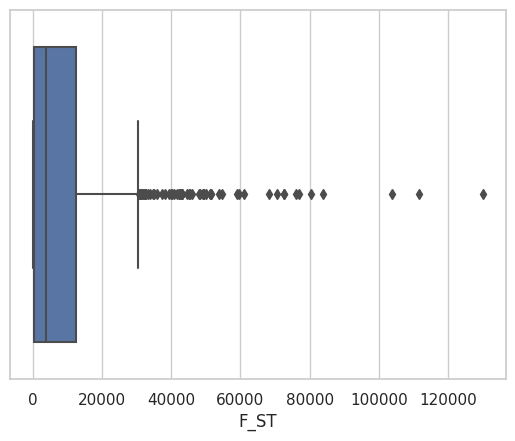

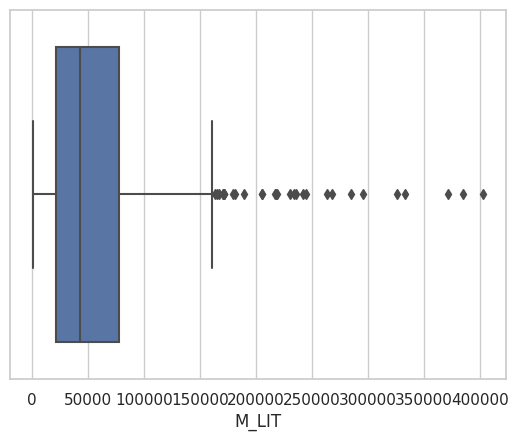

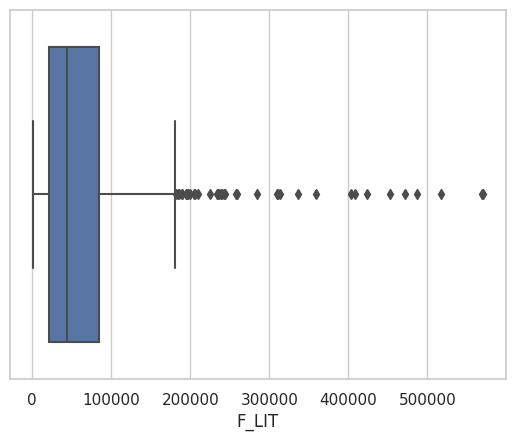

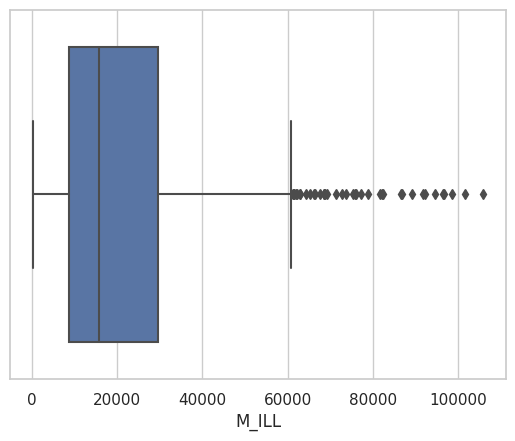

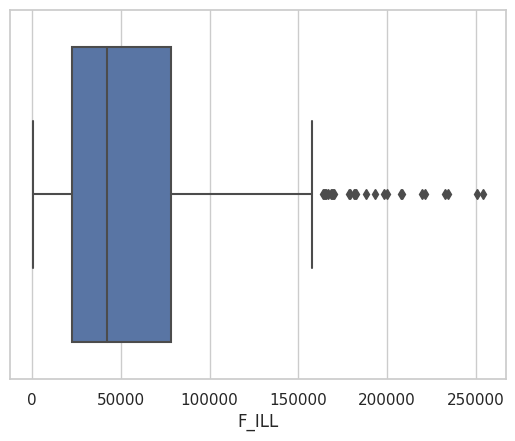

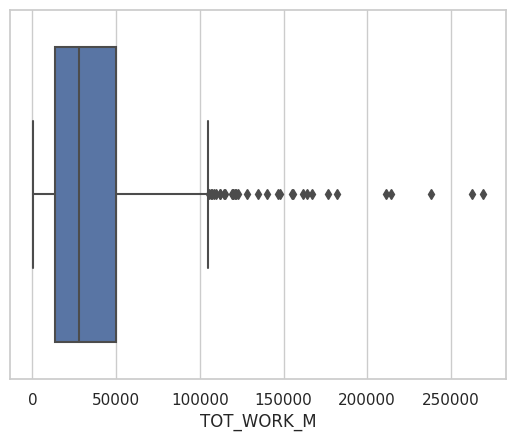

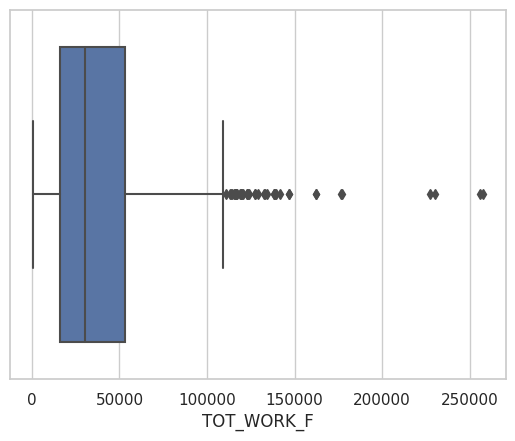

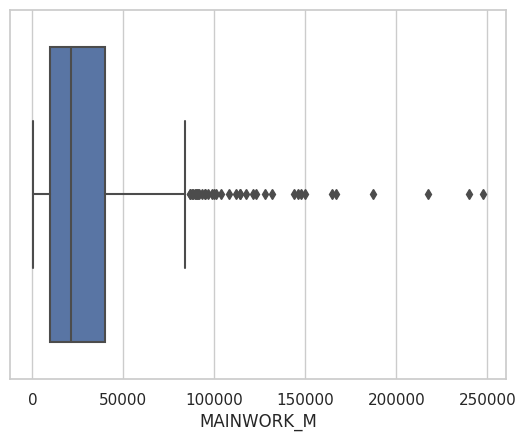

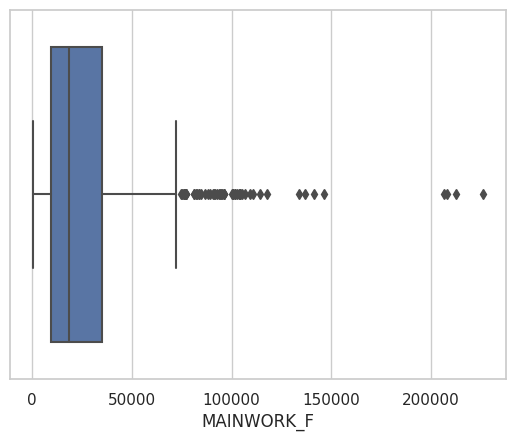

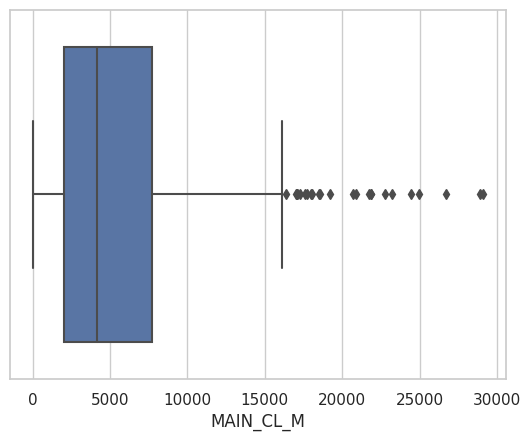

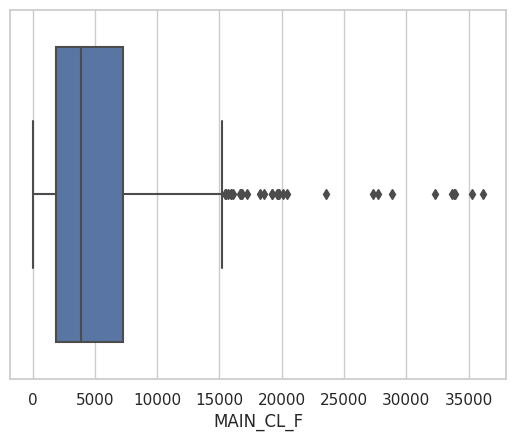

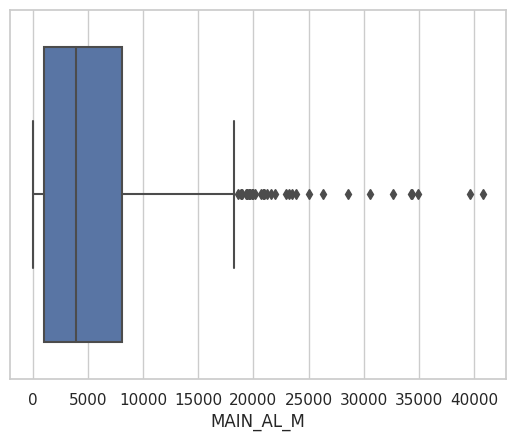

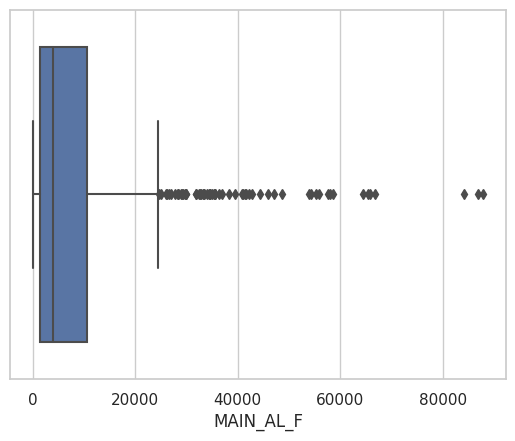

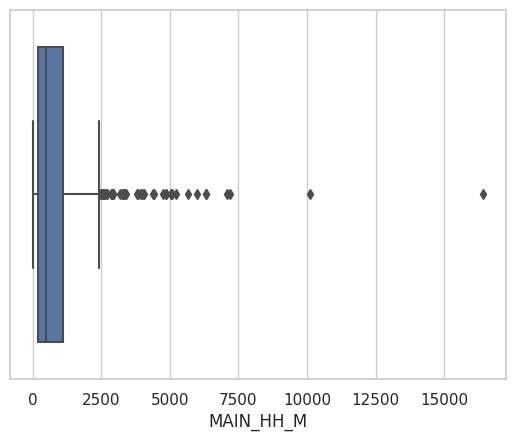

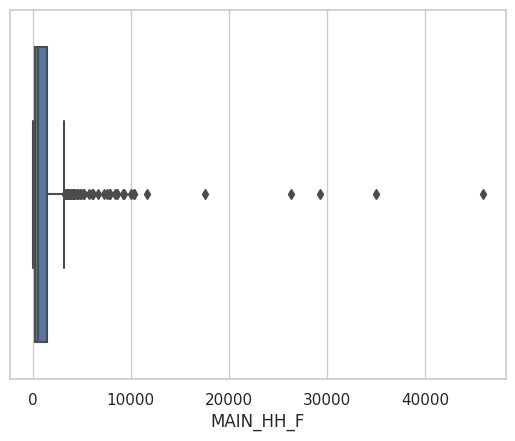

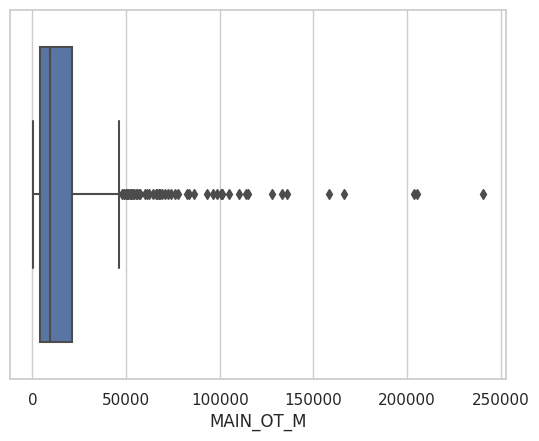

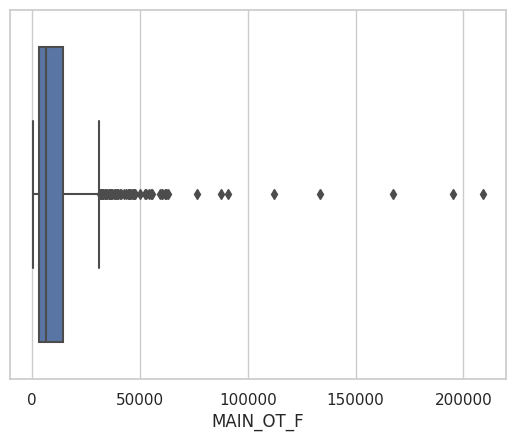

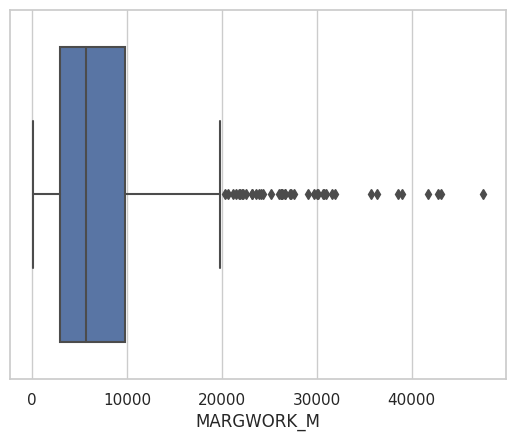

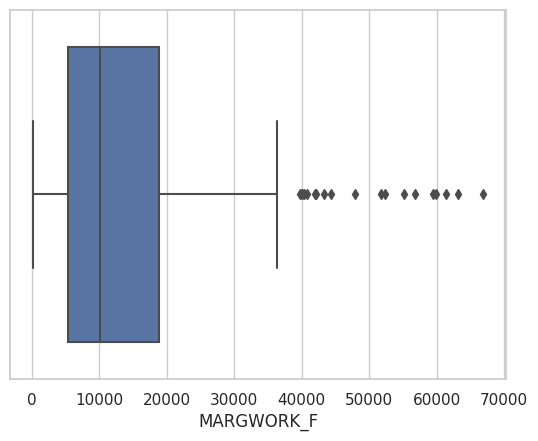

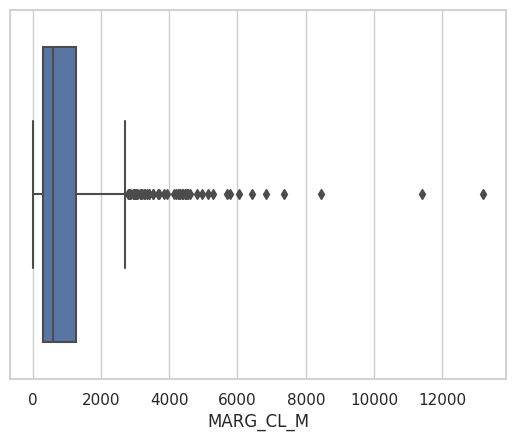

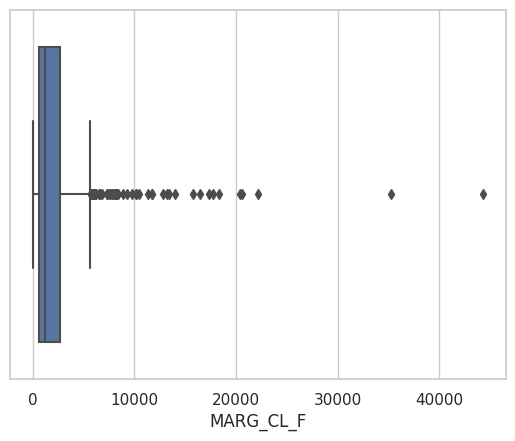

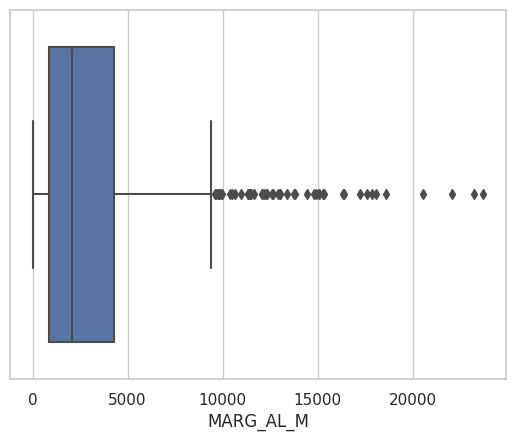

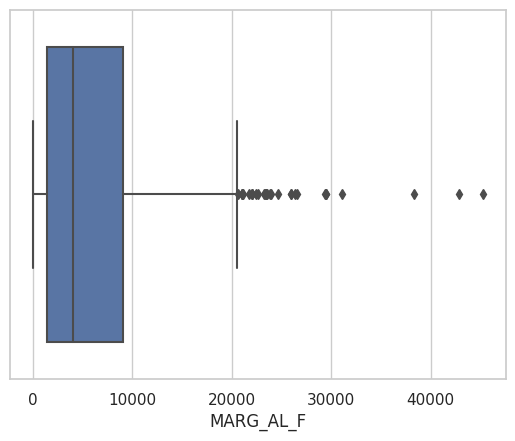

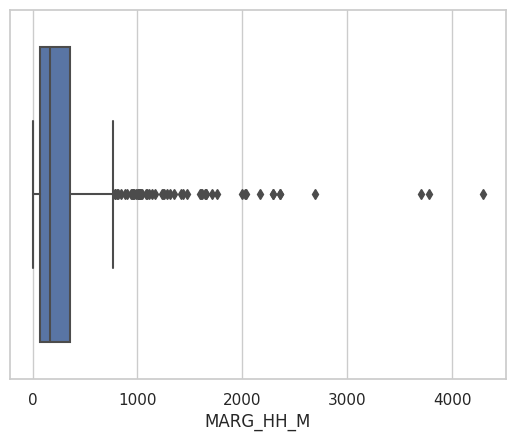

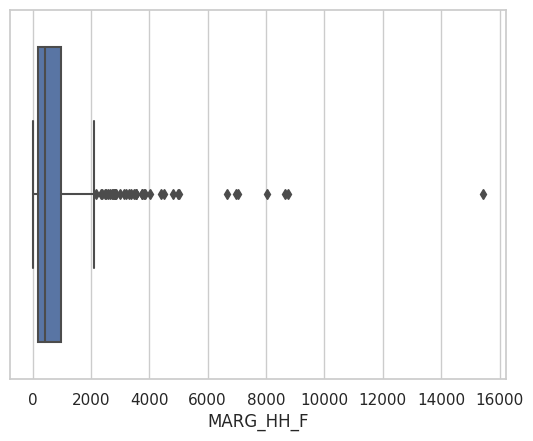

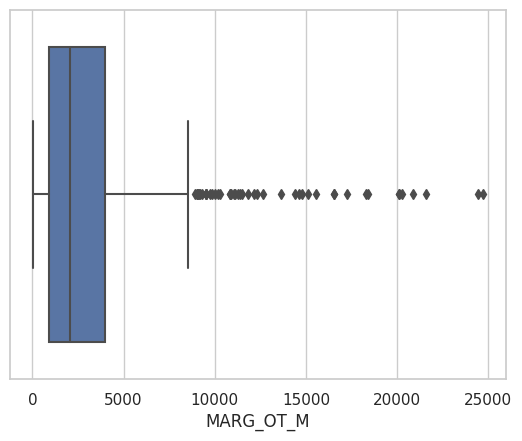

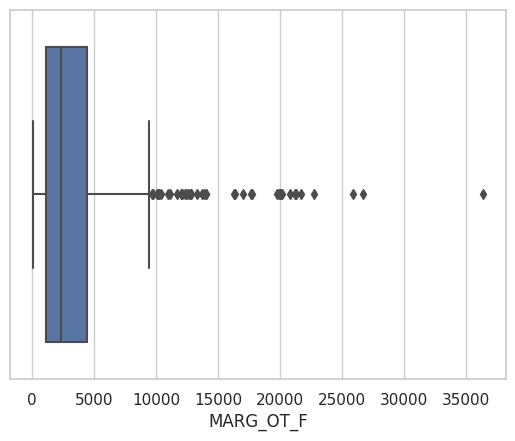

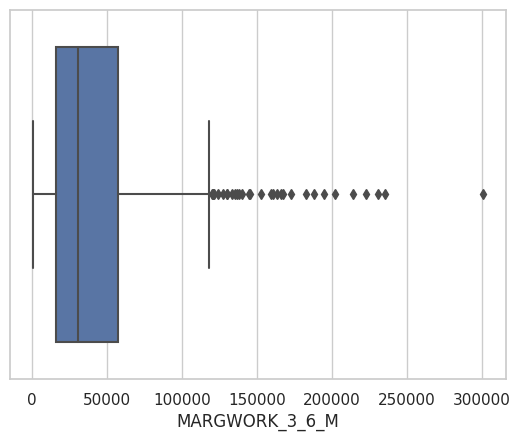

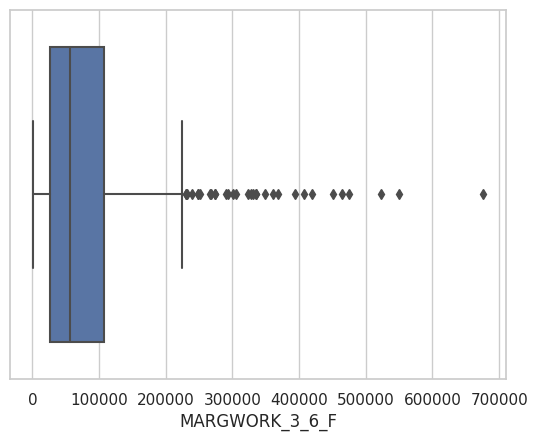

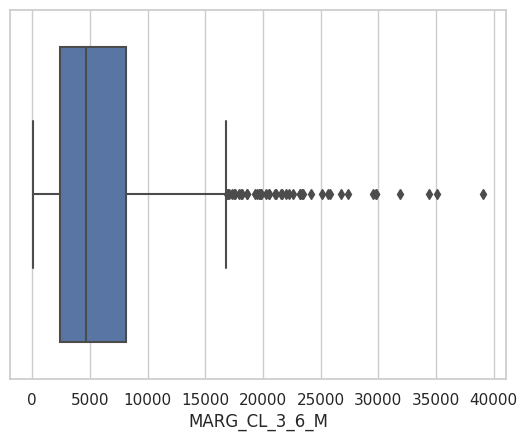

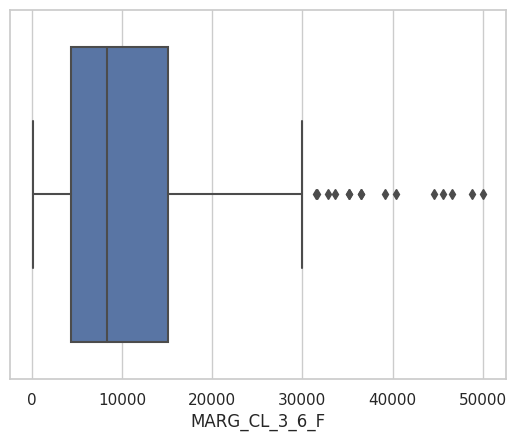

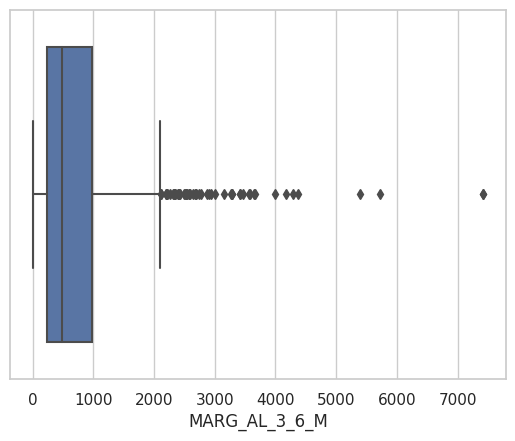

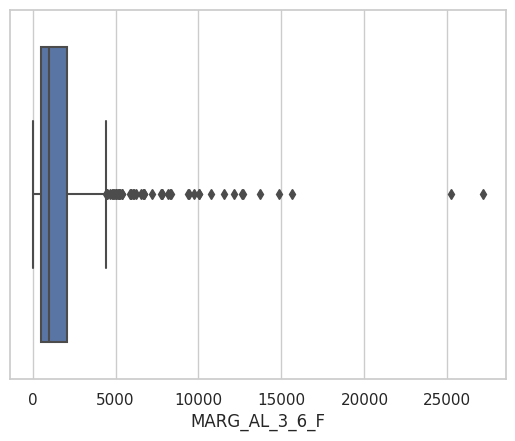

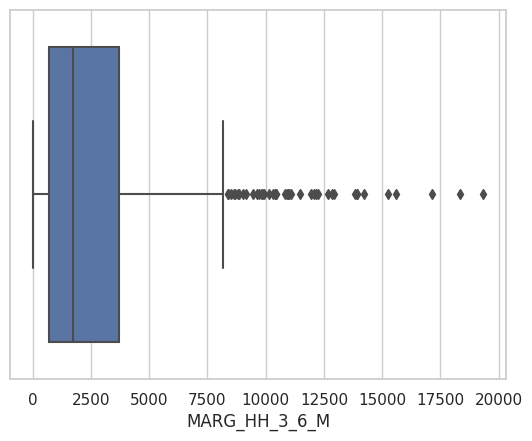

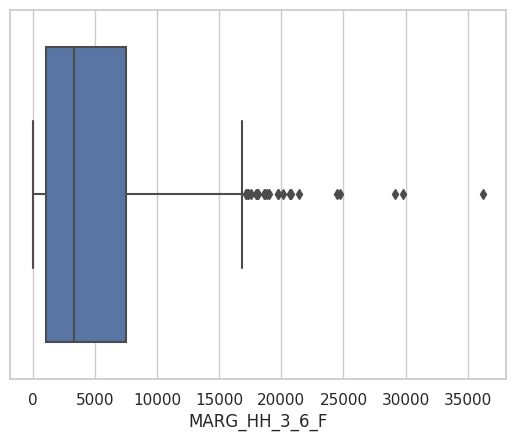

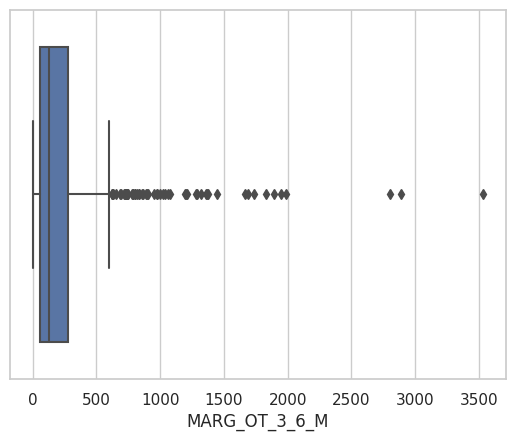

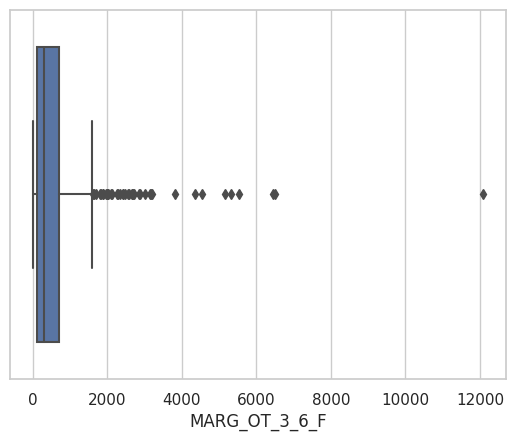

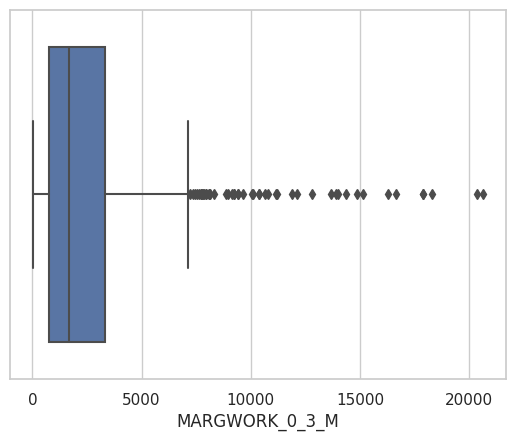

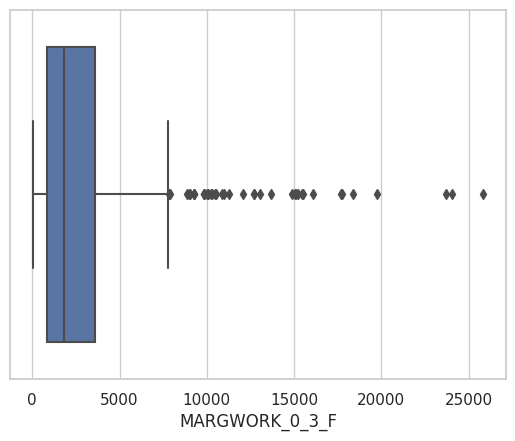

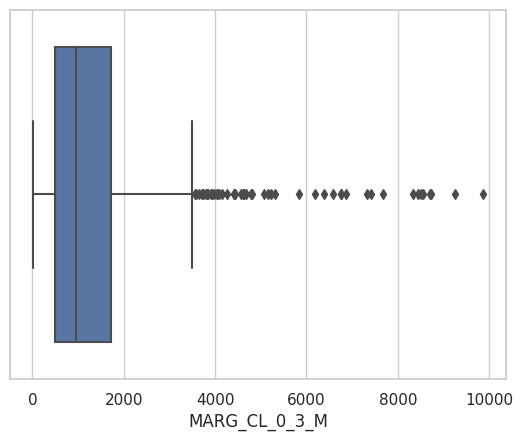

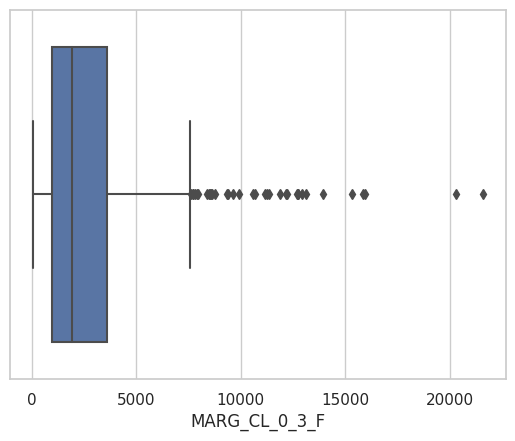

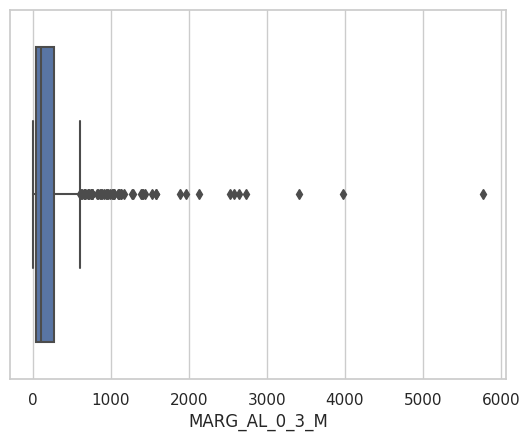

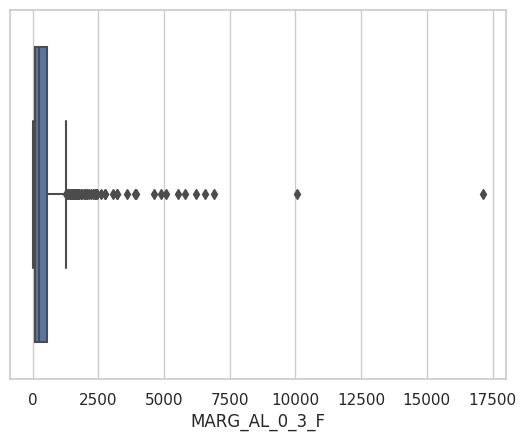

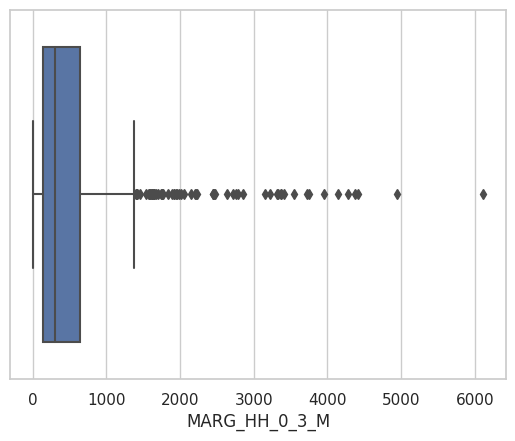

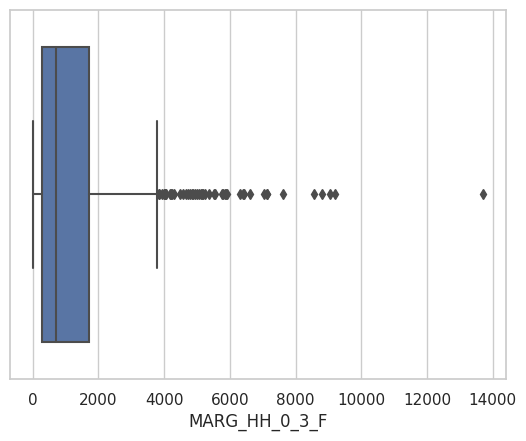

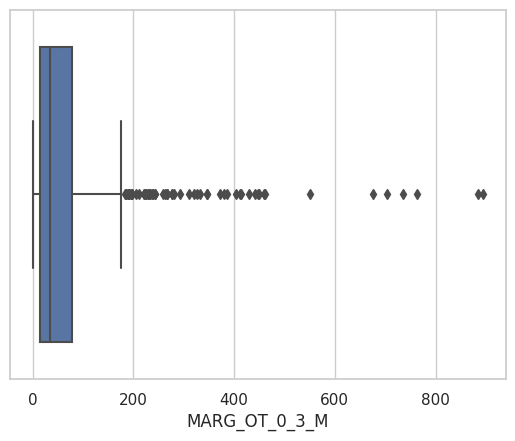

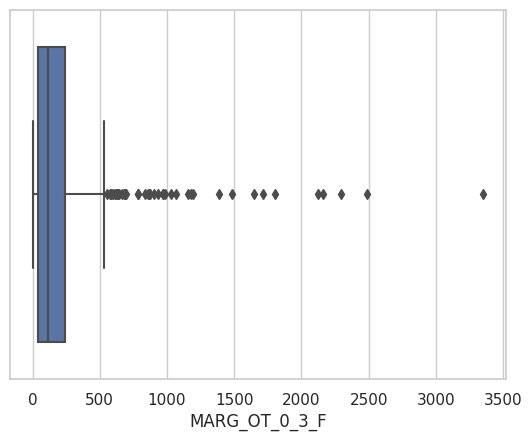

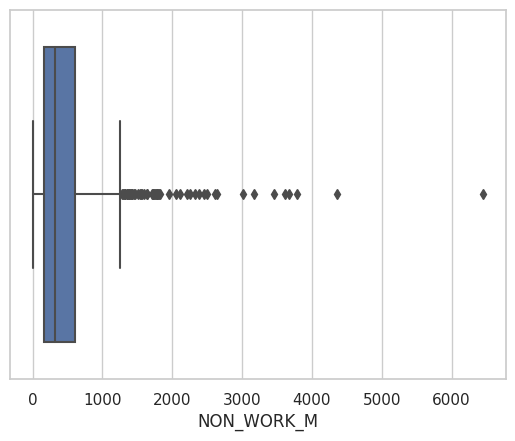

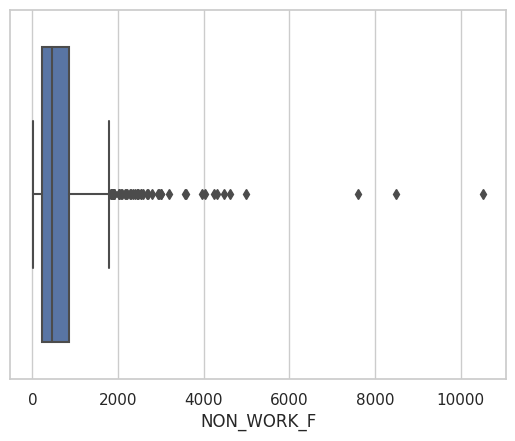

In [171]:
#Boxplots to check the outliers before scaling the data

for col in census.columns:
    sns.boxplot(x=census[col])
    plt.show()

In [20]:
# Scaling the data using Standard scaler

# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [21]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   No_HH           640 non-null    int64
 1   TOT_M           640 non-null    int64
 2   TOT_F           640 non-null    int64
 3   M_06            640 non-null    int64
 4   F_06            640 non-null    int64
 5   M_SC            640 non-null    int64
 6   F_SC            640 non-null    int64
 7   M_ST            640 non-null    int64
 8   F_ST            640 non-null    int64
 9   M_LIT           640 non-null    int64
 10  F_LIT           640 non-null    int64
 11  M_ILL           640 non-null    int64
 12  F_ILL           640 non-null    int64
 13  TOT_WORK_M      640 non-null    int64
 14  TOT_WORK_F      640 non-null    int64
 15  MAINWORK_M      640 non-null    int64
 16  MAINWORK_F      640 non-null    int64
 17  MAIN_CL_M       640 non-null    int64
 18  MAIN_CL_F       640 non-null  

In [22]:
# Identify numeric columns for scaling
numeric_columns = census.select_dtypes(include=['int64']).columns

In [24]:
# Apply Z-score scaling to numeric columns
scaler = StandardScaler()
census[numeric_columns] = scaler.fit_transform(census[numeric_columns])

In [25]:
census.describe().T

count          mean       std       min       25%       50%  \
No_HH           640.0  4.440892e-17  1.000782 -1.057697 -0.659882 -0.319887   
TOT_M           640.0 -8.881784e-17  1.000782 -1.084858 -0.677956 -0.294592   
TOT_F           640.0 -4.440892e-17  1.000782 -1.071906 -0.668250 -0.305233   
M_06            640.0 -5.551115e-17  1.000782 -1.066236 -0.659189 -0.274114   
F_06            640.0  6.661338e-17  1.000782 -1.050264 -0.642376 -0.289756   
M_SC            640.0  5.551115e-18  1.000782 -0.958783 -0.718323 -0.293404   
F_SC            640.0 -5.551115e-17  1.000782 -0.957049 -0.698964 -0.325615   
M_ST            640.0 -4.440892e-17  1.000782 -0.625124 -0.595467 -0.389534   
F_ST            640.0 -2.220446e-17  1.000782 -0.640197 -0.613122 -0.398476   
M_LIT           640.0 -4.440892e-17  1.000782 -1.032495 -0.656385 -0.273410   
F_LIT           640.0  0.000000e+00  1.000782 -0.880091 -0.605869 -0.300924   
M_ILL           640.0  3.885781e-17  1.000782 -1.103860 -0.675544 -0.313229   
F_ILL           640.0 -4.440892e-17  1.000782 -1.182788 -0.714648 -0.289434   
TOT_WORK_M      640.0 -4.440892e-17  1.000782 -1.041256 -0.666067 -0.276329   
TOT_WORK_F      640.0 -8.881784e-17  1.000782 -1.101591 -0.678035 -0.288114   
MAINWORK_M      640.0 -2.220446e-17  1.000782 -0.958137 -0.649073 -0.284647   
MAINWORK_F      640.0  4.440892e-17  1.000782 -0.932745 -0.623743 -0.324100   
MAIN_CL_M       640.0 -8.881784e-17  1.000782 -1.145474 -0.718165 -0.266889   
MAIN_CL_F       640.0 -1.110223e-17  1.000782 -1.030785 -0.669985 -0.296408   
MAIN_AL_M       640.0  0.000000e+00  1.000782 -0.914709 -0.747338 -0.299102   
MAIN_AL_F       640.0  4.440892e-17  1.000782 -0.694401 -0.584807 -0.388393   
MAIN_HH_M       640.0  1.665335e-17  1.000782 -0.691816 -0.545061 -0.301644   
MAIN_HH_F       640.0  0.000000e+00  1.000782 -0.434625 -0.356326 -0.264492   
MAIN_OT_M       640.0  0.000000e+00  1.000782 -0.691455 -0.539371 -0.324365   
MAIN_OT_F       640.0 -4.440892e-17  1.000782 -0.646347 -0.488651 -0.317847   
MARGWORK_M      640.0 -1.665335e-17  1.000782 -1.046990 -0.655025 -0.291825   
MARGWORK_F      640.0  2.220446e-17  1.000782 -1.181294 -0.698262 -0.265922   
MARG_CL_M       640.0  0.000000e+00  1.000782 -0.794140 -0.556257 -0.331347   
MARG_CL_F       640.0 -5.551115e-17  1.000782 -0.647891 -0.470946 -0.303687   
MARG_AL_M       640.0  1.110223e-17  1.000782 -0.874484 -0.643314 -0.328780   
MARG_AL_F       640.0  2.220446e-17  1.000782 -0.954894 -0.747687 -0.360900   
MARG_HH_M       640.0 -5.551115e-18  1.000782 -0.685144 -0.529942 -0.326070   
MARG_HH_F       640.0  1.110223e-17  1.000782 -0.656736 -0.513346 -0.298574   
MARG_OT_M       640.0  1.110223e-17  1.000782 -0.864853 -0.607407 -0.302269   
MARG_OT_F       640.0 -4.440892e-17  1.000782 -0.856115 -0.600094 -0.289356   
MARGWORK_3_6_M  640.0  7.216450e-17  1.000782 -1.067727 -0.659748 -0.298173   
MARGWORK_3_6_F  640.0 -2.220446e-17  1.000782 -0.973823 -0.656854 -0.292903   
MARG_CL_3_6_M   640.0 -2.220446e-17  1.000782 -1.058667 -0.668815 -0.293426   
MARG_CL_3_6_F   640.0 -8.881784e-17  1.000782 -1.212036 -0.707773 -0.241685   
MARG_AL_3_6_M   640.0 -4.440892e-17  1.000782 -0.872827 -0.612586 -0.341847   
MARG_AL_3_6_F   640.0  4.440892e-17  1.000782 -0.701351 -0.502020 -0.306297   
MARG_HH_3_6_M   640.0 -7.216450e-17  1.000782 -0.897436 -0.662335 -0.336627   
MARG_HH_3_6_F   640.0 -6.661338e-17  1.000782 -0.969686 -0.760784 -0.351845   
MARG_OT_3_6_M   640.0 -5.551115e-18  1.000782 -0.684513 -0.522705 -0.323234   
MARG_OT_3_6_F   640.0  3.330669e-17  1.000782 -0.651473 -0.509422 -0.295094   
MARGWORK_0_3_M  640.0  0.000000e+00  1.000782 -0.859800 -0.613309 -0.307996   
MARGWORK_0_3_F  640.0  0.000000e+00  1.000782 -0.848224 -0.601775 -0.300744   
MARG_CL_0_3_M   640.0 -2.775558e-17  1.000782 -0.933110 -0.606952 -0.298260   
MARG_CL_0_3_F   640.0 -5.551115e-17  1.000782 -0.978631 -0.645877 -0.297513   
MARG_AL_0_3_M   640.0  2.220446e-17  1.000782 -0.553861 -0.450104 

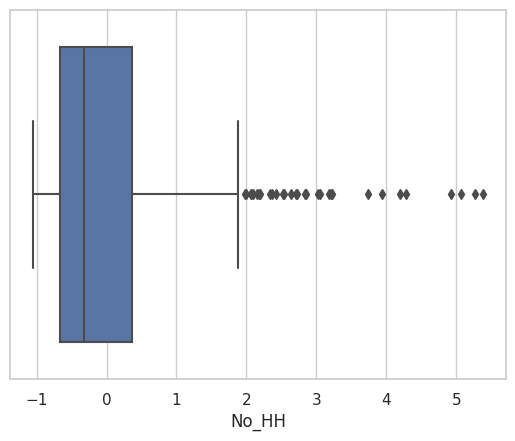

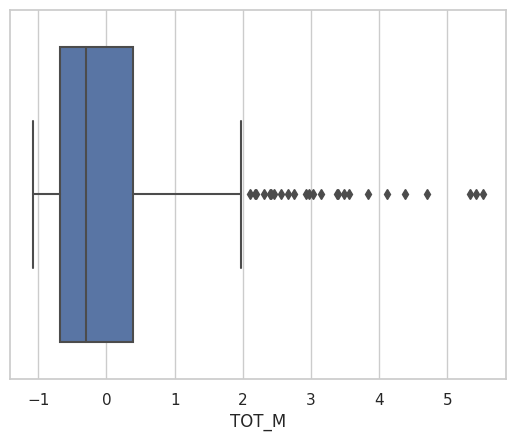

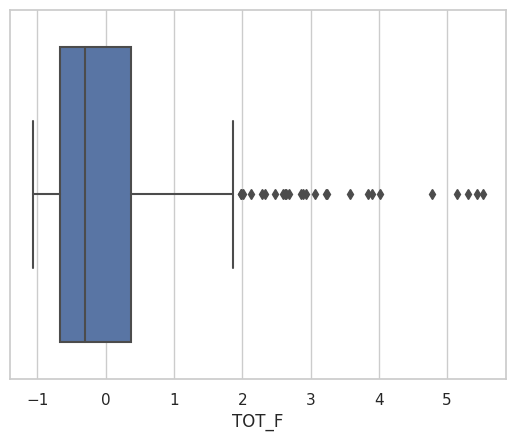

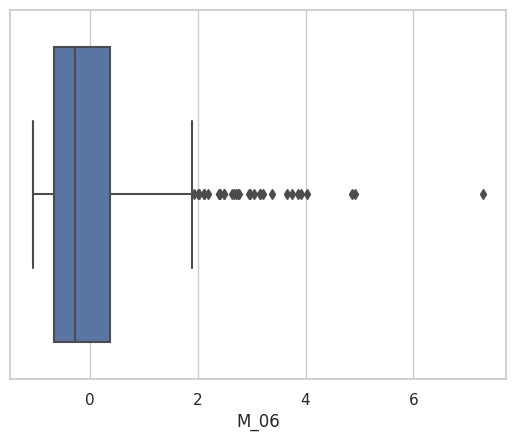

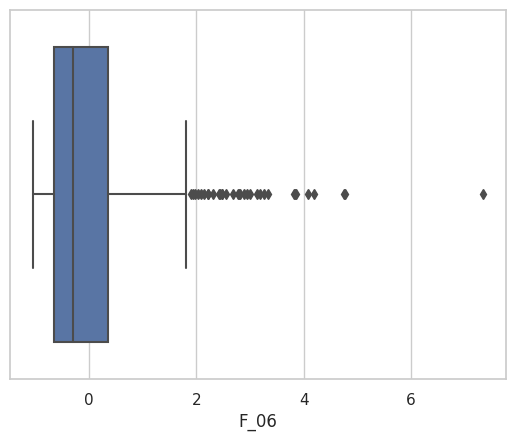

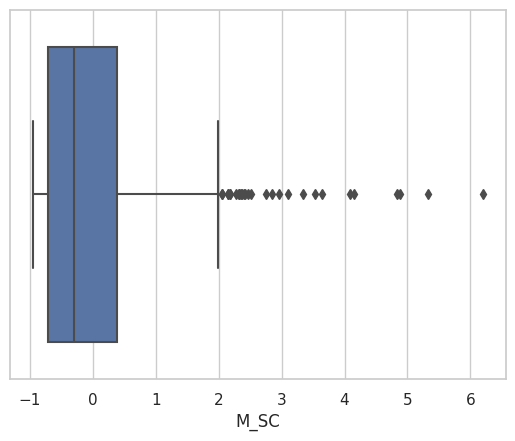

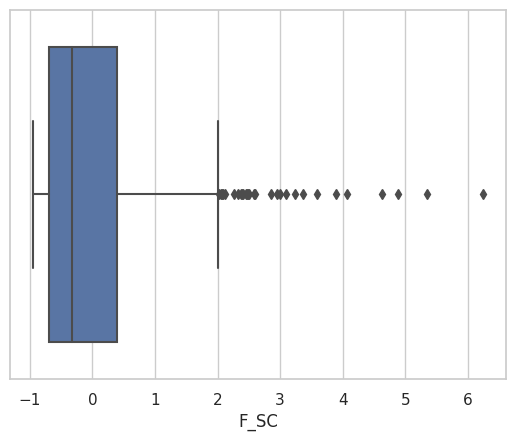

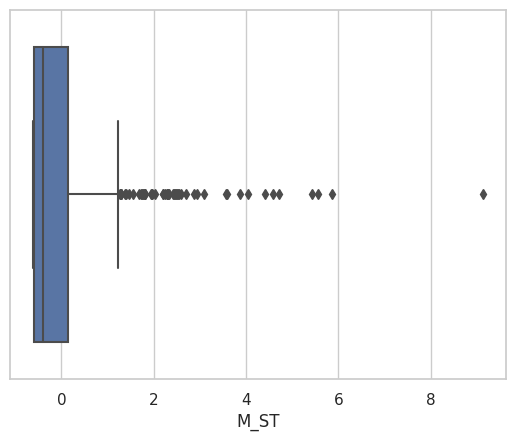

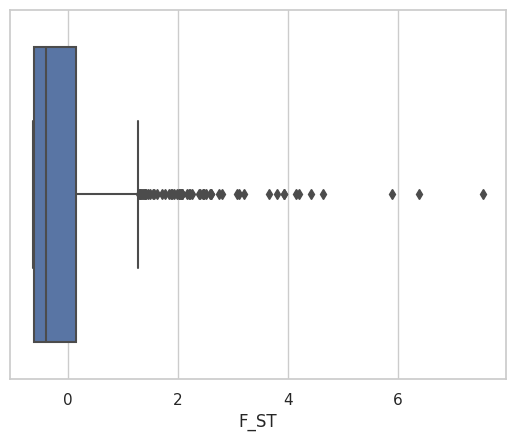

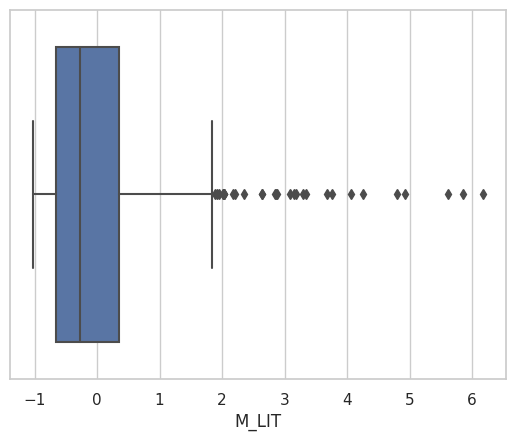

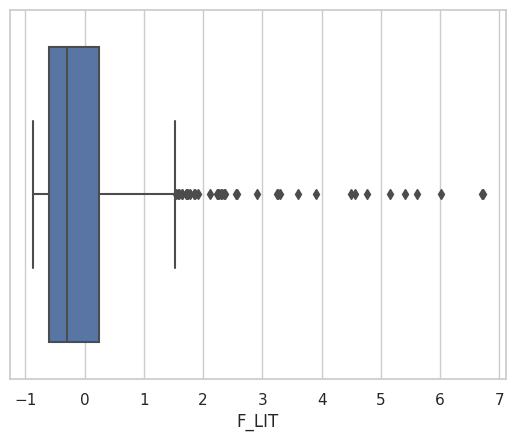

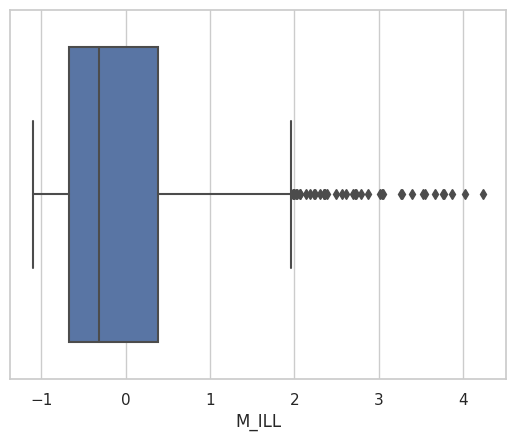

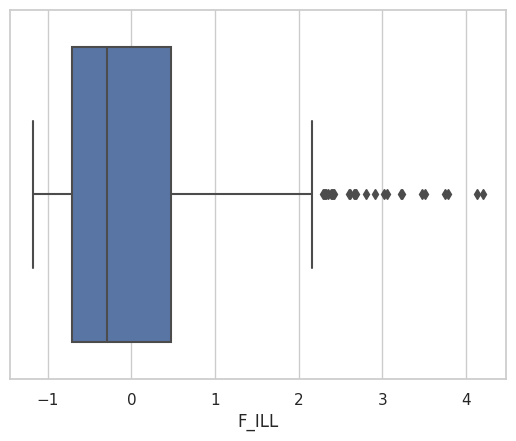

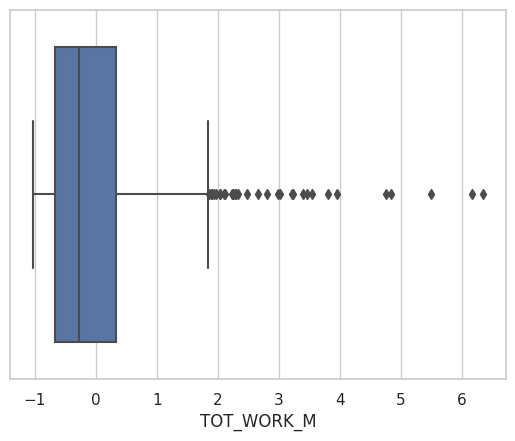

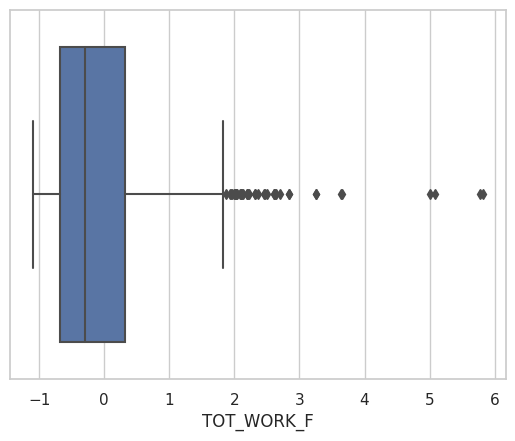

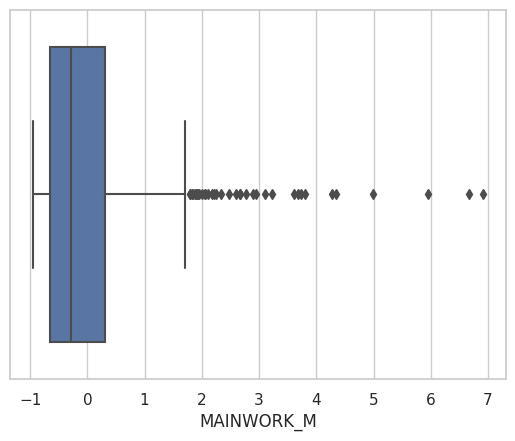

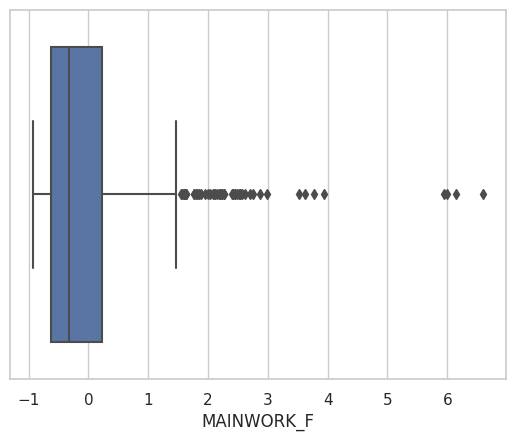

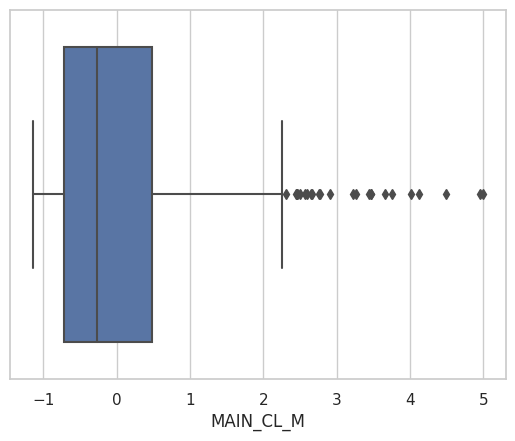

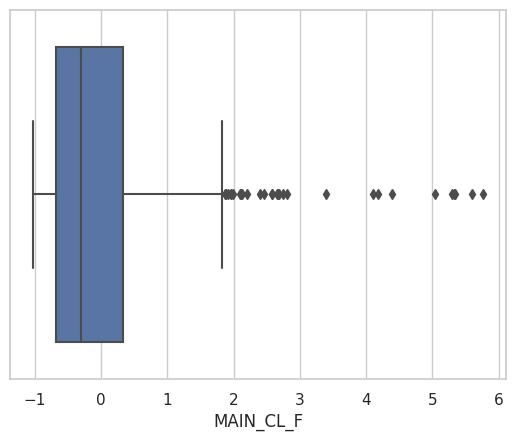

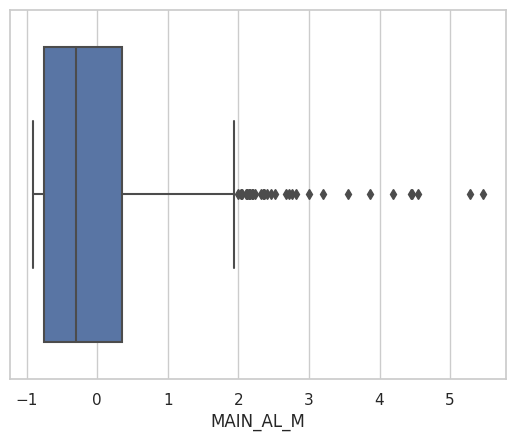

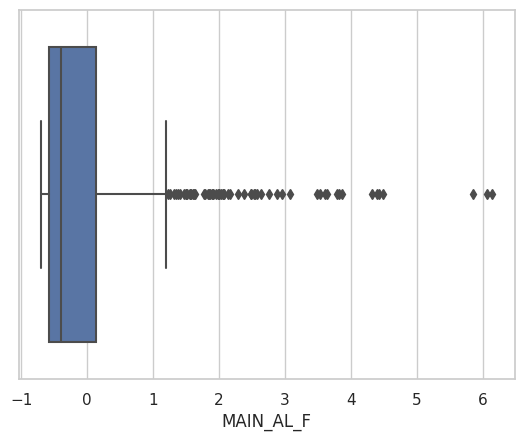

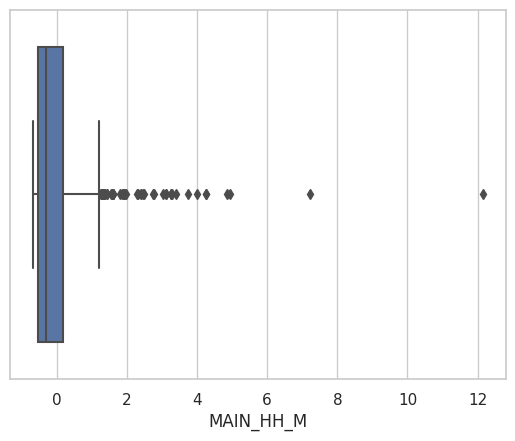

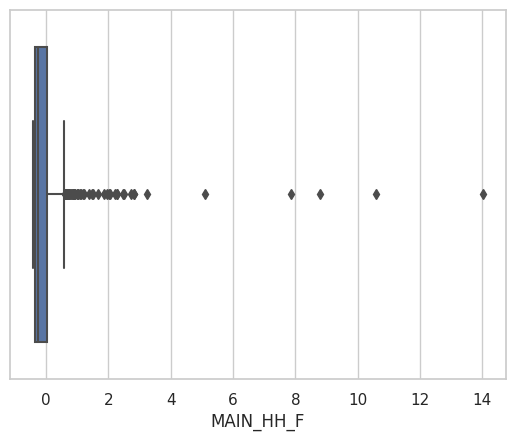

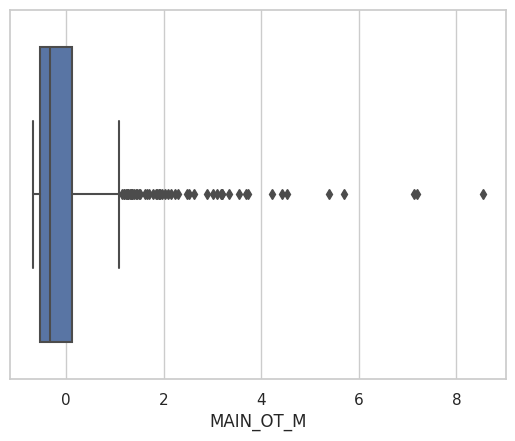

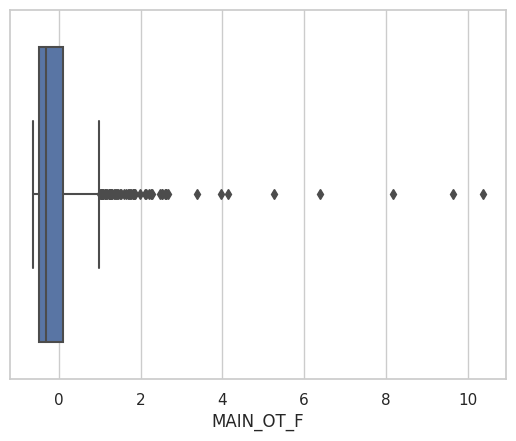

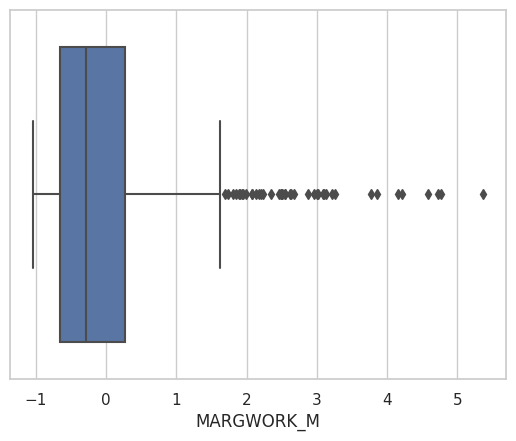

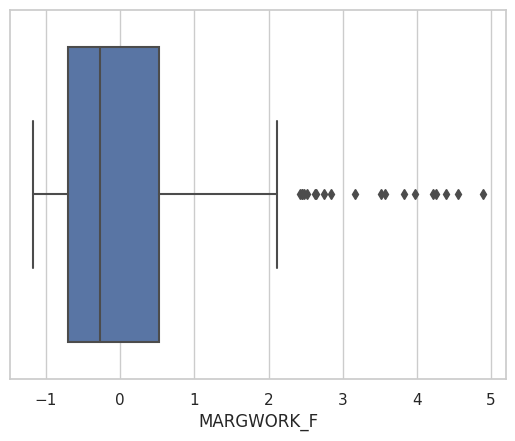

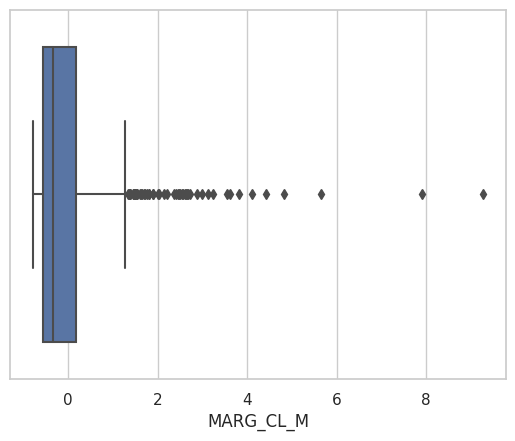

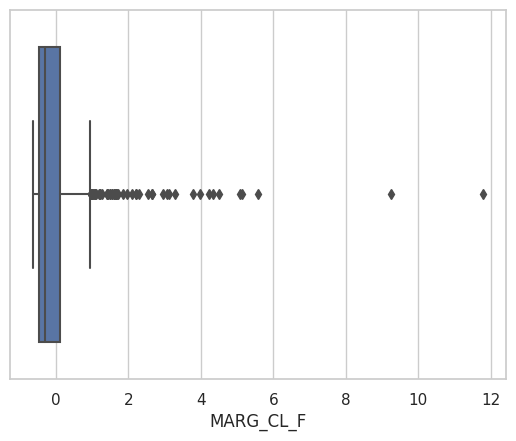

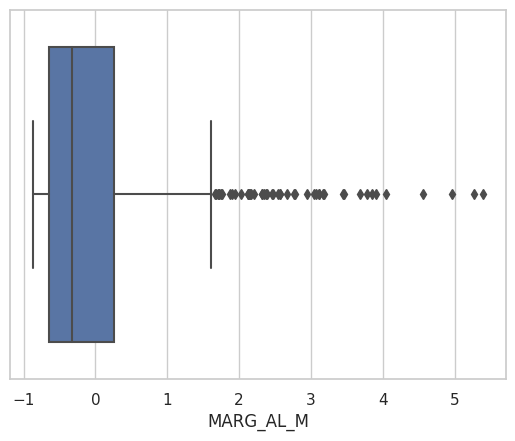

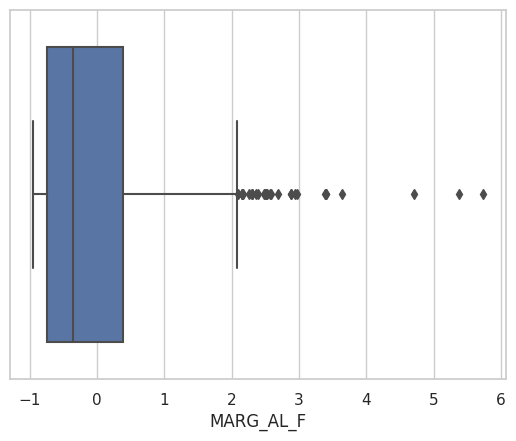

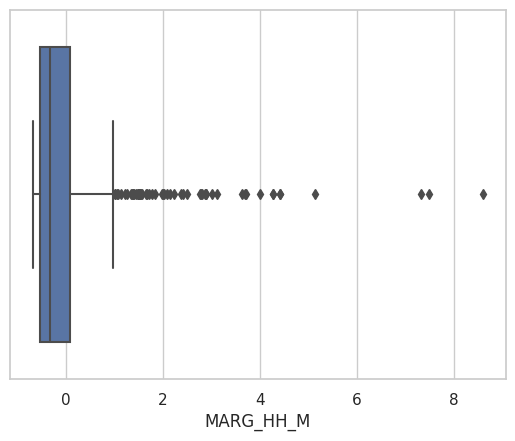

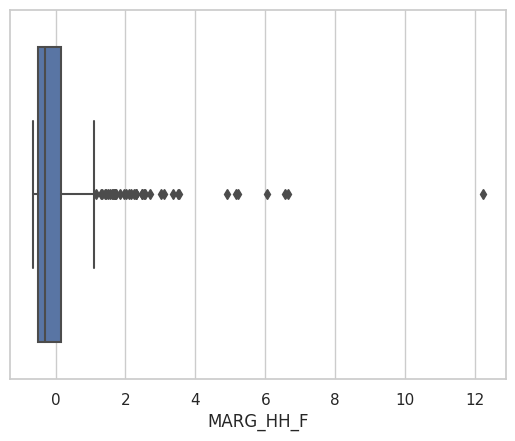

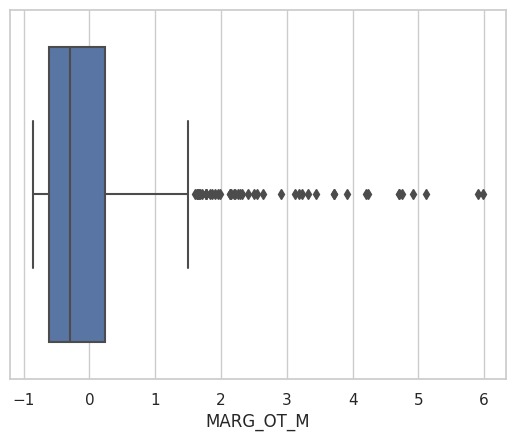

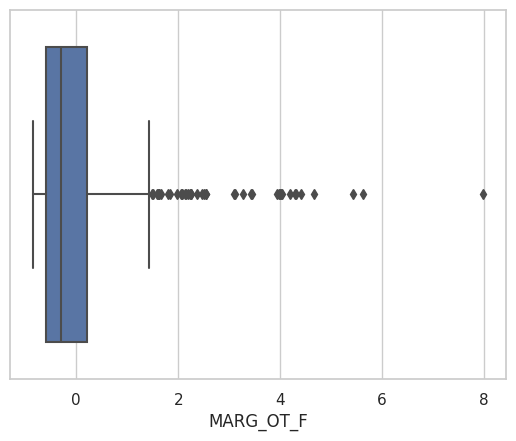

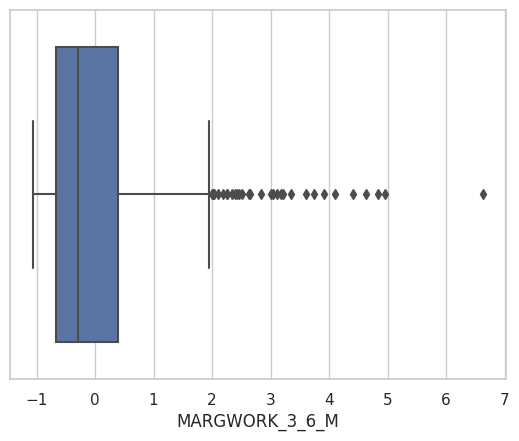

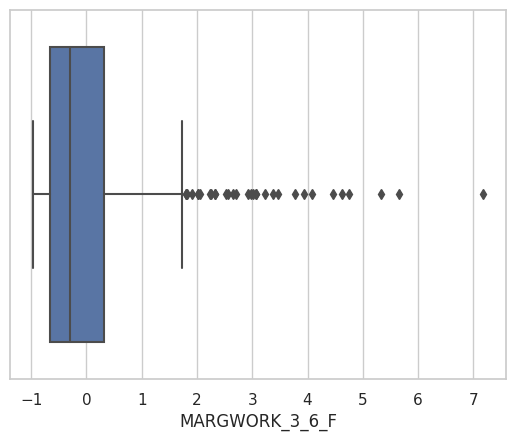

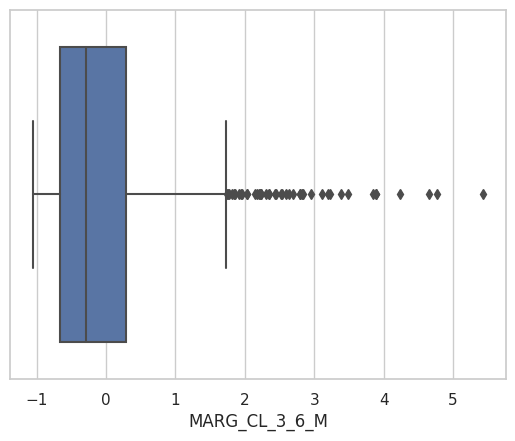

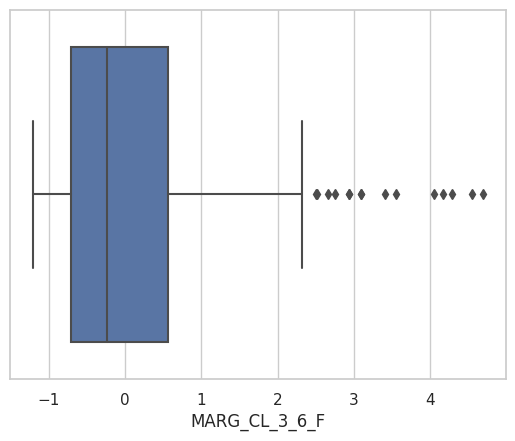

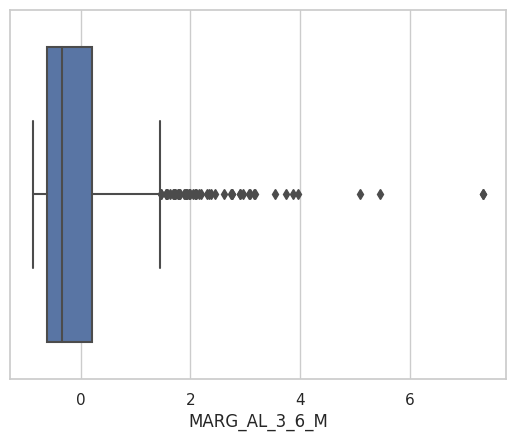

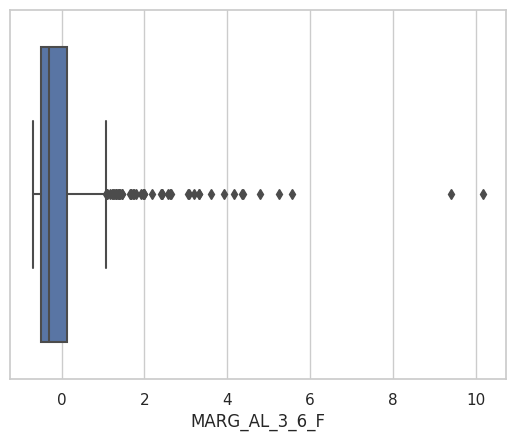

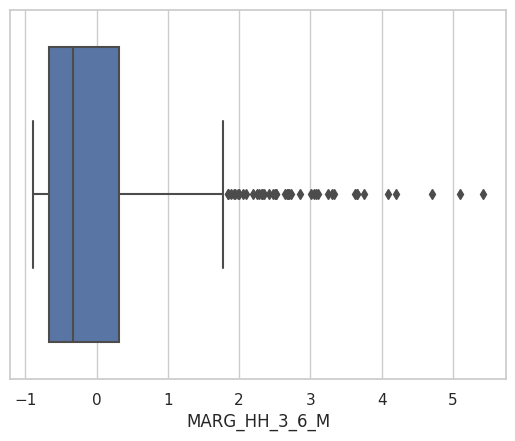

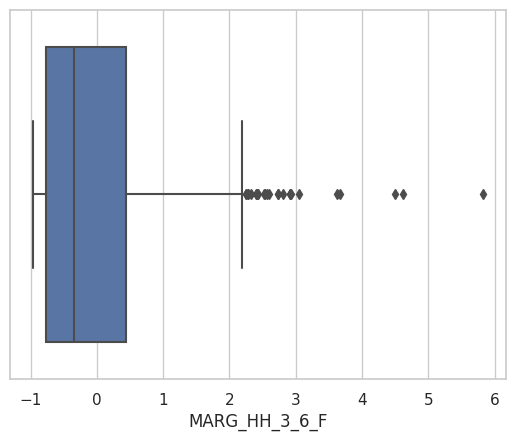

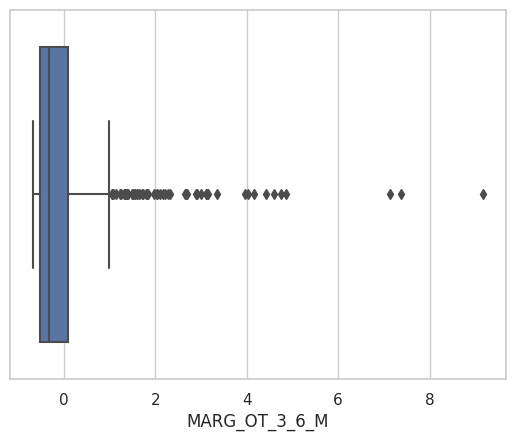

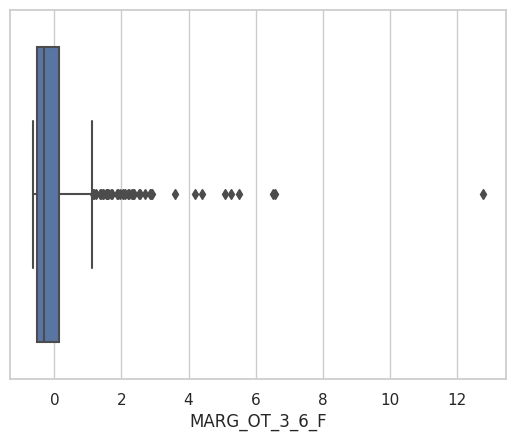

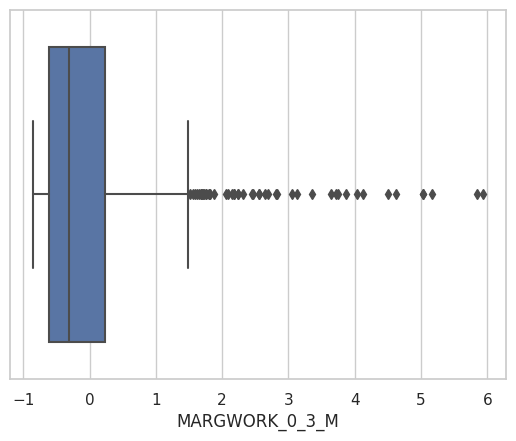

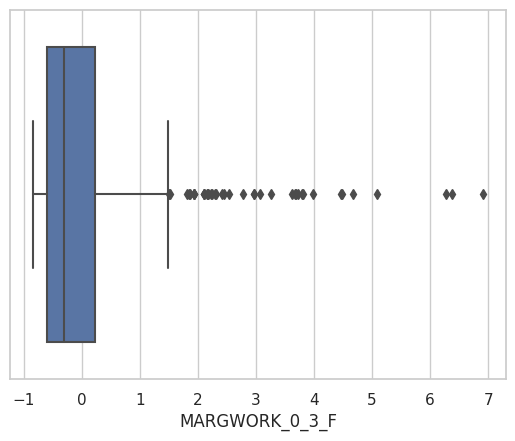

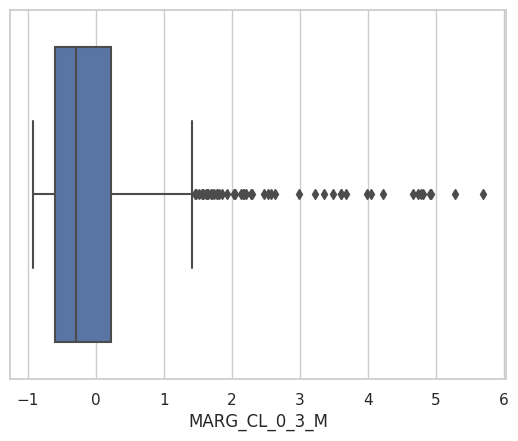

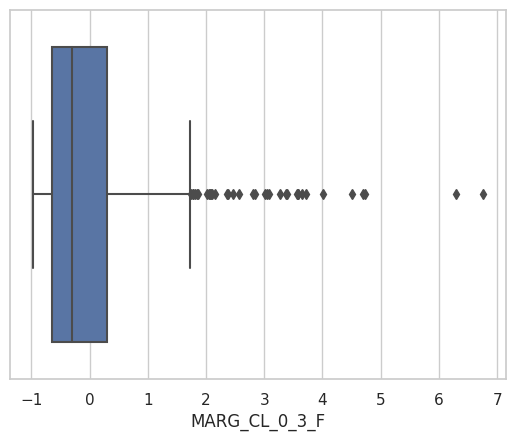

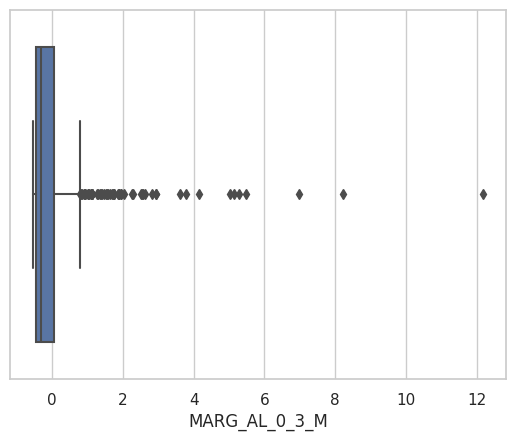

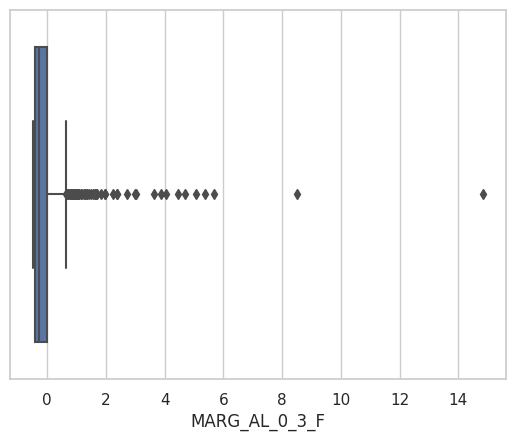

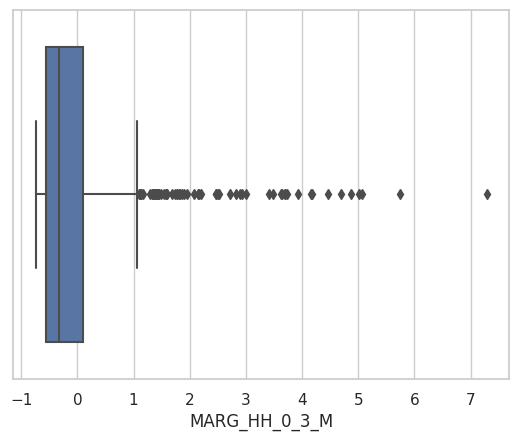

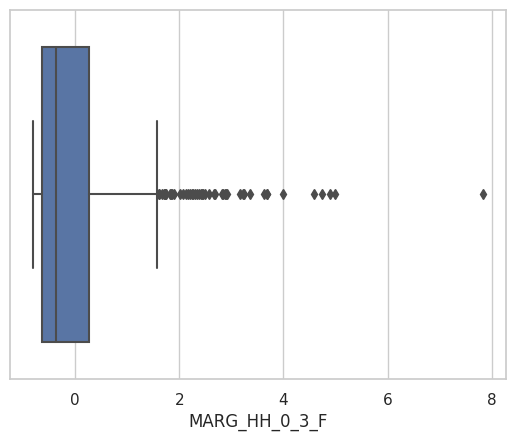

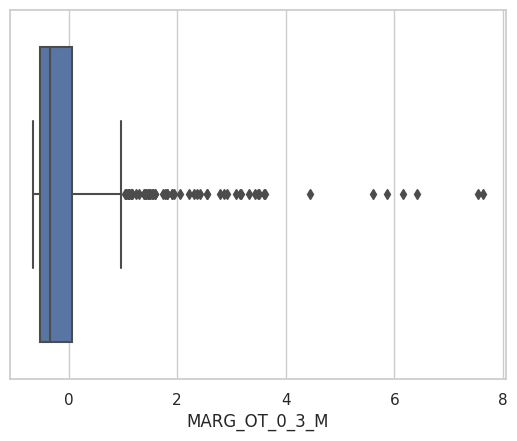

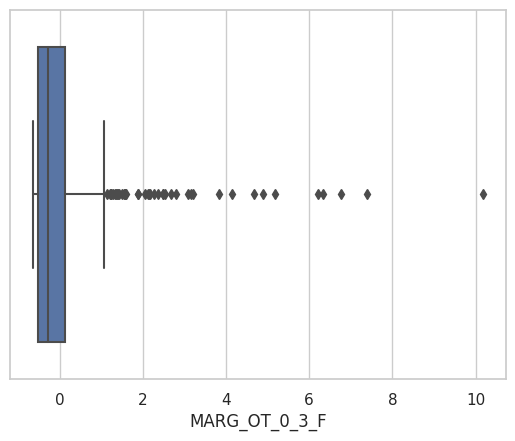

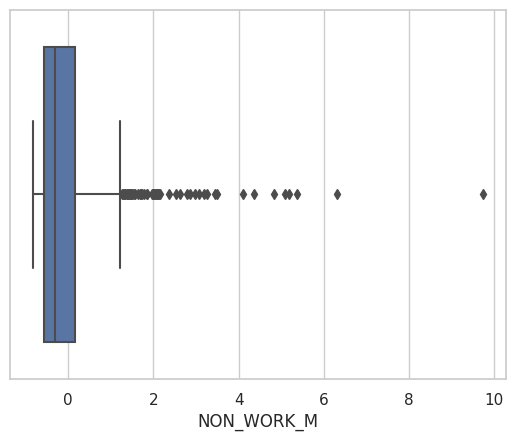

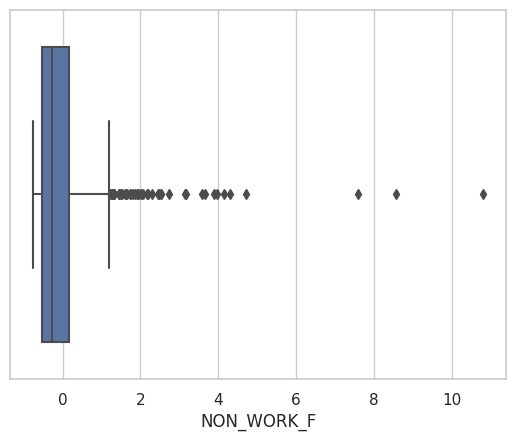

In [179]:
#Boxplots to check the outliers after scaling the data

for col in census.columns:
    sns.boxplot(x=census[col])
    plt.show()

So, we can clearly see that scaling have no impact on outliers.

**Part 2; PCA: PCA**

Create the covariance matrix - Get eigen values and eigen vectors - Identify the optimum number of PCs - Show Scree plot - Compare PCs with Actual Columns and identify which is explaining most variance - Write inferences about all the PCs in terms of actual variables - Write linear equation for first PC Note: For the scope of this project, take at least 90% explained variance.

In [26]:
#Check the number of features
len(census.columns)

57

In [61]:
# Caculate the covariance matric
cov_matrix=census.cov()
cov_matrix

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC  \
No_HH           1.001565  0.917604  0.972109  0.798807  0.797619  0.776522   
TOT_M           0.917604  1.001565  0.984178  0.952313  0.949275  0.841240   
TOT_F           0.972109  0.984178  1.001565  0.909396  0.907975  0.818238   
M_06            0.798807  0.952313  0.909396  1.001565  0.999713  0.782342   
F_06            0.797619  0.949275  0.907975  0.999713  1.001565  0.774345   
M_SC            0.776522  0.841240  0.818238  0.782342  0.774345  1.001565   
F_SC            0.825137  0.827592  0.834059  0.748700  0.742846  0.986612   
M_ST            0.149861  0.091565  0.123819  0.055361  0.065240 -0.045738   
F_ST            0.165361  0.086315  0.128848  0.044017  0.054748 -0.047900   
M_LIT           0.933397  0.990860  0.986983  0.914186  0.909062  0.819765   
F_LIT           0.929539  0.933166  0.958510  0.833812  0.830425  0.715056   
M_ILL           0.764235  0.912965  0.859542  0.946889  0.950093  0.802028   
F_ILL           0.863423  0.886746  0.888305  0.864675  0.866643  0.834017   
TOT_WORK_M      0.939667  0.971936  0.970471  0.857112  0.854127  0.826064   
TOT_WORK_F      0.926707  0.809159  0.877604  0.684563  0.686421  0.714087   
MAINWORK_M      0.928079  0.934292  0.942489  0.790929  0.786017  0.779710   
MAINWORK_F      0.892700  0.745533  0.824110  0.585895  0.586599  0.645150   
MAIN_CL_M       0.432077  0.532567  0.488420  0.562042  0.562478  0.609108   
MAIN_CL_F       0.383279  0.356444  0.385976  0.382592  0.383896  0.361363   
MAIN_AL_M       0.674692  0.594348  0.624700  0.550718  0.555049  0.626545   
MAIN_AL_F       0.586772  0.380342  0.473488  0.296713  0.298852  0.408808   
MAIN_HH_M       0.642379  0.741512  0.702053  0.660794  0.658440  0.706755   
MAIN_HH_F       0.491676  0.444206  0.467029  0.355282  0.357689  0.393270   
MAIN_OT_M       0.845082  0.849178  0.861587  0.685361  0.678402  0.642387   
MAIN_OT_F       0.823643  0.746408  0.795377  0.558260  0.557153  0.575538   
MARGWORK_M      0.675430  0.807617  0.765600  0.852332  0.858531  0.747406   
MARGWORK_F      0.699039  0.702938  0.720077  0.717021  0.721382  0.655229   
MARG_CL_M       0.169020  0.302005  0.260173  0.419431  0.418708  0.301918   
MARG_CL_F       0.080730  0.152087  0.135981  0.240181  0.232904  0.154340   
MARG_AL_M       0.437790  0.543098  0.502354  0.640898  0.652943  0.563673   
MARG_AL_F       0.489923  0.447527  0.475445  0.488376  0.497388  0.464262   
MARG_HH_M       0.503010  0.668012  0.607209  0.697883  0.704895  0.670563   
MARG_HH_F       0.539104  0.580605  0.566113  0.543244  0.551702  0.571073   
MARG_OT_M       0.802225  0.893826  0.873239  0.836672  0.836144  0.748348   
MARG_OT_F       0.834539  0.840844  0.858860  0.745810  0.746470  0.686633   
MARGWORK_3_6_M  0.848134  0.975838  0.944526  0.990372  0.987446  0.810574   
MARGWORK_3_6_F  0.915577  0.984795  0.977919  0.938257  0.935479  0.800211   
MARG_CL_3_6_M   0.693460  0.821152  0.780075  0.860758  0.867645  0.753144   
MARG_CL_3_6_F   0.724568  0.716386  0.737570  0.717752  0.722480  0.663042   
MARG_AL_3_6_M   0.210971  0.353435  0.307213  0.473722  0.476688  0.344822   
MARG_AL_3_6_F   0.094585  0.165331  0.149572  0.254007  0.247548  0.162194   
MARG_HH_3_6_M   0.449083  0.547453  0.508308  0.642079  0.654351  0.566013   
MARG_HH_3_6_F   0.497753  0.437111  0.471729  0.467039  0.475737  0.451947   
MARG_OT_3_6_M   0.502114  0.665259  0.604250  0.692036  0.698659  0.664538   
MARG_OT_3_6_F   0.532971  0.570553  0.556880  0.528773  0.536886  0.556736   
MARGWORK_0_3_M  0.799911  0.892162  0.871167  0.836305  0.835925  0.741313   
MARGWORK_0_3_F  0.830450  0.843625  0.857543  0.743890  0.744626  0.690197   
MARG_CL_0_3_M   0.557813  0.699403  0.656373  0.761800  0.764809  0.674687   
MARG_CL_0_3_F   0.556412  0.596628  0.599888  0.648011  0.650851  0.570470   
MARG_AL_0_3_M   0.067531  0.167666  0.138980  0.267091  0.259074  0.184620   
MARG_AL_0_3_F   0.046200  0.115761  0.099

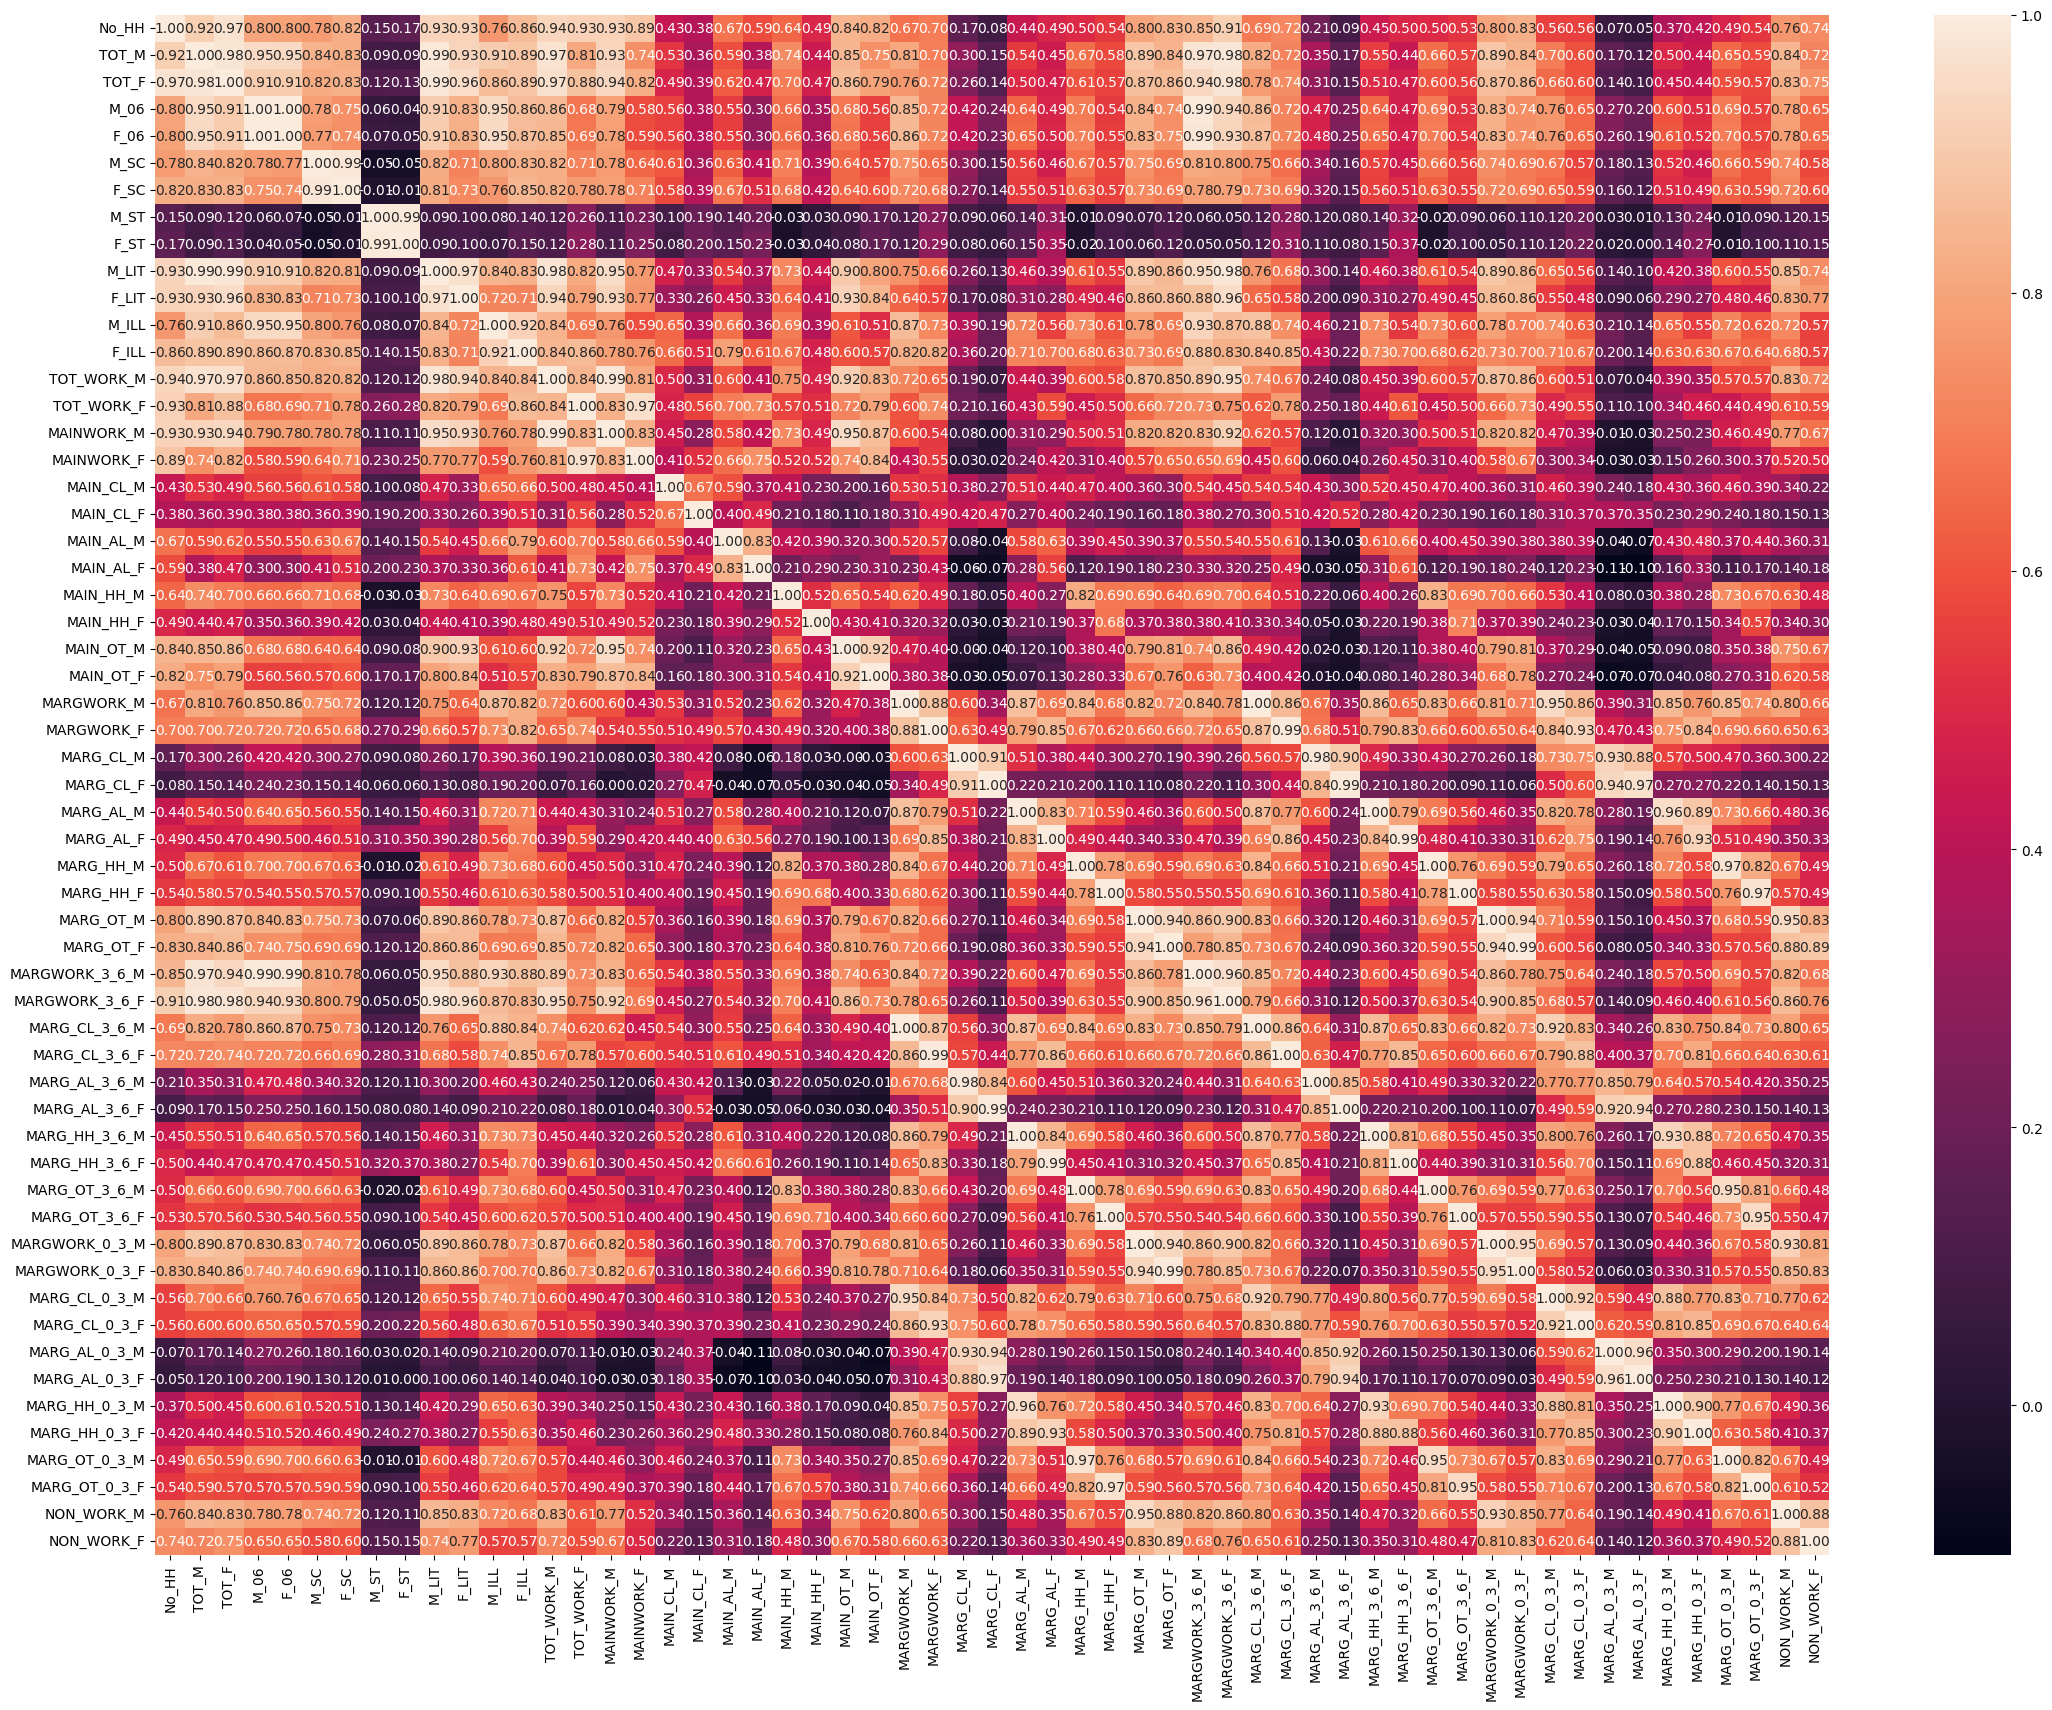

In [29]:
#Check for presence of correlations
plt.figure(figsize = (27,20))
sns.heatmap(census.corr(), annot=True,fmt='.2f');

In [30]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
pca_transformed = pca.fit_transform(census)

In [31]:
#Extract eigen vectors
pca.components_

array([[ 1.56020579e-01,  1.67117635e-01,  1.65553179e-01,
         1.62192948e-01,  1.62566396e-01,  1.51357849e-01,
         1.51566500e-01,  2.72341946e-02,  2.81833150e-02,
         1.61992837e-01,  1.46872680e-01,  1.61749445e-01,
         1.65248187e-01,  1.59871988e-01,  1.45935804e-01,
         1.46200730e-01,  1.23970284e-01,  1.03127159e-01,
         7.45397856e-02,  1.13355712e-01,  7.38821590e-02,
         1.31572584e-01,  8.33826397e-02,  1.23526242e-01,
         1.11021264e-01,  1.64615479e-01,  1.55395618e-01,
         8.23885414e-02,  4.91953957e-02,  1.28598563e-01,
         1.14305073e-01,  1.40853227e-01,  1.27669598e-01,
         1.55262872e-01,  1.47286584e-01,  1.64971950e-01,
         1.61253433e-01,  1.65501611e-01,  1.55647049e-01,
         9.30142064e-02,  5.15358640e-02,  1.28576116e-01,
         1.10645843e-01,  1.39592763e-01,  1.24545909e-01,
         1.54293786e-01,  1.46285654e-01,  1.50125706e-01,
         1.40157047e-01,  5.25417829e-02,  4.17859530e-0

Now we have a reduced dimensions of 12 from 57 dimensions.

In [32]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([31.81356474,  7.86942415,  4.15340812,  3.66879058,  2.20652588,
        1.93827502,  1.17617374,  0.75115909,  0.61705374,  0.52830089,
        0.42983119,  0.3534402 ])

In [34]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.55726063, 0.13784435, 0.07275295, 0.06426418, 0.03865049,
       0.03395169, 0.02060239, 0.01315764, 0.01080859, 0.00925395,
       0.00752912, 0.00619102])

In [63]:
# Step 2: Obtaining the Cumulative Sum of the Expalained Variance
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [55.73 69.51 76.79 83.21 87.08 90.47 92.53]


1. We can see that around 83% of the variance is explained by 4 Principal Components.
2. Around 90.47% of variance is explained by 6 Principal Components and,
3. Around 92.53% of variance is explained by 7 Principal Components

In [65]:
#Create a dataframe containing the loadings or coefficients of all PCs
census_extracted_loadings = pd.DataFrame(pca.components_.T,
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7'],
                                    index = census.columns)

In [66]:
census_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
No_HH           0.156021 -0.126347 -0.002690 -0.125293 -0.007022  0.004083   
TOT_M           0.167118 -0.089677  0.056698 -0.019942 -0.033026 -0.073389   
TOT_F           0.165553 -0.104912  0.038749 -0.070873 -0.012847 -0.043647   
M_06            0.162193 -0.022095  0.057788  0.011917 -0.050248 -0.157957   
F_06            0.162566 -0.020271  0.050126  0.014844 -0.043848 -0.154436   
M_SC            0.151358 -0.045111  0.002569  0.012485 -0.173007 -0.064295   
F_SC            0.151567 -0.051924 -0.025101 -0.029893 -0.159803 -0.040518   
M_ST            0.027234  0.027679 -0.123504 -0.222247  0.433163  0.222591   
F_ST            0.028183  0.030223 -0.139769 -0.229754  0.438792  0.225531   
M_LIT           0.161993 -0.115355  0.082168 -0.035163 -0.009101 -0.055465   
F_LIT           0.146873 -0.153109  0.117098 -0.059559  0.055844 -0.048021   
M_ILL           0.161749 -0.006625 -0.021855  0.025348 -0.096580 -0.115234   
F_ILL           0.165248 -0.009107 -0.093062 -0.076023 -0.119910 -0.028757   
TOT_WORK_M      0.159872 -0.133529  0.045176 -0.040154 -0.019553 -0.001801   
TOT_WORK_F      0.145936 -0.085087 -0.059450 -0.225160 -0.040437  0.105162   
MAINWORK_M      0.146201 -0.176368  0.054295 -0.068351 -0.036802  0.019283   
MAINWORK_F      0.123970 -0.151413 -0.055609 -0.246640 -0.082834  0.123832   
MAIN_CL_M       0.103127  0.062415 -0.067399 -0.089769 -0.286039 -0.006170   
MAIN_CL_F       0.074540  0.086477 -0.009238 -0.288965 -0.241936  0.102951   
MAIN_AL_M       0.113356 -0.031040 -0.247917 -0.136082 -0.205724 -0.031068   
MAIN_AL_F       0.073882 -0.058688 -0.251932 -0.290042 -0.177605  0.019240   
MAIN_HH_M       0.131573 -0.076021  0.026569  0.152366 -0.134089  0.174465   
MAIN_HH_F       0.083383 -0.082477 -0.060523  0.048950 -0.139441  0.422309   
MAIN_OT_M       0.123526 -0.212984  0.137378 -0.040289  0.064638  0.023477   
MAIN_OT_F       0.111021 -0.210071  0.095634 -0.120391  0.080743  0.083079   
MARGWORK_M      0.164615  0.092994 -0.008628  0.093018  0.060244 -0.090761   
MARGWORK_F      0.155396  0.125270 -0.049370 -0.088707  0.089202  0.017868   
MARG_CL_M       0.082389  0.269450  0.198754 -0.062761 -0.022263  0.031915   
MARG_CL_F       0.049195  0.246547  0.268787 -0.168402 -0.059205  0.092086   
MARG_AL_M       0.128599  0.165831 -0.189868  0.091787  0.019422 -0.141605   
MARG_AL_F       0.114305  0.140958 -0.267768 -0.106365  0.080527 -0.085120   
MARG_HH_M       0.140853  0.068068 -0.021257  0.237985 -0.059971  0.089533   
MARG_HH_F       0.127670  0.024216 -0.082504  0.196321 -0.033602  0.365112   
MARG_OT_M       0.155263 -0.089442  0.111713  0.087119  0.119121 -0.061066   
MARG_OT_F       0.147287 -0.117899  0.100046  0.026729  0.166882  0.001739   
MARGWORK_3_6_M  0.164972 -0.043995  0.064423 -0.000026 -0.043834 -0.136253   
MARGWORK_3_6_F  0.161253 -0.105502  0.079704  0.003894  0.000537 -0.106900   
MARG_CL_3_6_M   0.165502  0.077193 -0.024205  0.092875  0.054073 -0.096708   
MARG_CL_3_6_F   0.155647  0.103174 -0.072013 -0.107860  0.073050  0.023773   
MARG_AL_3_6_M   0.093014  0.264409  0.153518 -0.038488 -0.007789  0.013477   
MARG_AL_3_6_F   0.051536  0.244261  0.256213 -0.179691 -0.061303  0.093993   
MARG_HH_3_6_M   0.128576  0.158783 -0.200119  0.080411  0.008457 -0.144061   
MARG_HH_3_6_F   0.110646  0.125287 -0.279866 -0.136240  0.064109 -0.076708   
MARG_OT_3_6_M   0.139593  0.062262 -0.020618  0.237745 -0.066400  0.097057   
MARG_OT_3_6_F   0.124546  0.014766 -0.082794  0.190511 -0.044810  0.384552   
MARGWORK_0_3_M  0.154294 -0.093159  0.110285  0.086479  0.108829 -0.062043   
MARGWORK_0_3_F  0.146286 -0.125596  0.095667  0.027275  0.141190  0.008962   
MARG_CL_0_3_M   0.150126  0.150681  0.054892  0.087433  0.081185 -0.060715   
MARG_CL_0_3_F   0.140157  0.180690  0.023982 -0.022290  0.129936 -0.001727   
MARG_AL_0_3_M   0.052542  0.251328  0.268330 -0.104686 -0.048849  0.065409   
MARG_AL_0_3_F   0.041786  0.240720  0.28495

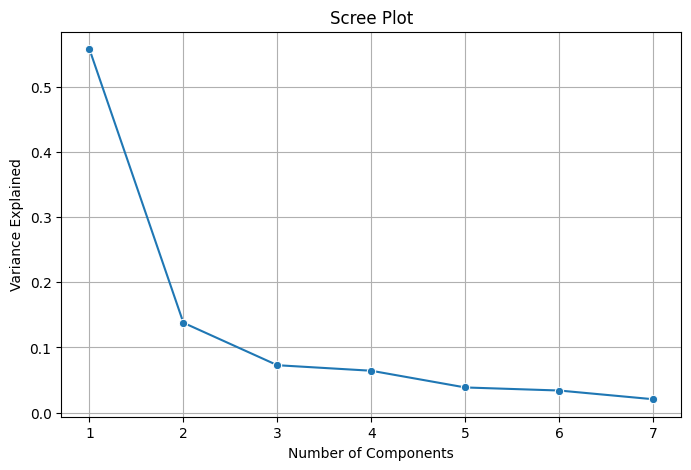

In [73]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_,x=range(1,8),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

The number of components can be decided based upon the explained variance. Here, it is decided to keep the number of components as 7 as the cumulative explained variance is around 92.53%

In [69]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669])

In [80]:
# Component loading when PC's are kept as 8
census_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(census))
census_pca_loading.shape

(7, 57)

In [81]:
census_pca_loading.head(8)

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  F_ST  M_LIT  ...  \
0   0.16   0.17   0.17  0.16  0.16  0.15  0.15  0.03  0.03   0.16  ...   
1  -0.13  -0.09  -0.10 -0.02 -0.02 -0.05 -0.05  0.03  0.03  -0.12  ...   
2  -0.00   0.06   0.04  0.06  0.05  0.00 -0.03 -0.12 -0.14   0.08  ...   
3  -0.13  -0.02  -0.07  0.01  0.01  0.01 -0.03 -0.22 -0.23  -0.04  ...   
4  -0.01  -0.03  -0.01 -0.05 -0.04 -0.17 -0.16  0.43  0.44  -0.01  ...   
5   0.00  -0.07  -0.04 -0.16 -0.15 -0.06 -0.04  0.22  0.23  -0.06  ...   
6  -0.12   0.09  -0.00  0.17  0.17 -0.00 -0.08  0.41  0.36   0.05  ...   

   MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  \
0           0.15           0.14           0.05           0.04           0.12   
1           0.15           0.18           0.25           0.24           0.19   
2           0.05           0.02           0.27           0.28          -0.14   
3           0.09          -0.02          -0.10          -0.14           0.13   
4           0.08           0.13          -0.05          -0.05           0.06   
5          -0.06          -0.00           0.07           0.08          -0.12   
6          -0.01          -0.20          -0.04          -0.10           0.01   

   MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0           0.12           0.14           0.13        0.15        0.13  
1           0.18           0.08           0.05       -0.07       -0.07  
2          -0.20          -0.02          -0.08        0.11        0.10  
3           0.00           0.23           0.21        0.08        0.02  
4           0.13          -0.04           0.00        0.16        0.24  
5          -0.11           0.06           0.30       -0.05       -0.02  
6          -0.15           0.08          -0.07       -0.02       -0.20  

[7 rows x 57 columns]

In [70]:
#Choose the PCs basis cumulative explained variance
census_selected = census_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']]

In [77]:
#Check the selected PCs
census_selected

PC1       PC2       PC3       PC4       PC5       PC6  \
No_HH           0.156021 -0.126347 -0.002690 -0.125293 -0.007022  0.004083   
TOT_M           0.167118 -0.089677  0.056698 -0.019942 -0.033026 -0.073389   
TOT_F           0.165553 -0.104912  0.038749 -0.070873 -0.012847 -0.043647   
M_06            0.162193 -0.022095  0.057788  0.011917 -0.050248 -0.157957   
F_06            0.162566 -0.020271  0.050126  0.014844 -0.043848 -0.154436   
M_SC            0.151358 -0.045111  0.002569  0.012485 -0.173007 -0.064295   
F_SC            0.151567 -0.051924 -0.025101 -0.029893 -0.159803 -0.040518   
M_ST            0.027234  0.027679 -0.123504 -0.222247  0.433163  0.222591   
F_ST            0.028183  0.030223 -0.139769 -0.229754  0.438792  0.225531   
M_LIT           0.161993 -0.115355  0.082168 -0.035163 -0.009101 -0.055465   
F_LIT           0.146873 -0.153109  0.117098 -0.059559  0.055844 -0.048021   
M_ILL           0.161749 -0.006625 -0.021855  0.025348 -0.096580 -0.115234   
F_ILL           0.165248 -0.009107 -0.093062 -0.076023 -0.119910 -0.028757   
TOT_WORK_M      0.159872 -0.133529  0.045176 -0.040154 -0.019553 -0.001801   
TOT_WORK_F      0.145936 -0.085087 -0.059450 -0.225160 -0.040437  0.105162   
MAINWORK_M      0.146201 -0.176368  0.054295 -0.068351 -0.036802  0.019283   
MAINWORK_F      0.123970 -0.151413 -0.055609 -0.246640 -0.082834  0.123832   
MAIN_CL_M       0.103127  0.062415 -0.067399 -0.089769 -0.286039 -0.006170   
MAIN_CL_F       0.074540  0.086477 -0.009238 -0.288965 -0.241936  0.102951   
MAIN_AL_M       0.113356 -0.031040 -0.247917 -0.136082 -0.205724 -0.031068   
MAIN_AL_F       0.073882 -0.058688 -0.251932 -0.290042 -0.177605  0.019240   
MAIN_HH_M       0.131573 -0.076021  0.026569  0.152366 -0.134089  0.174465   
MAIN_HH_F       0.083383 -0.082477 -0.060523  0.048950 -0.139441  0.422309   
MAIN_OT_M       0.123526 -0.212984  0.137378 -0.040289  0.064638  0.023477   
MAIN_OT_F       0.111021 -0.210071  0.095634 -0.120391  0.080743  0.083079   
MARGWORK_M      0.164615  0.092994 -0.008628  0.093018  0.060244 -0.090761   
MARGWORK_F      0.155396  0.125270 -0.049370 -0.088707  0.089202  0.017868   
MARG_CL_M       0.082389  0.269450  0.198754 -0.062761 -0.022263  0.031915   
MARG_CL_F       0.049195  0.246547  0.268787 -0.168402 -0.059205  0.092086   
MARG_AL_M       0.128599  0.165831 -0.189868  0.091787  0.019422 -0.141605   
MARG_AL_F       0.114305  0.140958 -0.267768 -0.106365  0.080527 -0.085120   
MARG_HH_M       0.140853  0.068068 -0.021257  0.237985 -0.059971  0.089533   
MARG_HH_F       0.127670  0.024216 -0.082504  0.196321 -0.033602  0.365112   
MARG_OT_M       0.155263 -0.089442  0.111713  0.087119  0.119121 -0.061066   
MARG_OT_F       0.147287 -0.117899  0.100046  0.026729  0.166882  0.001739   
MARGWORK_3_6_M  0.164972 -0.043995  0.064423 -0.000026 -0.043834 -0.136253   
MARGWORK_3_6_F  0.161253 -0.105502  0.079704  0.003894  0.000537 -0.106900   
MARG_CL_3_6_M   0.165502  0.077193 -0.024205  0.092875  0.054073 -0.096708   
MARG_CL_3_6_F   0.155647  0.103174 -0.072013 -0.107860  0.073050  0.023773   
MARG_AL_3_6_M   0.093014  0.264409  0.153518 -0.038488 -0.007789  0.013477   
MARG_AL_3_6_F   0.051536  0.244261  0.256213 -0.179691 -0.061303  0.093993   
MARG_HH_3_6_M   0.128576  0.158783 -0.200119  0.080411  0.008457 -0.144061   
MARG_HH_3_6_F   0.110646  0.125287 -0.279866 -0.136240  0.064109 -0.076708   
MARG_OT_3_6_M   0.139593  0.062262 -0.020618  0.237745 -0.066400  0.097057   
MARG_OT_3_6_F   0.124546  0.014766 -0.082794  0.190511 -0.044810  0.384552   
MARGWORK_0_3_M  0.154294 -0.093159  0.110285  0.086479  0.108829 -0.062043   
MARGWORK_0_3_F  0.146286 -0.125596  0.095667  0.027275  0.141190  0.008962   
MARG_CL_0_3_M   0.150126  0.150681  0.054892  0.087433  0.081185 -0.060715   
MARG_CL_0_3_F   0.140157  0.180690  0.023982 -0.022290  0.129936 -0.001727   
MARG_AL_0_3_M   0.052542  0.251328  0.268330 -0.104686 -0.048849  0.065409   
MARG_AL_0_3_F   0.041786  0.240720  0.28495

Let's identify which features have maximum loading across the components.

1. We will first plot the component loading on a heatmap.

2. For each feature, we find the maximum loading value across the components and mark the same with help of rectangular box.

3. Features marked with rectangular red box are the one having maximum loading on the respective component. We consider these marked features to decide the context that the component represents

In [75]:
from matplotlib.patches import Rectangle

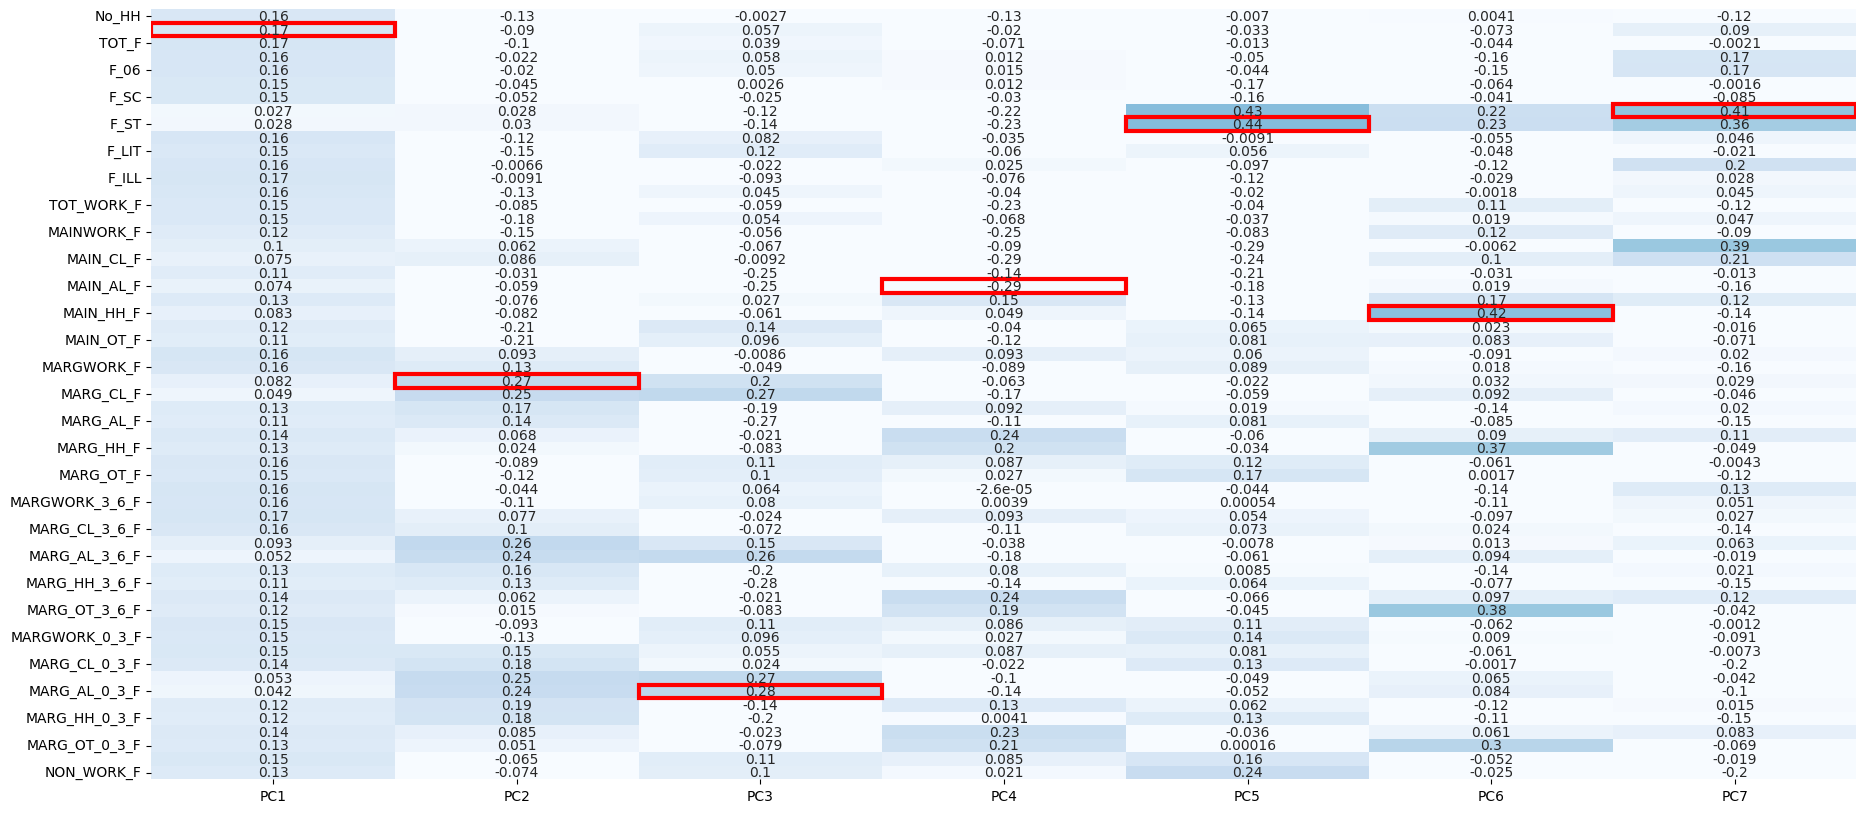

In [86]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(census_selected, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax)


column_max = census_selected.abs().idxmax(axis=0)

for col, variable in enumerate(census_selected.columns):
    position = census_selected.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

**For every attribute (column, the corresponding PC's cell with the maximum magnitude has been highlighted using Rectangles.**

1. For the Total population Female attribute, the PC1 has the maximum magnitude of 0.17.
2. For the Marginal Cultivator Population Female attribute, the PC2 has the maximum magnitude of 0.27.
3. For the Marginal Agriculture Labourers Population 0-3 Female attribute, the PC3 has the maximum magnitude of 0.28.
4. For the Main Agricultural Labourers Population Female attribute, the PC4 has the maximum magnitude of -0.29.
5. For the Scheduled Tribes population Female attribute, the PC5 has the maximum magnitude of 0.44.
6. For the Main Household Industries Population Female attribute, the PC6 has the maximum magnitude of 0.42.
7. For the Scheduled Tribes population Female attribute, the PC7 has the maximum magnitude of 0.41.


Principal components are linear combinations of the original variables. Each PC is a linear combination of all variables, or scaled variables, as the case may be. It is possible that some of the coefficients are very small numbers or close to 0. We present the linear combinations that make up the first 7 PC’s.

For each PC, the row of length 33 gives the weights with which the corresponding variables need to be multiplied to get the PC. Note that the weights can be positive or negative.

With the Business Understanding, the PC's have been renamed. This has been decided based upon the attributes that were highlighted for every PC.

In [51]:
#In order to calculate PC scores we need loadings, below:
census_selected

PC1       PC2       PC3       PC4       PC5       PC6  \
No_HH           0.156021 -0.126347 -0.002690 -0.125293 -0.007022  0.004083   
TOT_M           0.167118 -0.089677  0.056698 -0.019942 -0.033026 -0.073389   
TOT_F           0.165553 -0.104912  0.038749 -0.070873 -0.012847 -0.043647   
M_06            0.162193 -0.022095  0.057788  0.011917 -0.050248 -0.157957   
F_06            0.162566 -0.020271  0.050126  0.014844 -0.043848 -0.154436   
M_SC            0.151358 -0.045111  0.002569  0.012485 -0.173007 -0.064295   
F_SC            0.151567 -0.051924 -0.025101 -0.029893 -0.159803 -0.040518   
M_ST            0.027234  0.027679 -0.123504 -0.222247  0.433163  0.222591   
F_ST            0.028183  0.030223 -0.139769 -0.229754  0.438792  0.225531   
M_LIT           0.161993 -0.115355  0.082168 -0.035163 -0.009101 -0.055465   
F_LIT           0.146873 -0.153109  0.117098 -0.059559  0.055844 -0.048021   
M_ILL           0.161749 -0.006625 -0.021855  0.025348 -0.096580 -0.115234   
F_ILL           0.165248 -0.009107 -0.093062 -0.076023 -0.119910 -0.028757   
TOT_WORK_M      0.159872 -0.133529  0.045176 -0.040154 -0.019553 -0.001801   
TOT_WORK_F      0.145936 -0.085087 -0.059450 -0.225160 -0.040437  0.105162   
MAINWORK_M      0.146201 -0.176368  0.054295 -0.068351 -0.036802  0.019283   
MAINWORK_F      0.123970 -0.151413 -0.055609 -0.246640 -0.082834  0.123832   
MAIN_CL_M       0.103127  0.062415 -0.067399 -0.089769 -0.286039 -0.006170   
MAIN_CL_F       0.074540  0.086477 -0.009238 -0.288965 -0.241936  0.102951   
MAIN_AL_M       0.113356 -0.031040 -0.247917 -0.136082 -0.205724 -0.031068   
MAIN_AL_F       0.073882 -0.058688 -0.251932 -0.290042 -0.177605  0.019240   
MAIN_HH_M       0.131573 -0.076021  0.026569  0.152366 -0.134089  0.174465   
MAIN_HH_F       0.083383 -0.082477 -0.060523  0.048950 -0.139441  0.422309   
MAIN_OT_M       0.123526 -0.212984  0.137378 -0.040289  0.064638  0.023477   
MAIN_OT_F       0.111021 -0.210071  0.095634 -0.120391  0.080743  0.083079   
MARGWORK_M      0.164615  0.092994 -0.008628  0.093018  0.060244 -0.090761   
MARGWORK_F      0.155396  0.125270 -0.049370 -0.088707  0.089202  0.017868   
MARG_CL_M       0.082389  0.269450  0.198754 -0.062761 -0.022263  0.031915   
MARG_CL_F       0.049195  0.246547  0.268787 -0.168402 -0.059205  0.092086   
MARG_AL_M       0.128599  0.165831 -0.189868  0.091787  0.019422 -0.141605   
MARG_AL_F       0.114305  0.140958 -0.267768 -0.106365  0.080527 -0.085120   
MARG_HH_M       0.140853  0.068068 -0.021257  0.237985 -0.059971  0.089533   
MARG_HH_F       0.127670  0.024216 -0.082504  0.196321 -0.033602  0.365112   
MARG_OT_M       0.155263 -0.089442  0.111713  0.087119  0.119121 -0.061066   
MARG_OT_F       0.147287 -0.117899  0.100046  0.026729  0.166882  0.001739   
MARGWORK_3_6_M  0.164972 -0.043995  0.064423 -0.000026 -0.043834 -0.136253   
MARGWORK_3_6_F  0.161253 -0.105502  0.079704  0.003894  0.000537 -0.106900   
MARG_CL_3_6_M   0.165502  0.077193 -0.024205  0.092875  0.054073 -0.096708   
MARG_CL_3_6_F   0.155647  0.103174 -0.072013 -0.107860  0.073050  0.023773   
MARG_AL_3_6_M   0.093014  0.264409  0.153518 -0.038488 -0.007789  0.013477   
MARG_AL_3_6_F   0.051536  0.244261  0.256213 -0.179691 -0.061303  0.093993   
MARG_HH_3_6_M   0.128576  0.158783 -0.200119  0.080411  0.008457 -0.144061   
MARG_HH_3_6_F   0.110646  0.125287 -0.279866 -0.136240  0.064109 -0.076708   
MARG_OT_3_6_M   0.139593  0.062262 -0.020618  0.237745 -0.066400  0.097057   
MARG_OT_3_6_F   0.124546  0.014766 -0.082794  0.190511 -0.044810  0.384552   
MARGWORK_0_3_M  0.154294 -0.093159  0.110285  0.086479  0.108829 -0.062043   
MARGWORK_0_3_F  0.146286 -0.125596  0.095667  0.027275  0.141190  0.008962   
MARG_CL_0_3_M   0.150126  0.150681  0.054892  0.087433  0.081185 -0.060715   
MARG_CL_0_3_F   0.140157  0.180690  0.023982 -0.022290  0.129936 -0.001727   
MARG_AL_0_3_M   0.052542  0.251328  0.268330 -0.104686 -0.048849  0.065409   
MARG_AL_0_3_F   0.041786  0.240720  0.28495

In [53]:
#...and we need the original scaled features
census.iloc[0]

No_HH            -0.904738
TOT_M            -0.771236
TOT_F            -0.815563
M_06             -0.561012
F_06             -0.507738
M_SC             -0.958575
F_SC             -0.957049
M_ST             -0.423306
F_ST             -0.476423
M_LIT            -0.798097
F_LIT            -0.733477
M_ILL            -0.604015
F_ILL            -0.798229
TOT_WORK_M       -0.859260
TOT_WORK_F       -1.010238
MAINWORK_M       -0.872367
MAINWORK_F       -0.898216
MAIN_CL_M        -1.042844
MAIN_CL_F        -0.986630
MAIN_AL_M        -0.851060
MAIN_AL_F        -0.683276
MAIN_HH_M        -0.630766
MAIN_HH_F        -0.407555
MAIN_OT_M        -0.624042
MAIN_OT_F        -0.611637
MARGWORK_M       -0.516943
MARGWORK_F       -0.966512
MARG_CL_M        -0.321809
MARG_CL_F        -0.485053
MARG_AL_M        -0.331426
MARG_AL_F        -0.860192
MARG_HH_M        -0.377984
MARG_HH_F        -0.453026
MARG_OT_M        -0.548764
MARG_OT_F        -0.614625
MARGWORK_3_6_M   -0.648040
MARGWORK_3_6_F   -0.663795
M

In [55]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in census_selected.columns:
    pc_score = np.dot(census_selected[i], census.iloc[0])
    print(round(pc_score, 7), end = ' ')

-4.6172635 0.1381159 0.328545 1.5436971 0.3537367 -0.4209472 -0.0103928 

In [57]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=7, random_state=123)
pca_final = pca.fit_transform(census)

In [58]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 55 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = census_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -4.617263  0.138116  0.328545  1.543697  0.353737 -0.420947 -0.010386
1 -4.771662 -0.105865  0.244449  1.963214 -0.153884  0.417310 -0.023121
2 -5.964836 -0.294347  0.367394  0.619542  0.478199  0.276581  0.069555
3 -6.280796 -0.500384  0.212701  1.074515  0.300799  0.051158 -0.250539
4 -4.478566  0.894154  1.078277  0.535556  0.804065  0.341676 -0.092335
5 -3.319963  2.823865  3.058459 -0.447905  0.742444  0.634671 -0.455693
6 -5.021393 -0.346359  0.650378  0.981072 -0.059778 -0.246957 -0.135019
7 -4.608709  0.022370  0.398755  1.576995  0.171317 -0.139443 -0.137576
8 -5.186703 -0.059097  0.184397  1.735440  0.169174  0.455040 -0.268002
9 -4.226190 -1.335080  0.697838  1.470509  0.269147 -0.002573 -0.248779

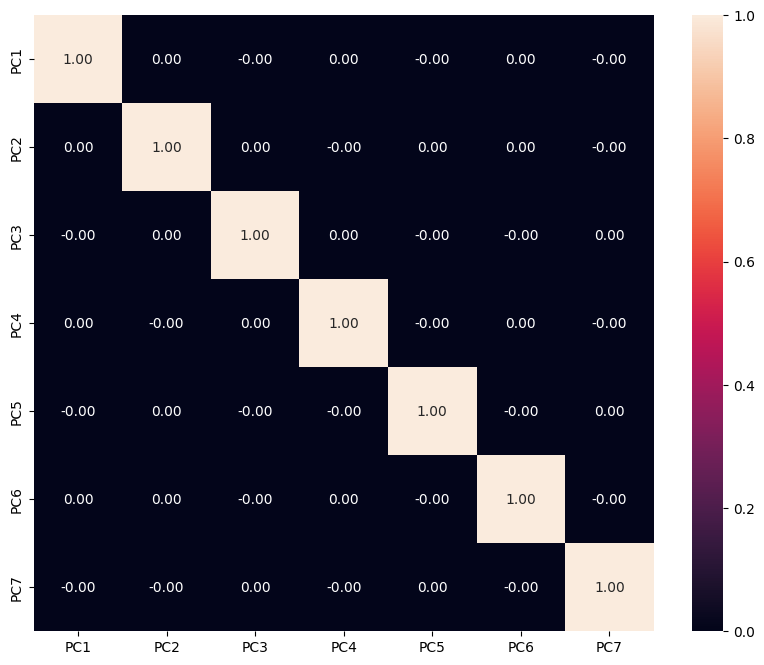

In [59]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');